<a href="https://colab.research.google.com/github/carlosgomezagrafojo/pollution-data/blob/main/proyect_contaminacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Generamos un nuevo notebook y lo sincronizamos con la cuenta nuestro Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Instalamos módulo de python
!pip install numpy

# Tabla instrument data

In [3]:
# importamos pandas, creamos df y verificamos los primeros registros
import pandas as pd
ruta_instrument_data = "/content/drive/MyDrive/proyecto_contaminacion_qraneos/instrument_data.csv"  # Ajusta la ruta
df_instrument = pd.read_csv(ruta_instrument_data, header = 0)  # Usa la primera fila como encabezado
df_instrument.head()

,Measurement date,Station code,Item code,Average value,Instrument status
0,2021-01-01 00:00:00,204,0,0.004,0
1,2021-01-01 00:00:00,204,2,0.059,0
2,2021-01-01 00:00:00,204,4,1.200,0
3,2021-01-01 00:00:00,204,5,0.002,0
4,2021-01-01 00:00:00,204,7,73.000,0


In [4]:
# ver nombres de las columnas df_instrument
print(df_instrument.columns)

Index(['Measurement date', 'Station code', 'Item code', 'Average value',
       'Instrument status'],
      dtype='object')


In [5]:
# Agregaremos las columnas status e item con las definiciones de las columnas Instrument status e item code, respectivamente al df_instrument
# Diccionarios de mapeo
mapeo_Item_code = {
    0: "SO2",
    2: "NO2",
    4: "CO",
    5: "O3",
    7: "PM10",
    8: "PM2.5"
}

mapeo_Instrument_status = {
    0: "Normal",
    1: "Need for calibration",
    2: "Abnormal",
    4: "Power cut off",
    8: "Under repair",
    9: "Abnormal data"
}

# aplicamos el mapeo de ambos diccionarios en paralelo a df_instrument
df_instrument["Item"] = df_instrument["Item code"].map(mapeo_Item_code)
df_instrument["Status"] = df_instrument["Instrument status"].replace(mapeo_Instrument_status)

# verificamos el resultando mostrado df_instrument
df_instrument.head()

,Measurement date,Station code,Item code,Average value,Instrument status,Item,Status
0,2021-01-01 00:00:00,204,0,0.004,0,SO2,Normal
1,2021-01-01 00:00:00,204,2,0.059,0,NO2,Normal
2,2021-01-01 00:00:00,204,4,1.200,0,CO,Normal
3,2021-01-01 00:00:00,204,5,0.002,0,O3,Normal
4,2021-01-01 00:00:00,204,7,73.000,0,PM10,Normal


In [6]:
# cantidad de registros
df_instrument.count()

,0
Measurement date,3703662
Station code,3703662
Item code,3703662
Average value,3703662
Instrument status,3703662
Item,3703662
Status,3703662


In [7]:
# numero de filas y columnas1
df_instrument.shape

(3703662, 7)

In [8]:
# información general
print(df_instrument.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3703662 entries, 0 to 3703661
Data columns (total 7 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Measurement date   object 
 1   Station code       int64  
 2   Item code          int64  
 3   Average value      float64
 4   Instrument status  int64  
 5   Item               object 
 6   Status             object 
dtypes: float64(1), int64(3), object(3)
memory usage: 197.8+ MB
None


In [9]:
# convierto las columnas Item y Status a strings
df_instrument["Item"] = df_instrument["Item"].astype(str)
df_instrument["Status"] = df_instrument["Status"].astype(str)
print(df_instrument.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3703662 entries, 0 to 3703661
Data columns (total 7 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Measurement date   object 
 1   Station code       int64  
 2   Item code          int64  
 3   Average value      float64
 4   Instrument status  int64  
 5   Item               object 
 6   Status             object 
dtypes: float64(1), int64(3), object(3)
memory usage: 197.8+ MB
None


In [10]:
print(type(df_instrument["Item"].iloc[0]))  # Verifico el tipo del primer valor para verificar si es un string
print(type(df_instrument["Status"].iloc[0]))  # Lo mismo para la otra columna

<class 'str'>
<class 'str'>


In [11]:
# últimos 5 registros
df_instrument.tail(5)

,Measurement date,Station code,Item code,Average value,Instrument status,Item,Status
3703657,2023-11-30 23:00:00,228,7,41.000,0,PM10,Normal
3703658,2023-11-30 23:00:00,228,5,0.008,0,O3,Normal
3703659,2023-11-30 23:00:00,228,4,0.600,0,CO,Normal
3703660,2023-11-30 23:00:00,228,2,0.045,0,NO2,Normal
3703661,2023-11-30 23:00:00,228,0,0.004,0,SO2,Normal


In [12]:
# verificar si hay valores nulos
print(df_instrument.isnull().sum())

Measurement date     0
Station code         0
Item code            0
Average value        0
Instrument status    0
Item                 0
Status               0
dtype: int64


In [13]:
# verificamos si existen valores duplicados
print(df_instrument.duplicated().sum())

0


In [14]:
# transformamos la columna Measurement date en tipo datetime64[ns]
df_instrument["Measurement date"] = pd.to_datetime(df_instrument["Measurement date"])
# verificamos el cambio del tipo de dato
print(df_instrument.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3703662 entries, 0 to 3703661
Data columns (total 7 columns):
 #   Column             Dtype         
---  ------             -----         
 0   Measurement date   datetime64[ns]
 1   Station code       int64         
 2   Item code          int64         
 3   Average value      float64       
 4   Instrument status  int64         
 5   Item               object        
 6   Status             object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 197.8+ MB
None


In [15]:
# verificamos las 1eras y las últimas fechas
print(df_instrument["Measurement date"].head())
print(df_instrument["Measurement date"].tail())

0   2021-01-01
1   2021-01-01
2   2021-01-01
3   2021-01-01
4   2021-01-01
Name: Measurement date, dtype: datetime64[ns]
3703657   2023-11-30 23:00:00
3703658   2023-11-30 23:00:00
3703659   2023-11-30 23:00:00
3703660   2023-11-30 23:00:00
3703661   2023-11-30 23:00:00
Name: Measurement date, dtype: datetime64[ns]


In [16]:
# verificamos las partes específicas de Measurement date
df_instrument["año"] = df_instrument["Measurement date"].dt.year       # Agrego la columna Año, al df_instrument
df_instrument["mes"] = df_instrument["Measurement date"].dt.month      # Agrego la columna Mes
df_instrument["día"] = df_instrument["Measurement date"].dt.day        # Agrego la columna Día
df_instrument["hora"] = df_instrument["Measurement date"].dt.hour  # "Día"
df_instrument.head()

,Measurement date,Station code,Item code,Average value,Instrument status,Item,Status,año,mes,día,hora
0,2021-01-01,204,0,0.004,0,SO2,Normal,2021,1,1,0
1,2021-01-01,204,2,0.059,0,NO2,Normal,2021,1,1,0
2,2021-01-01,204,4,1.200,0,CO,Normal,2021,1,1,0
3,2021-01-01,204,5,0.002,0,O3,Normal,2021,1,1,0
4,2021-01-01,204,7,73.000,0,PM10,Normal,2021,1,1,0


In [17]:
# cantidad de registros por estación tomando en cuenta toda la data
df_instrument.groupby("Station code")["Average value"].count()

,Average value
Station code,
204,155430
205,146718
206,129558
207,155376
208,155340
209,138342
210,155346
211,133896
212,155424


In [18]:
# cantidad de estaciones distintas "station code"
df_instrument["Station code"].nunique()

25

In [19]:
# agrupamos por "Station code" e "Instrument status" para pivotear con "Item" a fin de sacar las siguientes medidas: promedio, cantidad, min y max
df_instrument_pivot = df_instrument.pivot_table(
    index=["Station code", "Instrument status"],  # Agrupar por Estación y Estado del Instrumento
    columns="Item",  # Pivotear por Ítem
    values="Average value",  # Agregar los valores de las mediciones
    aggfunc={"Average value": ["mean", "count" ,"min", "max"]}  # Calcular media, suma y máximo
)

df_instrument_pivot # mostrar df_pivot

count                                      \
Item                                 CO      NO2       O3     PM10    PM2.5   
Station code Instrument status                                                
204          0                  25634.0  25691.0  25694.0  25417.0  25464.0   
             1                    170.0    167.0    164.0    173.0    173.0   
             2                     50.0      NaN      NaN     53.0    125.0   
             4                     33.0     33.0     32.0     23.0     25.0   
             8                      8.0      8.0      8.0     35.0     33.0   
...                                 ...      ...      ...      ...      ...   
228          1                    214.0    216.0    212.0    133.0    199.0   
             2                      3.0     10.0     14.0     19.0      NaN   
             4                     26.0     28.0     28.0     27.0     29.0   
             8                     29.0     29.0     29.0     29.0     13.0   
             9                      NaN      6.0      1.0    602.0    231.0   

                                          max                       ...  \
Item                                SO2    CO    NO2     O3   PM10  ...   
Station code Instrument status                                      ...   
204          0                  25490.0   2.3  0.109  0.164  289.0  ...   
             1                    169.0  40.0  0.068  0.325  516.0  ...   
             2                      NaN   0.7    NaN    NaN   91.0  ...   
             4                     34.0   0.8  0.047  0.037   30.0  ...   
             8                    204.0   0.6  0.040  0.015   32.0  ...   
...                                 ...   ...    ...    ...    ...  ...   
228          1                    214.0  36.7  0.096  0.332  622.0  ...   
             2                     14.0   0.4  0.027  0.018   86.0  ...   
             4                     28.0   0.5  0.069  0.024   67.0  ...   
             8                    339.0   0.6  0.057  0.013   63.0  ...   
             9                    198.0   NaN  0.023  0.041  400.0  ...   

                                    mean                                   \
Item                                  O3        PM10      PM2.5       SO2   
Station code Instrument status                                              
204          0                  0.024597   37.733367  22.587064  0.004267   
             1                  0.029970   79.526012  69.341040  0.026166   
             2                       NaN   37.226415  21.192000       NaN   
             4                 -0.682000    0.347826  -0.280000 -0.646647   
             8                 -0.248125    3.057143   1.060606 -0.008824   
...                                  ...         ...        ...       ...   
228          1                  0.026146  112.263158  63.447236  0.027967   
             2                  0.007857   27.421053        NaN  0.004000   
             4                 -0.676750    3.740741  11.931034 -0.677929   
             8                  0.000828    3.206897   1.000000  0.018670   
             9                  0.041000   41.508306  38.952381  0.011808   

                                min                                   
Item                             CO    NO2     O3  PM10 PM2.5    SO2  
Station code Instrument status                                        
204          0                  0.2  0.004  0.001   3.0   1.0  0.001  
             1                  0.0  0.000  0.000  -1.0  -1.0  0.000  
             2                  0.2    NaN    NaN  17.0   0.0    NaN  
             4                 -1.0 -1.000 -1.000  -1.0  -1.0 -1.000  
             8                 -1.0 -1.000 -1.000  -1.0  -1.0 -1.000  
...                             ...    ...    ...   ...   ...    ...  
228          1                  0.0 -1.000  0.000  -1.0  -1.0  0.000  
             2                  0.3  0.008  0.002   1.0   NaN  0.003  
             4  

In [20]:
# creamos un data frame en donde solamente se tomen en cuenta los registros con las mediciones igual a "Normal" => Instrument status = 0 ; Status = Normal
df_instrument_normal = df_instrument[df_instrument["Instrument status"] == 0]
df_instrument_normal.head()

,Measurement date,Station code,Item code,Average value,Instrument status,Item,Status,año,mes,día,hora
0,2021-01-01,204,0,0.004,0,SO2,Normal,2021,1,1,0
1,2021-01-01,204,2,0.059,0,NO2,Normal,2021,1,1,0
2,2021-01-01,204,4,1.200,0,CO,Normal,2021,1,1,0
3,2021-01-01,204,5,0.002,0,O3,Normal,2021,1,1,0
4,2021-01-01,204,7,73.000,0,PM10,Normal,2021,1,1,0


In [21]:
# veamos la cantidad de registros
df_instrument_normal.shape

(3606696, 11)

In [22]:
# Agrupamos por "año" y pivoteamos por Item
df_instrument_normal_pivot_time = df_instrument_normal.pivot_table(
    index="año",  # Agrupar por año
    columns="Item",  # Pivotear por Item (SO2, NO2, etc.)
    values="Average value",  # Agregar los valores de las mediciones
    aggfunc=["mean", "max"]  # Calcular la media y la suma
)
df_instrument_normal_pivot_time

mean                                                      max  \
Item        CO       NO2        O3       PM10      PM2.5       SO2   CO   
año                                                                       
2021  0.518657  0.029616  0.024908  43.775169  24.604890  0.004635  2.9   
2022  0.502998  0.028143  0.023346  39.662035  22.780400  0.004358  2.4   
2023  0.526537  0.027945  0.026197  42.985614  25.484394  0.004025  3.2   

                                         
Item    NO2     O3   PM10  PM2.5    SO2  
año                                      
2021  0.117  0.163  423.0  175.0  0.041  
2022  0.121  0.188  470.0  204.0  0.025  
2023  0.123  0.215  299.0  195.0  0.026

In [23]:
# Agrupamos por: "Station" y "año" y pivoteamos por Item
df_instrument_normal_pivot_time_Station = df_instrument_normal.pivot_table(
    index= ["Station code","año"],  # Agrupar por año
    columns="Item",  # Pivotear por Item (SO2, NO2, etc.)
    values="Average value",  # Agregar los valores de las mediciones
    aggfunc=["mean", "max"]  # Calcular la media y la suma
)
df_instrument_normal_pivot_time_Station

mean                                            \
Item                     CO       NO2        O3       PM10      PM2.5   
Station code año                                                        
204          2021  0.562500  0.033590  0.026044  40.185984  24.369249   
             2022  0.576747  0.031502  0.024709  35.416667  20.725222   
             2023  0.589843  0.029983  0.022971  37.616352  22.693726   
205          2021  0.506536  0.034689  0.025340  40.474127  24.472704   
             2022  0.511426  0.030702  0.024861  36.151676  21.546376   
...                     ...       ...       ...        ...        ...   
227          2022  0.602075  0.027259  0.023713  41.622945  22.325997   
             2023  0.510329  0.032707  0.024090  40.738098  23.388984   
228          2021  0.517993  0.030741  0.023476  48.437261  23.805923   
             2022  0.503837  0.029981  0.020798  44.411813  23.309540   
             2023  0.482979  0.028916  0.022519  41.793259  25.200769   

                             max                                     
Item                    SO2   CO    NO2     O3   PM10  PM2.5    SO2  
Station code año                                                     
204          2021  0.004260  2.2  0.109  0.140  255.0  128.0  0.014  
             2022  0.004791  2.1  0.100  0.164  289.0  127.0  0.016  
             2023  0.003742  2.3  0.089  0.137  202.0  148.0  0.017  
205          2021  0.003825  2.0  0.100  0.142  267.0  116.0  0.016  
             2022  0.003497  2.1  0.100  0.175  296.0  132.0  0.015  
...                     ...  ...    ...    ...    ...    ...    ...  
227          2022  0.003875  2.0  0.104  0.159  426.0  140.0  0.013  
             2023  0.003332  2.1  0.114  0.170  200.0  153.0  0.013  
228          2021  0.004028  2.0  0.106  0.150  423.0  144.0  0.012  
             2022  0.004482  1.8  0.113  0.135  443.0  145.0  0.013  
             2023  0.003739  1.7  0.108  0.114  255.0  171.0  0.011  

[75 rows x 12 columns]

In [24]:
# Concentración media diaria de contaminantes por estaciones
df_instrument_normal_pivot_time_Station = df_instrument_normal.pivot_table(
    index= ["Station code", "día"],  # Agrupar por día
    columns="Item",  # Pivotear por station code
    values="Average value",  # Agregar los valores de las mediciones
    aggfunc=["mean", "max"]  # Calcular la media y max
)
df_instrument_normal_pivot_time_Station

mean                                            \
Item                    CO       NO2        O3       PM10      PM2.5   
Station code día                                                       
204          1    0.578766  0.031664  0.026041  38.807876  23.622328   
             2    0.598946  0.034174  0.024711  40.044549  24.193662   
             3    0.587426  0.033516  0.025486  38.418355  23.368735   
             4    0.596349  0.033233  0.025380  38.743499  25.174123   
             5    0.554289  0.030021  0.026334  38.112981  23.550239   
...                    ...       ...       ...        ...        ...   
228          27   0.518367  0.030612  0.022588  49.079110  24.902320   
             28   0.512590  0.030928  0.021065  48.166047  24.386052   
             29   0.485392  0.028384  0.022135  47.055556  22.066756   
             30   0.506915  0.030868  0.023305  48.872973  26.248649   
             31   0.492857  0.030450  0.021019  42.016913  20.323467   

                            max                                     
Item                   SO2   CO    NO2     O3   PM10  PM2.5    SO2  
Station code día                                                    
204          1    0.004195  1.5  0.090  0.123  166.0   87.0  0.010  
             2    0.004286  1.8  0.089  0.143  160.0  121.0  0.011  
             3    0.004395  1.6  0.085  0.139  152.0  113.0  0.011  
             4    0.004310  1.7  0.085  0.098  199.0  148.0  0.011  
             5    0.004121  1.7  0.081  0.117  202.0  148.0  0.014  
...                    ...  ...    ...    ...    ...    ...    ...  
228          27   0.004139  1.6  0.089  0.084  276.0   94.0  0.011  
             28   0.004187  1.6  0.089  0.092  207.0   91.0  0.010  
             29   0.004183  1.5  0.082  0.111  174.0  116.0  0.008  
             30   0.004195  1.5  0.086  0.096  166.0  129.0  0.012  
             31   0.004029  1.6  0.078  0.082  188.0   78.0  0.008  

[775 rows x 12 columns]

# Tarea Nº 1:
# Pregunta Nº 1:

1.  Concentración media de SO2 en todos los distritos durante todo el período
2.  Indicar el promedio diario por estación.

(Limitar respuestas a 5 decimales)

In [25]:
# dataframe valores instrumento = Normal y Valores SO2; Item code = 0 => SO2
df_instrument_normal_SO2 = df_instrument_normal[df_instrument_normal["Item code"] == 0]
df_instrument_normal_SO2.head()

,Measurement date,Station code,Item code,Average value,Instrument status,Item,Status,año,mes,día,hora
0,2021-01-01 00:00:00,204,0,0.004,0,SO2,Normal,2021,1,1,0
6,2021-01-01 01:00:00,204,0,0.004,0,SO2,Normal,2021,1,1,1
12,2021-01-01 02:00:00,204,0,0.004,0,SO2,Normal,2021,1,1,2
18,2021-01-01 03:00:00,204,0,0.004,0,SO2,Normal,2021,1,1,3
24,2021-01-01 04:00:00,204,0,0.003,0,SO2,Normal,2021,1,1,4


In [26]:
# promedio diario de SO2
promedio_diario_SO2 = df_instrument_normal_SO2.groupby("día")["Average value"].mean().reset_index()
print(promedio_diario_SO2.round(5))

    día  Average value
0     1        0.00431
1     2        0.00437
2     3        0.00442
3     4        0.00442
4     5        0.00426
5     6        0.00415
6     7        0.00404
7     8        0.00430
8     9        0.00436
9    10        0.00410
10   11        0.00412
11   12        0.00433
12   13        0.00436
13   14        0.00435
14   15        0.00430
15   16        0.00441
16   17        0.00450
17   18        0.00462
18   19        0.00449
19   20        0.00443
20   21        0.00440
21   22        0.00449
22   23        0.00451
23   24        0.00440
24   25        0.00441
25   26        0.00433
26   27        0.00447
27   28        0.00449
28   29        0.00439
29   30        0.00438
30   31        0.00417


In [27]:
# promedio diario de SO2 por estación
df_instrument_normal_SO2_estacion = df_instrument_normal_SO2.groupby(["día", "Station code"])["Average value"].mean()
print(df_instrument_normal_SO2_estacion.round(5))

día  Station code
1    204             0.00419
     205             0.00344
     206             0.00354
     207             0.00433
     208             0.00423
                      ...   
31   224             0.00477
     225             0.00398
     226             0.00509
     227             0.00370
     228             0.00403
Name: Average value, Length: 775, dtype: float64


In [28]:
# Concentración promedio diaria de SO2 pivoteando estación
df_instrument_normal_SO2_pivot = df_instrument_normal_SO2.pivot_table(
    index="día",  # Agrupar por día
    columns="Station code",  # Pivotear por estación
    values="Average value",  # Agregar los valores de las mediciones
    aggfunc="mean"  # Calcular la media
)
df_instrument_normal_SO2_pivot.round(5)

Station code,204,205,206,207,208,209,210,211,212,213,...,219,220,221,222,223,224,225,226,227,228
día,,,,,,,,,,,,,,,,,,,,,
1,0.00419,0.00344,0.00354,0.00433,0.00423,0.00390,0.00426,0.00425,0.00542,0.00578,...,0.00508,0.00534,0.00389,0.00447,0.00368,0.00469,0.00424,0.00517,0.00389,0.00408
2,0.00429,0.00356,0.00369,0.00446,0.00429,0.00396,0.00427,0.00436,0.00554,0.00575,...,0.00524,0.00543,0.00396,0.00461,0.00374,0.00489,0.00425,0.00529,0.00381,0.00407
3,0.00440,0.00367,0.00374,0.00452,0.00434,0.00397,0.00441,0.00440,0.00550,0.00586,...,0.00522,0.00519,0.00403,0.00435,0.00387,0.00482,0.00429,0.00544,0.00396,0.00414
4,0.00431,0.00368,0.00374,0.00447,0.00446,0.00390,0.00444,0.00460,0.00551,0.00586,...,0.00509,0.00523,0.00390,0.00441,0.00384,0.00462,0.00424,0.00541,0.00412,0.00412
5,0.00412,0.00353,0.00366,0.00429,0.00414,0.00382,0.00430,0.00429,0.00531,0.00584,...,0.00485,0.00517,0.00388,0.00425,0.00365,0.00464,0.00424,0.00521,0.00396,0.00397
6,0.00401,0.00328,0.00330,0.00419,0.00409,0.00375,0.00425,0.00435,0.00514,0.00582,...,0.00488,0.00517,0.00374,0.00425,0.00348,0.00461,0.00413,0.00509,0.00369,0.00383
7,0.00391,0.00310,0.00326,0.00403,0.00389,0.00355,0.00413,0.00415,0.00511,0.00584,...,0.00469,0.00491,0.00358,0.00415,0.00333,0.00440,0.00403,0.00500,0.00368,0.00377
8,0.00420,0.00342,0.00355,0.00426,0.00430,0.00390,0.00429,0.00445,0.00534,0.00600,...,0.00492,0.00519,0.00386,0.00451,0.00366,0.00471,0.00426,0.00519,0.00395,0.00403
9,0.00427,0.00345,0.00361,0.00427,0.00433,0.00394,0.00438,0.00446,0.00541,0.00595,...,0.00500,0.00529,0.00395,0.00449,0.00369,0.00471,0.00429,0.00524,0.00400,0.00414


# Pregunta Nº 2:

1.   Analizar como varían los niveles de contaminación según la temporada del año
2.   Mostrar los niveles de CO por temporada en la Estación 209

(Toma todo el mes de diciembre como parte del invierno, marzo como primavera, y así sucesivamente.)
Proporciona la respuesta con 5 decimales.)

In [29]:
# valores de la columna mes
df_instrument["mes"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12], dtype=int32)

In [30]:
# insertaremos la columna estación del año: primavera, verano, otoño e invierno; invierno: 12,1,2 ; primavera: 3,4,5 ; verano: 6,7,8 ; otoño. 9,10,11
import numpy as np

# Definir las condiciones para cada estación del año según el mes
condiciones = [
    df_instrument['mes'].isin([3, 4, 5]),  # Primavera
    df_instrument['mes'].isin([6, 7, 8]),     # Verano
    df_instrument['mes'].isin([9, 10, 11]),     # Otoño
    df_instrument['mes'].isin([12, 1, 2])   # Invierno
]

# Estaciones correspondientes a cada grupo de meses
estaciones = ['primavera', 'verano', 'otoño', 'invierno']

# Crear la nueva columna 'temporada' en el DataFrame original
df_instrument['Temporada del Año'] = np.select(condiciones, estaciones, default='desconocido')


df_instrument.head()

,Measurement date,Station code,Item code,Average value,Instrument status,Item,Status,año,mes,día,hora,Temporada del Año
0,2021-01-01,204,0,0.004,0,SO2,Normal,2021,1,1,0,invierno
1,2021-01-01,204,2,0.059,0,NO2,Normal,2021,1,1,0,invierno
2,2021-01-01,204,4,1.200,0,CO,Normal,2021,1,1,0,invierno
3,2021-01-01,204,5,0.002,0,O3,Normal,2021,1,1,0,invierno
4,2021-01-01,204,7,73.000,0,PM10,Normal,2021,1,1,0,invierno


In [31]:
# Definir las condiciones para cada estación del año según el mes
condiciones = [
    df_instrument['mes'].isin([3, 4, 5]),   # Primavera
    df_instrument['mes'].isin([6, 7, 8]),   # Verano
    df_instrument['mes'].isin([9, 10, 11]), # Otoño
    df_instrument['mes'].isin([12, 1, 2])   # Invierno
]

# Códigos correspondientes a las estaciones
codigo_estaciones = [0, 1, 2, 3]  # 0: primavera, 1: verano, 2: otoño, 3: invierno

# Crear la nueva columna numérica para modelado
df_instrument['Código Temporada'] = np.select(condiciones, codigo_estaciones, default=-1)

# Mostrar las primeras filas para verificar
df_instrument.head()

,Measurement date,Station code,Item code,Average value,Instrument status,Item,Status,año,mes,día,hora,Temporada del Año,Código Temporada
0,2021-01-01,204,0,0.004,0,SO2,Normal,2021,1,1,0,invierno,3
1,2021-01-01,204,2,0.059,0,NO2,Normal,2021,1,1,0,invierno,3
2,2021-01-01,204,4,1.200,0,CO,Normal,2021,1,1,0,invierno,3
3,2021-01-01,204,5,0.002,0,O3,Normal,2021,1,1,0,invierno,3
4,2021-01-01,204,7,73.000,0,PM10,Normal,2021,1,1,0,invierno,3


In [32]:
print(df_instrument.columns)

Index(['Measurement date', 'Station code', 'Item code', 'Average value',
       'Instrument status', 'Item', 'Status', 'año', 'mes', 'día', 'hora',
       'Temporada del Año', 'Código Temporada'],
      dtype='object')


In [33]:
# Al df_instrument, le insertaremos una nueva columna con los niveles de contaminación (level pollution), cuyos valores depemderán tanto de los valores de las columnas promedio "Average value" como del contaminante "Item"

# importamos a numpy como np
import numpy as np

# Definimos las condiciones para cada combinación de "Item code" y "Average value"
condiciones = [
    # Condiciones para Item code = 0
    (df_instrument['Item code'] == 0) & (df_instrument['Average value'] <= 0.02),  # Good
    (df_instrument['Item code'] == 0) & (df_instrument['Average value'] <= 0.05),  # Normal
    (df_instrument['Item code'] == 0) & (df_instrument['Average value'] <= 0.15),  # Bad
    (df_instrument['Item code'] == 0) & (df_instrument['Average value'] >= 1), # Very bad

    # Condiciones para Item code = 2
    (df_instrument['Item code'] == 2) & (df_instrument['Average value'] <= 0.03),  # Good
    (df_instrument['Item code'] == 2) & (df_instrument['Average value'] <= 0.06),  # Normal
    (df_instrument['Item code'] == 2) & (df_instrument['Average value'] <= 0.20), # Bad
    (df_instrument['Item code'] == 2) & (df_instrument['Average value'] >= 2), # Very bad

    # Condiciones para Item code = 4
    (df_instrument['Item code'] == 4) & (df_instrument['Average value'] <= 2),  # Good
    (df_instrument['Item code'] == 4) & (df_instrument['Average value'] <= 9),  # Normal
    (df_instrument['Item code'] == 4) & (df_instrument['Average value'] <= 15), # Bad
    (df_instrument['Item code'] == 4) & (df_instrument['Average value'] >= 50), # Very bad

    # Condiciones para Item code = 5
    (df_instrument['Item code'] == 5) & (df_instrument['Average value'] <= 0.03),  # Good
    (df_instrument['Item code'] == 5) & (df_instrument['Average value'] <= 0.09),  # Normal
    (df_instrument['Item code'] == 5) & (df_instrument['Average value'] <= 0.15), # Bad
    (df_instrument['Item code'] == 5) & (df_instrument['Average value'] >= 0.5), # Very bad

    # Condiciones para Item code = 7
    (df_instrument['Item code'] == 7) & (df_instrument['Average value'] <= 30),  # Good
    (df_instrument['Item code'] == 7) & (df_instrument['Average value'] <= 80),  # Normal
    (df_instrument['Item code'] == 7) & (df_instrument['Average value'] <= 150), # Bad
    (df_instrument['Item code'] == 7) & (df_instrument['Average value'] >= 600), # Very bad

    # Condiciones para Item code = 8
    (df_instrument['Item code'] == 8) & (df_instrument['Average value'] <= 15),  # Good
    (df_instrument['Item code'] == 8) & (df_instrument['Average value'] <= 35),  # Normal
    (df_instrument['Item code'] == 8) & (df_instrument['Average value'] <= 75), # Bad
    (df_instrument['Item code'] == 8) & (df_instrument['Average value'] >= 500), # Very bad

]

# Los valores que se asignarán a "Level pollution" según cada condición
valores = [
    'Good',   # Para la primera condición (Item code = 0 y Average value <= 0.02)
    'Normal', # Para la segunda condición (Item code = 0 y Average value <= 0.05)
    'Bad',    # Para la tercera condición (Item code = 0 y Average value <= 0.15)
    'Very bad', # Para la cuarta condición (Item code = 0 y Average value >= 1)

    'Good',   # Para la quinta condición (Item code = 2 y Average value <= 0.03)
    'Normal', # Para la sexta condición (Item code = 2 y Average value <= 0.06)
    'Bad',    # Para la septima condición (Item code = 2 y Average value <= 0.20)
    'Very bad', # Para la octava condición (Item code = 2 y Average value >= 2)

    'Good',   # Para la novena condición (Item code = 4 y Average value <= 2)
    'Normal', # Para la decima condición (Item code = 4 y Average value <= 9)
    'Bad',    # Para la undecima condición (Item code = 4 y Average value <= 15)
    'Very bad', # Para la doceava condición (Item code = 4 y Average value <= 50)

    'Good',   # Para la decimatercera condición (Item code = 5 y Average value <= 0.03)
    'Normal', # Para la decimacuarta condición (Item code = 5 y Average value <= 0.09)
    'Bad',    # Para la decimaquinta condición (Item code = 5 y Average value <= 0.15)
    'Very bad', # Para la decimasexta condición (Item code = 5 y Average value <= 0.5)

    'Good',   # Para la decimaseptima condición (Item code = 7 y Average value <= 30)
    'Normal', # Para la decimaoctava condición (Item code = 7 y Average value <= 80)
    'Bad',    # Para la decimanovena condición (Item code = 7 y Average value <= 150)
    'Very bad', # Para la vigésima condición (Item code = 7 y Average value <= 600)

    'Good',  # Para la vigésima primera condición (Item code = 8 y Average value <= 15
    'Normal', # Para la vigésima segunda condición (Item code = 8 y Average value <= 35)
    'Bad',    # Para la vigésima tercera condición (Item code = 8 y Average value <= 75)
    'Very bad', # Para la vigésima cuarta condición (Item code = 8 y Average value <= 500)

]

# Crear la nueva columna 'Level pollution' en el DataFrame original
df_instrument['Level pollution'] = np.select(condiciones, valores, default='Unknown')

df_instrument.head()

,Measurement date,Station code,Item code,Average value,Instrument status,Item,Status,año,mes,día,hora,Temporada del Año,Código Temporada,Level pollution
0,2021-01-01,204,0,0.004,0,SO2,Normal,2021,1,1,0,invierno,3,Good
1,2021-01-01,204,2,0.059,0,NO2,Normal,2021,1,1,0,invierno,3,Normal
2,2021-01-01,204,4,1.200,0,CO,Normal,2021,1,1,0,invierno,3,Good
3,2021-01-01,204,5,0.002,0,O3,Normal,2021,1,1,0,invierno,3,Good
4,2021-01-01,204,7,73.000,0,PM10,Normal,2021,1,1,0,invierno,3,Normal


In [34]:
# verifico si no hay valores nulos
df_instrument['Level pollution'].value_counts(dropna=False)

,count
Level pollution,
Good,2526440
Normal,971679
Bad,181574
Unknown,21769
Very bad,2200


In [35]:
# agrego la columna cualitativa con valores numéricos para los niveles de contaminación que llamaremos level pollution
df_instrument['Level pollution code'] = df_instrument['Level pollution'].map({'Good': 0, 'Normal': 1, 'Bad': 2, 'Very bad': 3})
df_instrument.head()

,Measurement date,Station code,Item code,Average value,Instrument status,Item,Status,año,mes,día,hora,Temporada del Año,Código Temporada,Level pollution,Level pollution code
0,2021-01-01,204,0,0.004,0,SO2,Normal,2021,1,1,0,invierno,3,Good,0.0
1,2021-01-01,204,2,0.059,0,NO2,Normal,2021,1,1,0,invierno,3,Normal,1.0
2,2021-01-01,204,4,1.200,0,CO,Normal,2021,1,1,0,invierno,3,Good,0.0
3,2021-01-01,204,5,0.002,0,O3,Normal,2021,1,1,0,invierno,3,Good,0.0
4,2021-01-01,204,7,73.000,0,PM10,Normal,2021,1,1,0,invierno,3,Normal,1.0


In [36]:
# filtraremos los valores donde Instrument status = 0
df_instrument_normal = df_instrument[df_instrument["Instrument status"] == 0]
df_instrument_normal.head()

,Measurement date,Station code,Item code,Average value,Instrument status,Item,Status,año,mes,día,hora,Temporada del Año,Código Temporada,Level pollution,Level pollution code
0,2021-01-01,204,0,0.004,0,SO2,Normal,2021,1,1,0,invierno,3,Good,0.0
1,2021-01-01,204,2,0.059,0,NO2,Normal,2021,1,1,0,invierno,3,Normal,1.0
2,2021-01-01,204,4,1.200,0,CO,Normal,2021,1,1,0,invierno,3,Good,0.0
3,2021-01-01,204,5,0.002,0,O3,Normal,2021,1,1,0,invierno,3,Good,0.0
4,2021-01-01,204,7,73.000,0,PM10,Normal,2021,1,1,0,invierno,3,Normal,1.0


In [37]:
# Analizar cómo varían los niveles de contaminación según la temporada del año.
# Promedio de contaminación por temporada y contaminante
Promedio_Temporada_Item = df_instrument_normal.groupby(["Temporada del Año", "Item"])["Average value"].mean()
print(Promedio_Temporada_Item.round(5))

Temporada del Año  Item 
invierno           CO        0.66477
                   NO2       0.03534
                   O3        0.01431
                   PM10     51.74125
                   PM2.5    31.21413
                   SO2       0.00502
otoño              CO        0.50059
                   NO2       0.02823
                   O3        0.01976
                   PM10     32.93541
                   PM2.5    17.28074
                   SO2       0.00392
primavera          CO        0.50481
                   NO2       0.03080
                   O3        0.03239
                   PM10     54.45010
                   PM2.5    29.69307
                   SO2       0.00457
verano             CO        0.39847
                   NO2       0.02045
                   O3        0.03150
                   PM10     28.62881
                   PM2.5    18.28905
                   SO2       0.00391
Name: Average value, dtype: float64


In [38]:
# promedio por temporada pivoteando contaminante
Promedio_Temporada_Item_pivot = df_instrument_normal.pivot_table(
    index="Temporada del Año",  # Agrupar por estación
    columns="Item",  # Pivotear por contaminante
    values="Average value",  # Agregar los valores de las mediciones
    aggfunc="mean"  # Calcular la media
)
Promedio_Temporada_Item_pivot.round(5)

Item,CO,NO2,O3,PM10,PM2.5,SO2
Temporada del Año,,,,,,
invierno,0.66477,0.03534,0.01431,51.74125,31.21413,0.00502
otoño,0.50059,0.02823,0.01976,32.93541,17.28074,0.00392
primavera,0.50481,0.03080,0.03239,54.45010,29.69307,0.00457
verano,0.39847,0.02045,0.03150,28.62881,18.28905,0.00391


In [39]:
# promedio por estación pivoteando temporada y contaminante
Promedio_Estacion_Item_pivot = df_instrument_normal.pivot_table(
    index="Station code",  # Agrupar por estación
    columns=["Temporada del Año", "Item"],  # Pivotear por temporada y contaminante
    values="Average value",  # Agregar los valores de las mediciones
    aggfunc="mean"  # Calcular la media
)
Promedio_Estacion_Item_pivot.round(5)

Temporada del Año invierno                                                 \
Item                    CO      NO2       O3      PM10     PM2.5      SO2   
Station code                                                                
204                0.72945  0.03762  0.01458  47.10204  29.81133  0.00496   
205                0.63987  0.03718  0.01573  48.07660  30.16146  0.00429   
206                0.55565  0.03591  0.01206  45.98778  30.90624  0.00427   
207                0.75754  0.03070  0.01781  50.48936  28.72869  0.00471   
208                0.76508  0.02984  0.01604  52.86378  29.24799  0.00490   
209                0.68040  0.03516  0.01415  53.79961  32.90810  0.00428   
210                0.57924  0.03538  0.01244  54.23147  32.05459  0.00467   
211                0.76354  0.03695  0.01408  52.14548  31.71824  0.00454   
212                0.69723  0.03662  0.01329  52.40384  32.26383  0.00633   
213                0.62951  0.03460  0.01330  49.70365  30.32671  0.00606   
214                0.76854  0.03909  0.01380  51.77843  28.78679  0.00475   
215                0.62582  0.03035  0.01962  50.12918  29.54806  0.00401   
216                0.73113  0.02956  0.01762  50.74488  29.65868  0.00482   
217                0.72355  0.03591  0.01570  52.86835  33.04454  0.00595   
218                0.69522  0.03825  0.01154  52.45479  32.27842  0.00444   
219                0.63748  0.03700  0.01611  55.49591  30.33605  0.00562   
220                0.53924  0.02908  0.01276  53.06562  29.78788  0.00623   
221                0.65075  0.03916  0.01362  48.55683  32.49484  0.00462   
222                0.69710  0.03139  0.01222  53.99844  32.92442  0.00519   
223                0.62724  0.03944  0.01534  51.49017  33.13480  0.00423   
224                0.59573  0.04186  0.01342  51.76469  34.30751  0.00625   
225                0.55264  0.03296  0.01467  54.45946  28.73556  0.00513   
226                0.60423  0.03509  0.01132  49.68789  33.27474  0.00566   
227                0.68827  0.03720  0.01388  54.84825  30.42110  0.00485   
228                0.66632  0.03903  0.01268  56.55367  34.12084  0.00483   

Temporada del Año    otoño                              ... primavera  \
Item                    CO      NO2       O3      PM10  ...        O3   
Station code                                            ...             
204                0.56396  0.03112  0.01892  30.28187  ...   0.03385   
205                0.48286  0.03176  0.02073  30.13580  ...   0.03418   
206                0.40909  0.02832  0.01784  27.26581  ...   0.02749   
207                0.62234  0.02512  0.02419  31.86860  ...   0.03693   
208                0.56302  0.02200  0.02236  30.87946  ...   0.03396   
209                0.49979  0.02755  0.02079  34.43128  ...   0.03321   
210                0.45427  0.02763  0.01701  33.16704  ...   0.02769   
211                0.54659  0.02824  0.01971  32.61774  ...   0.03264   
212                0.52296  0.03162  0.01756  32.65332  ...   0.03043   
213                0.48603  0.02552  0.01893  29.76696  ...   0.03181   
214                0.60251  0.03030  0.01732  37.53330  ...   0.02976   
215                0.44195  0.02012  0.02451  29.27514  ...   0.03908   
216                0.52992  0.02213  0.02168  30.41237  ...   0.03688   
217                0.50992  0.02782  0.02045  34.50174  ...   0.03260   
218                0.51251  0.03368  0.01984  36.69031  ...   0.02838   
219                0.49760  0.03149  0.01985  34.49701  ...   0.03606   
220                0.40194  0.02625  0.02070  34.00930  ...   0.03297   
221                0.47263  0.03080  0.01913  30.70199  ...   0.03210   
222                0.55053  0.02796  0.02123  37.79083  ...   0.02875   
223                0.46814  0.03112  0.02047  35.57786  ...   0.03534   
224                0.45814  0.03138  0.01792  36.26234  ...   0.03472   
225                0.40985  0.02826  0.01993  33.25470  ...   0.03408   
226               

In [40]:
# Mostrar los niveles de CO por temporada en la Estación 209
# Filtramos los datos; Queremos solo: El contaminante CO y La estación 209
df_instrument_normal_CO_209 = df_instrument_normal[(df_instrument_normal["Item code"] == 4) & (df_instrument_normal["Station code"] == 209)]
df_instrument_normal_CO_209.head()

,Measurement date,Station code,Item code,Average value,Instrument status,Item,Status,año,mes,día,hora,Temporada del Año,Código Temporada,Level pollution,Level pollution code
742424,2021-01-01 00:00:00,209,4,1.5,0,CO,Normal,2021,1,1,0,invierno,3,Good,0.0
742430,2021-01-01 01:00:00,209,4,1.5,0,CO,Normal,2021,1,1,1,invierno,3,Good,0.0
742436,2021-01-01 02:00:00,209,4,1.5,0,CO,Normal,2021,1,1,2,invierno,3,Good,0.0
742442,2021-01-01 03:00:00,209,4,1.4,0,CO,Normal,2021,1,1,3,invierno,3,Good,0.0
742448,2021-01-01 04:00:00,209,4,1.3,0,CO,Normal,2021,1,1,4,invierno,3,Good,0.0


In [41]:
# promedio de Contaminante CO por temporada en la estación 209
promedio_co_estacion = df_instrument_normal_CO_209.groupby('Temporada del Año')['Average value'].mean().round(5).reset_index()
print(promedio_co_estacion)

  Temporada del Año  Average value
0          invierno        0.68040
1             otoño        0.49979
2         primavera        0.47805
3            verano        0.42521


# Pregunta Nº 3:

¿Qué hora presenta la mayor variabilidad (desviación estándar) para el contaminante O₃?

Considere todas las estaciones por igual.

In [42]:
# Filtramos los datos, solamente queremos los datos del contaminante O3
df_instrument_normal_O3 = df_instrument_normal[df_instrument_normal["Item code"] == 5]
df_instrument_normal_O3.head()

,Measurement date,Station code,Item code,Average value,Instrument status,Item,Status,año,mes,día,hora,Temporada del Año,Código Temporada,Level pollution,Level pollution code
3,2021-01-01 00:00:00,204,5,0.002,0,O3,Normal,2021,1,1,0,invierno,3,Good,0.0
9,2021-01-01 01:00:00,204,5,0.002,0,O3,Normal,2021,1,1,1,invierno,3,Good,0.0
15,2021-01-01 02:00:00,204,5,0.002,0,O3,Normal,2021,1,1,2,invierno,3,Good,0.0
21,2021-01-01 03:00:00,204,5,0.002,0,O3,Normal,2021,1,1,3,invierno,3,Good,0.0
27,2021-01-01 04:00:00,204,5,0.002,0,O3,Normal,2021,1,1,4,invierno,3,Good,0.0


In [43]:
# Agregamos la columna hora al dataframe df_instrument_normal_O3
df_instrument_normal_O3["hora"] = df_instrument_normal_O3["Measurement date"].dt.hour
df_instrument_normal_O3.head()

<ipython-input-43-284c9db35e99>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_instrument_normal_O3["hora"] = df_instrument_normal_O3["Measurement date"].dt.hour


,Measurement date,Station code,Item code,Average value,Instrument status,Item,Status,año,mes,día,hora,Temporada del Año,Código Temporada,Level pollution,Level pollution code
3,2021-01-01 00:00:00,204,5,0.002,0,O3,Normal,2021,1,1,0,invierno,3,Good,0.0
9,2021-01-01 01:00:00,204,5,0.002,0,O3,Normal,2021,1,1,1,invierno,3,Good,0.0
15,2021-01-01 02:00:00,204,5,0.002,0,O3,Normal,2021,1,1,2,invierno,3,Good,0.0
21,2021-01-01 03:00:00,204,5,0.002,0,O3,Normal,2021,1,1,3,invierno,3,Good,0.0
27,2021-01-01 04:00:00,204,5,0.002,0,O3,Normal,2021,1,1,4,invierno,3,Good,0.0


In [44]:
# La hora donde la desviación estándar es mayor
hora_max_desviacion_O3 = df_instrument_normal_O3.groupby("hora")["Average value"].std().idxmax()
print(hora_max_desviacion_O3)

# Valor máximo de la desviación estándar por hora
hora_max_desviacion_O3_value = df_instrument_normal_O3.groupby("hora")["Average value"].std().max()
print(round(hora_max_desviacion_O3_value,5))

15
0.02385


In [45]:
# desviación estándar por hora del contaminante O3
hora_max_desviacion_O3_temporada = df_instrument_normal_O3.groupby("hora")["Average value"].std()
print(hora_max_desviacion_O3_temporada.round(5))

hora
0     0.01398
1     0.01420
2     0.01420
3     0.01401
4     0.01352
5     0.01238
6     0.01107
7     0.01091
8     0.01183
9     0.01317
10    0.01487
11    0.01717
12    0.01975
13    0.02179
14    0.02328
15    0.02385
16    0.02335
17    0.02204
18    0.02010
19    0.01804
20    0.01632
21    0.01514
22    0.01432
23    0.01399
Name: Average value, dtype: float64


# Pregunta Nº 4:

¿Cuál es el código de estación con más mediciones etiquetadas como "Datos anormales"?

In [46]:
# valores de la columna Status
df_instrument["Status"].unique()

array(['Normal', 'Abnormal data', 'Need for calibration', 'Power cut off',
       'Under repair', 'Abnormal'], dtype=object)

In [47]:
# la Station code con mayor cantidad de Status = Abnormal
station_code_max_abnormal = df_instrument[df_instrument["Status"] == "Abnormal"].groupby("Station code").size().idxmax()
print(station_code_max_abnormal)

# La cantidad maxima de Status = Abnormal
cantidad_max_abnormal = df_instrument[df_instrument["Status"] == "Abnormal"].groupby("Station code").size().max()
print(cantidad_max_abnormal)

224
635


In [48]:
# Frecuencia por Station code y pivoteo con Status
frecuencia_status_station_pivot = df_instrument.pivot_table(
    index="Station code",  # Agrupar por estación
    columns="Status",  # Pivotear por contaminante
    values="Average value",  # Agregar los valores de las mediciones
    aggfunc="count"  # Calcular la media
)
frecuencia_status_station_pivot

Status,Abnormal,Abnormal data,Need for calibration,Normal,Power cut off,Under repair
Station code,,,,,,
204,228.0,320.0,1016.0,153390.0,180.0,296.0
205,56.0,123.0,921.0,145586.0,32.0,NaN
206,84.0,317.0,962.0,126061.0,18.0,2116.0
207,113.0,1112.0,1540.0,150530.0,2026.0,55.0
208,31.0,880.0,1407.0,146211.0,3623.0,3188.0
209,211.0,815.0,1840.0,134732.0,338.0,406.0
210,295.0,1349.0,1502.0,151972.0,135.0,93.0
211,163.0,3197.0,1014.0,127486.0,264.0,1772.0
212,102.0,318.0,1118.0,148356.0,3114.0,2416.0


# Pregunta Nº 5:

¿Qué código de estación tiene más mediciones "no normales" (!= 0)?

In [49]:
# código de estación que  tiene más mediciones "no normales" : Status != 0)
station_code_max_no_normal = df_instrument[df_instrument["Status"] != "Normal"].groupby("Station code").size().idxmax()
print(station_code_max_no_normal)

# La cantidad maxima de Status = Abnormal
cantidad_max_no_normal = df_instrument[df_instrument["Status"] != "Normal"].groupby("Station code").size().max()
print(cantidad_max_no_normal)

208
9129


# Pregunta Nº 6:

Devuelve el recuento de registros Buenos, Normales, Malos y Muy malos para todos los códigos de estación del contaminante PM2.5.

In [50]:
# Frecuencia de level pollution por Station code para contaminante Item = PM2.5
frecuencia_level_pollution_station_PM25 = df_instrument[df_instrument["Item code"] == 8].pivot_table(
    index="Station code",  # Agrupar por estación
    columns="Level pollution",  # Pivotear por contaminante
    values="Average value",  # Agregar los valores de las mediciones
    aggfunc="count"  # Calcular la media
)
frecuencia_level_pollution_station_PM25


Level pollution,Bad,Good,Normal,Unknown,Very bad
Station code,,,,,
204,3639.0,10359.0,11402.0,504.0,1.0
205,3518.0,9846.0,10655.0,434.0,NaN
206,3618.0,8167.0,9156.0,651.0,1.0
207,4258.0,9167.0,11954.0,496.0,21.0
208,4179.0,11111.0,9998.0,593.0,9.0
209,4619.0,7270.0,10247.0,810.0,111.0
210,4380.0,9659.0,11038.0,795.0,19.0
211,4092.0,8534.0,8962.0,619.0,109.0
212,3676.0,10657.0,10914.0,657.0,NaN


# Tabla measurement date

In [51]:
# importamos pandas, creamos df para c/u de los archivos y verificamos los primeros registros
import pandas as pd
ruta_measurement_data = "/content/drive/MyDrive/proyecto_contaminacion_qraneos/measurement_data.csv"  # Ajusta la ruta
df_measurement = pd.read_csv(ruta_measurement_data, header = 0)  # Usa la primera fila como encabezado
df_measurement.head()

,Measurement date,Station code,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5
0,2021-01-01 00:00:00,204,37.572016,127.005008,0.004,0.059,0.002,1.2,73.0,57.0
1,2021-01-01 01:00:00,204,37.572016,127.005008,0.004,0.058,0.002,1.2,71.0,59.0
2,2021-01-01 02:00:00,204,37.572016,127.005008,0.004,0.056,0.002,1.2,70.0,59.0
3,2021-01-01 03:00:00,204,37.572016,127.005008,0.004,0.056,0.002,1.2,70.0,58.0
4,2021-01-01 04:00:00,204,37.572016,127.005008,0.003,0.051,0.002,1.2,69.0,61.0


In [52]:
# número de registros
df_measurement.count()

,0
Measurement date,621588
Station code,621588
Latitude,621588
Longitude,621588
SO2,621588
NO2,621588
O3,621588
CO,621588
PM10,621588
PM2.5,621588


In [53]:
# contamos el número de filas y columnas
df_measurement.shape

(621588, 10)

In [54]:
print(df_measurement.info())        # Información general del dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 621588 entries, 0 to 621587
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Measurement date  621588 non-null  object 
 1   Station code      621588 non-null  int64  
 2   Latitude          621588 non-null  float64
 3   Longitude         621588 non-null  float64
 4   SO2               621588 non-null  float64
 5   NO2               621588 non-null  float64
 6   O3                621588 non-null  float64
 7   CO                621588 non-null  float64
 8   PM10              621588 non-null  float64
 9   PM2.5             621588 non-null  float64
dtypes: float64(8), int64(1), object(1)
memory usage: 47.4+ MB
None


In [55]:
print(df_measurement.describe())    # Estadísticas básicas

        Station code       Latitude      Longitude           SO2  \
count  621588.000000  621588.000000  621588.000000  621588.00000   
mean      215.980915      37.554003     126.988930      -0.00135   
std         7.192600       0.053397       0.078829       0.07622   
min       204.000000      37.452357     126.835151      -1.00000   
25%       210.000000      37.517528     126.927102       0.00300   
50%       216.000000      37.544962     127.004850       0.00400   
75%       222.000000      37.584848     127.047470       0.00500   
max       228.000000      37.658774     127.136792       3.73600   

                 NO2             O3             CO           PM10  \
count  621588.000000  621588.000000  621588.000000  621588.000000   
mean        0.022904       0.018718       0.508598      43.978420   
std         0.114483       0.097799       0.399569      71.664738   
min        -1.000000      -1.000000      -1.000000      -1.000000   
25%         0.016000       0.009000       

In [56]:
print(df_measurement.columns)       # Ver nombres de columnas del df_measurement

Index(['Measurement date', 'Station code', 'Latitude', 'Longitude', 'SO2',
       'NO2', 'O3', 'CO', 'PM10', 'PM2.5'],
      dtype='object')


In [57]:
# Calculamos la media, mediana, moda,minimo,maximo y desviación estandar de la columna "SO2" para verificar con los valores de las estadísticas básicas
media_SO2 = df_measurement["SO2"].mean()
mediana_SO2 = df_measurement["SO2"].median()
moda_SO2 = df_measurement["SO2"].mode()[0]  # Tomamos el primer valor de la moda
minimo_SO2 = df_measurement["SO2"].min()
maximo_SO2 = df_measurement["SO2"].max()
desviacion_SO2 = df_measurement["SO2"].std()
print(f"Media: {media_SO2:.5f}")
print(f"Mediana: {mediana_SO2:.3f}")
print(f"Moda: {moda_SO2:.3f}")
print(f"Mínimo: {minimo_SO2:.3f}")
print(f"Máximo: {maximo_SO2:.3f}")
print(f"Desviación estándar: {desviacion_SO2:.5f}")

Media: -0.00135
Mediana: 0.004
Moda: 0.004
Mínimo: -1.000
Máximo: 3.736
Desviación estándar: 0.07622


In [58]:
# Verifucamos si existen valores Nulos
print(df_measurement.isnull().sum())

Measurement date    0
Station code        0
Latitude            0
Longitude           0
SO2                 0
NO2                 0
O3                  0
CO                  0
PM10                0
PM2.5               0
dtype: int64


In [59]:
# Verificamos si existen valores duplicados
print(df_measurement.duplicated().sum())

0


In [60]:
# transformamos la columna Measurement date en tipo datetime64[ns]
df_measurement["Measurement date"] = pd.to_datetime(df_measurement["Measurement date"])
# verificamos el cambio del tipo de dato
print(df_measurement.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 621588 entries, 0 to 621587
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Measurement date  621588 non-null  datetime64[ns]
 1   Station code      621588 non-null  int64         
 2   Latitude          621588 non-null  float64       
 3   Longitude         621588 non-null  float64       
 4   SO2               621588 non-null  float64       
 5   NO2               621588 non-null  float64       
 6   O3                621588 non-null  float64       
 7   CO                621588 non-null  float64       
 8   PM10              621588 non-null  float64       
 9   PM2.5             621588 non-null  float64       
dtypes: datetime64[ns](1), float64(8), int64(1)
memory usage: 47.4 MB
None


In [61]:
# verificamos las partes específicas de Measurement date
df_measurement["año"] = df_measurement["Measurement date"].dt.year       # Agrego la columna Año, al df_instrument
df_measurement["mes"] = df_measurement["Measurement date"].dt.month      # Agrego la columna Mes
df_measurement["día"] = df_measurement["Measurement date"].dt.day        # Agrego la columna Día
df_measurement['hora'] = df_measurement['Measurement date'].dt.hour  # Agrego la columna Hora
df_measurement.head()

,Measurement date,Station code,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5,año,mes,día,hora
0,2021-01-01 00:00:00,204,37.572016,127.005008,0.004,0.059,0.002,1.2,73.0,57.0,2021,1,1,0
1,2021-01-01 01:00:00,204,37.572016,127.005008,0.004,0.058,0.002,1.2,71.0,59.0,2021,1,1,1
2,2021-01-01 02:00:00,204,37.572016,127.005008,0.004,0.056,0.002,1.2,70.0,59.0,2021,1,1,2
3,2021-01-01 03:00:00,204,37.572016,127.005008,0.004,0.056,0.002,1.2,70.0,58.0,2021,1,1,3
4,2021-01-01 04:00:00,204,37.572016,127.005008,0.003,0.051,0.002,1.2,69.0,61.0,2021,1,1,4


In [62]:
# Definir las condiciones para cada estación del año según el mes
condiciones = [
    df_measurement['mes'].isin([3, 4, 5]),   # Primavera
    df_measurement['mes'].isin([6, 7, 8]),   # Verano
    df_measurement['mes'].isin([9, 10, 11]), # Otoño
    df_measurement['mes'].isin([12, 1, 2])   # Invierno
]

# Códigos correspondientes a las estaciones
codigo_estaciones = [0, 1, 2, 3]  # 0: primavera, 1: verano, 2: otoño, 3: invierno

# Crear la nueva columna numérica para modelado
df_measurement['Código Temporada'] = np.select(condiciones, codigo_estaciones, default=-1)

# Mostrar las primeras filas para verificar
df_measurement.head()

,Measurement date,Station code,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5,año,mes,día,hora,Código Temporada
0,2021-01-01 00:00:00,204,37.572016,127.005008,0.004,0.059,0.002,1.2,73.0,57.0,2021,1,1,0,3
1,2021-01-01 01:00:00,204,37.572016,127.005008,0.004,0.058,0.002,1.2,71.0,59.0,2021,1,1,1,3
2,2021-01-01 02:00:00,204,37.572016,127.005008,0.004,0.056,0.002,1.2,70.0,59.0,2021,1,1,2,3
3,2021-01-01 03:00:00,204,37.572016,127.005008,0.004,0.056,0.002,1.2,70.0,58.0,2021,1,1,3,3
4,2021-01-01 04:00:00,204,37.572016,127.005008,0.003,0.051,0.002,1.2,69.0,61.0,2021,1,1,4,3


In [63]:
# tamaño del dataset
print(df_measurement.shape)

(621588, 15)


In [64]:
print(df_measurement.columns)       # Ver nombres de columnas del df_measurement

Index(['Measurement date', 'Station code', 'Latitude', 'Longitude', 'SO2',
       'NO2', 'O3', 'CO', 'PM10', 'PM2.5', 'año', 'mes', 'día', 'hora',
       'Código Temporada'],
      dtype='object')


In [65]:
# primeros registros
df_measurement.head()

,Measurement date,Station code,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5,año,mes,día,hora,Código Temporada
0,2021-01-01 00:00:00,204,37.572016,127.005008,0.004,0.059,0.002,1.2,73.0,57.0,2021,1,1,0,3
1,2021-01-01 01:00:00,204,37.572016,127.005008,0.004,0.058,0.002,1.2,71.0,59.0,2021,1,1,1,3
2,2021-01-01 02:00:00,204,37.572016,127.005008,0.004,0.056,0.002,1.2,70.0,59.0,2021,1,1,2,3
3,2021-01-01 03:00:00,204,37.572016,127.005008,0.004,0.056,0.002,1.2,70.0,58.0,2021,1,1,3,3
4,2021-01-01 04:00:00,204,37.572016,127.005008,0.003,0.051,0.002,1.2,69.0,61.0,2021,1,1,4,3


In [66]:
# últimos registros (Verificamos las últimas fechas)
df_measurement.tail()

,Measurement date,Station code,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5,año,mes,día,hora,Código Temporada
621583,2023-11-30 19:00:00,228,37.544962,127.136792,0.005,0.061,0.002,0.7,72.0,18.0,2023,11,30,19,2
621584,2023-11-30 20:00:00,228,37.544962,127.136792,0.005,0.060,0.003,0.7,64.0,18.0,2023,11,30,20,2
621585,2023-11-30 21:00:00,228,37.544962,127.136792,0.005,0.061,0.003,0.7,55.0,18.0,2023,11,30,21,2
621586,2023-11-30 22:00:00,228,37.544962,127.136792,0.004,0.053,0.005,0.6,50.0,18.0,2023,11,30,22,2
621587,2023-11-30 23:00:00,228,37.544962,127.136792,0.004,0.045,0.008,0.6,41.0,18.0,2023,11,30,23,2


In [67]:
# promedio SO2 por Station code
promedio_SO2_station = df_measurement.groupby("Station code")["SO2"].mean()
print(promedio_SO2_station.round(5))

Station code
204    0.00330
205    0.00328
206   -0.00553
207   -0.01056
208   -0.01807
209   -0.01258
210    0.00375
211   -0.00265
212   -0.01465
213   -0.00368
214    0.00262
215    0.00271
216    0.00091
217    0.00421
218    0.00399
219    0.00090
220    0.00367
221    0.00366
222    0.00438
223    0.00023
224   -0.01453
225   -0.00024
226    0.00341
227    0.00322
228    0.00379
Name: SO2, dtype: float64


In [68]:
# promedio, cantidad de registros, max, min y std de SO2 por Station code
promedio_cantidad_SO2_station = df_measurement.groupby("Station code")["SO2"].agg(["mean", "count","max","min", "std"])
print(promedio_cantidad_SO2_station.round(5))

                 mean  count    max  min      std
Station code                                     
204           0.00330  25905  0.406 -1.0  0.03335
205           0.00328  25173  0.082 -1.0  0.01798
206          -0.00553  21593  0.016 -1.0  0.09544
207          -0.01056  25896  0.080 -1.0  0.12108
208          -0.01807  25890  0.027 -1.0  0.14814
209          -0.01258  23709  0.332 -1.0  0.12794
210           0.00375  25891  0.144 -1.0  0.02589
211          -0.00265  22316  0.342 -1.0  0.08468
212          -0.01465  25904  0.312 -1.0  0.14066
213          -0.00368  25906  0.223 -1.0  0.09700
214           0.00262  25905  0.195 -1.0  0.03184
215           0.00271  25892  0.097 -1.0  0.02167
216           0.00091  25892  0.045 -1.0  0.05780
217           0.00421  23057  0.120 -1.0  0.01997
218           0.00399  25904  0.111 -1.0  0.01668
219           0.00090  23710  0.233 -1.0  0.06487
220           0.00367  25892  3.736 -1.0  0.05628
221           0.00366  25904  0.115 -1.0  0.01660


In [69]:
# promedio, cantidad de registros, max, min y std de SO2 por Año y Station code
promedio_SO2_año_station = df_measurement.groupby(["año", "Station code"])["SO2"].agg(["mean", "count","max","min", "std"])
print(promedio_SO2_año_station.round(5))

                      mean  count    max  min      std
año  Station code                                     
2021 204           0.00148   8760  0.120 -1.0  0.05366
     205           0.00343   8760  0.082 -1.0  0.02158
     206           0.00380   8760  0.016  0.0  0.00128
     207          -0.00066   8760  0.017 -1.0  0.07021
     208           0.00363   8760  0.024 -1.0  0.03874
...                    ...    ...    ...  ...      ...
2023 224          -0.06346   6933  0.365 -1.0  0.25267
     225           0.00211   6933  0.141 -1.0  0.04360
     226          -0.00113   5536  0.370 -1.0  0.08467
     227           0.00188   8385  0.176 -1.0  0.04120
     228           0.00294   7652  0.378 -1.0  0.03525

[75 rows x 5 columns]


In [70]:
# promedio de SO2 por Atation code pivoteando Año
promedio_SO2_año_station_pivot = df_measurement.pivot_table(
    index="Station code",  # Agrupar por estación
    columns="año",  # Pivotear por año
    values="SO2",  # Agregar los valores de las mediciones
    aggfunc="mean"  # Calcular la media
)
promedio_SO2_año_station

mean  count    max  min       std
año  Station code                                       
2021 204           0.001478   8760  0.120 -1.0  0.053664
     205           0.003430   8760  0.082 -1.0  0.021582
     206           0.003795   8760  0.016  0.0  0.001284
     207          -0.000658   8760  0.017 -1.0  0.070210
     208           0.003627   8760  0.024 -1.0  0.038739
...                     ...    ...    ...  ...       ...
2023 224          -0.063455   6933  0.365 -1.0  0.252670
     225           0.002105   6933  0.141 -1.0  0.043603
     226          -0.001128   5536  0.370 -1.0  0.084674
     227           0.001882   8385  0.176 -1.0  0.041205
     228           0.002941   7652  0.378 -1.0  0.035247

[75 rows x 5 columns]

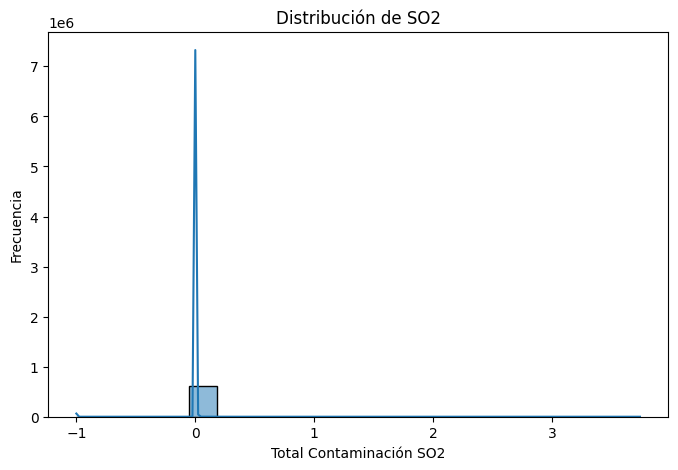

In [71]:
# Crear un histograma de la columna "SO2"
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8,5))  # Tamaño del gráfico
sns.histplot(df_measurement["SO2"], bins=20, kde=True)  # Gráfico con curva KDE (densidad)
plt.title("Distribución de SO2")  # Título del gráfico
plt.xlabel("Total Contaminación SO2")  # Etiqueta del eje X
plt.ylabel("Frecuencia")  # Etiqueta del eje Y
plt.show()  # Mostrar gráfico

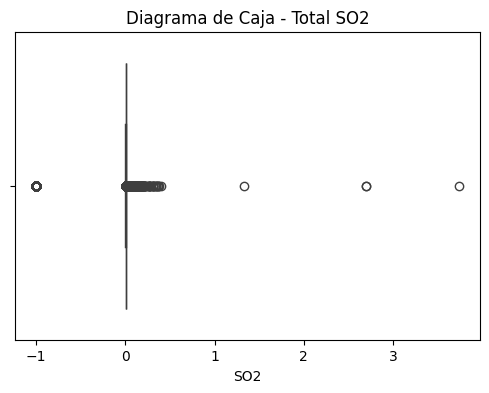

In [72]:
# Boxplot (Diagrama de Caja), Un boxplot nos ayuda a identificar valores extremos (outliers) en los datos.
plt.figure(figsize=(6,4))
sns.boxplot(x=df_measurement["SO2"])
plt.title("Diagrama de Caja - Total SO2")
plt.show()

In [73]:
# Usando IQR (Interquartile Range) para detectar outliers en SO2
# Calcular el IQR para SO2
Q1_SO2= df_measurement["SO2"].quantile(0.25)
Q3_SO2 = df_measurement["SO2"].quantile(0.75)
IQR_SO2 = Q3_SO2 - Q1_SO2

# Definir umbrales para outliers
lower_bound_SO2 = Q1_SO2 - 1.5 * IQR_SO2 # limite inferior
upper_bound_SO2 = Q3_SO2 + 1.5 * IQR_SO2 # limite superior

# filtrar los datos para hallar los outlier
outliers_SO2 = df_measurement[(df_measurement["SO2"] < lower_bound_SO2) | (df_measurement["SO2"] > upper_bound_SO2)]
print(outliers_SO2)

# Cantidad de outlier
cantidad_outliers_SO2 = len(outliers_SO2)
print(f"Cantidad de outliers_SO2: {cantidad_outliers_SO2}")

          Measurement date  Station code   Latitude   Longitude    SO2    NO2  \
230    2021-01-10 14:00:00           204  37.572016  127.005008  0.051  0.007   
231    2021-01-10 15:00:00           204  37.572016  127.005008  0.029  0.012   
400    2021-01-17 16:00:00           204  37.572016  127.005008  0.009  0.083   
401    2021-01-17 17:00:00           204  37.572016  127.005008  0.009  0.082   
402    2021-01-17 18:00:00           204  37.572016  127.005008  0.009  0.083   
...                    ...           ...        ...         ...    ...    ...   
619787 2023-09-16 17:00:00           228  37.544962  127.136792  0.045  0.004   
620354 2023-10-10 14:00:00           228  37.544962  127.136792  0.108  0.007   
620521 2023-10-17 13:00:00           228  37.544962  127.136792  0.122  0.008   
620881 2023-11-01 13:00:00           228  37.544962  127.136792  0.092  0.003   
621287 2023-11-18 11:00:00           228  37.544962  127.136792  0.023  0.013   

           O3   CO   PM10  

In [74]:
# Usando IQR (Interquartile Range) para detectar outliers en O3
# Calcular el IQR para SO2
Q1_O3= df_measurement["O3"].quantile(0.25)
Q3_O3 = df_measurement["O3"].quantile(0.75)
IQR_O3 = Q3_O3 - Q1_O3

# Definir umbrales para outliers
lower_bound_O3 = Q1_O3 - 1.5 * IQR_O3 # limite inferior
upper_bound_O3 = Q3_O3 + 1.5 * IQR_O3 # limite superior

# filtrar los datos para hallar los outlier
outliers_O3 = df_measurement[(df_measurement["O3"] < lower_bound_O3) | (df_measurement["O3"] > upper_bound_O3)]
print(outliers_O3)

# Cantidad de outlier
cantidad_outliers_O3 = len(outliers_O3)
print(f"Cantidad de outliers_O3: {cantidad_outliers_O3}")

          Measurement date  Station code   Latitude   Longitude    SO2    NO2  \
854    2021-02-05 14:00:00           204  37.572016  127.005008 -1.000 -1.000   
855    2021-02-05 15:00:00           204  37.572016  127.005008 -1.000 -1.000   
856    2021-02-05 16:00:00           204  37.572016  127.005008 -1.000 -1.000   
857    2021-02-05 17:00:00           204  37.572016  127.005008 -1.000 -1.000   
858    2021-02-05 18:00:00           204  37.572016  127.005008 -1.000 -1.000   
...                    ...           ...        ...         ...    ...    ...   
619675 2023-09-12 01:00:00           228  37.544962  127.136792 -1.000 -1.000   
619676 2023-09-12 02:00:00           228  37.544962  127.136792 -1.000 -1.000   
619677 2023-09-12 03:00:00           228  37.544962  127.136792 -1.000 -1.000   
620090 2023-09-29 14:00:00           228  37.544962  127.136792  0.004  0.013   
620091 2023-09-29 15:00:00           228  37.544962  127.136792  0.004  0.013   

           O3   CO  PM10  P

In [75]:
# Calculo de la correlación entre SO2 y O3
correlacion_SO2_O3 = df_measurement["SO2"].corr(df_measurement["O3"])
print(f"Correlación entre SO2 y O3: {correlacion_SO2_O3}")

Correlación entre SO2 y O3: 0.7906982637734761


In [76]:
# Calcular la correlación entre "SO2" y "O3", otra forma:
correlacion_SO2_O3 = df_measurement[["SO2", "O3"]].corr()
print(correlacion_SO2_O3)

          SO2        O3
SO2  1.000000  0.790698
O3   0.790698  1.000000


# Matriz de Correlación

In [77]:
# calculo de la matriz de correlación, para ello debemos excluir en primer lugar las columnas no numéricas (fecha)
numeric_columns = df_measurement.select_dtypes(include=['number']).columns
matriz_correlacion_df_measurement = df_measurement[numeric_columns].corr()
print(matriz_correlacion_df_measurement)

                  Station code  Latitude  Longitude       SO2       NO2  \
Station code          1.000000 -0.495615   0.049264  0.031512  0.023045   
Latitude             -0.495615  1.000000   0.309475 -0.009980 -0.022551   
Longitude             0.049264  0.309475   1.000000  0.012993  0.007576   
SO2                   0.031512 -0.009980   0.012993  1.000000  0.694126   
NO2                   0.023045 -0.022551   0.007576  0.694126  1.000000   
O3                    0.022350 -0.002206   0.005088  0.790698  0.774785   
CO                   -0.035953  0.057503   0.035085  0.297424  0.236723   
PM10                  0.029206 -0.022149  -0.023051  0.046651  0.053607   
PM2.5                 0.017362 -0.024358  -0.021216  0.046153  0.056513   
año                  -0.003494  0.012758  -0.006830 -0.053924 -0.040385   
mes                  -0.007286  0.011464  -0.003902 -0.042942 -0.046222   
día                   0.000095  0.000126  -0.000260 -0.005748 -0.003327   
hora                 -0.0

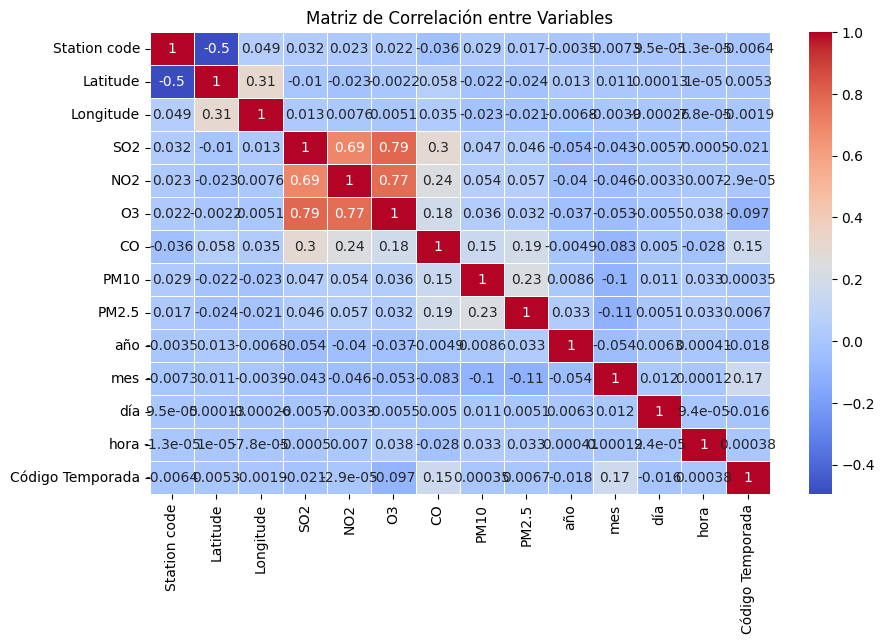

In [78]:
# creamos un heatmap
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.heatmap(matriz_correlacion_df_measurement, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Matriz de Correlación entre Variables")
plt.show()

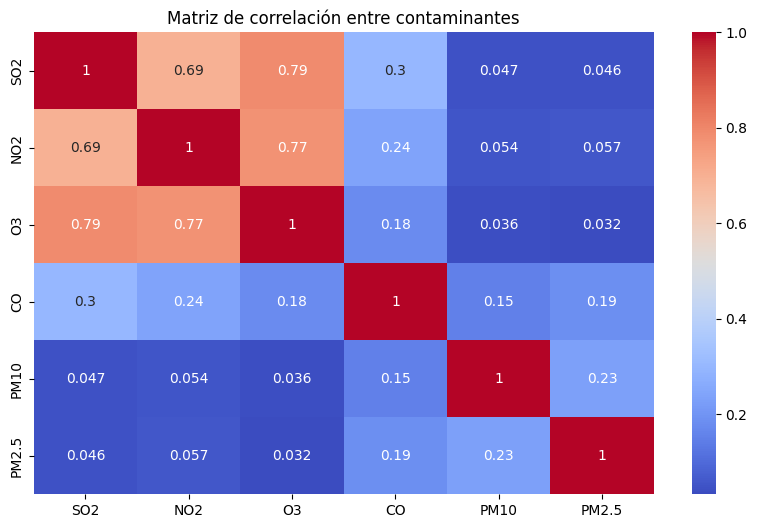

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df_measurement[['SO2', 'NO2', 'O3', 'CO', 'PM10', 'PM2.5']].corr(), annot=True, cmap='coolwarm')
plt.title('Matriz de correlación entre contaminantes')
plt.show()

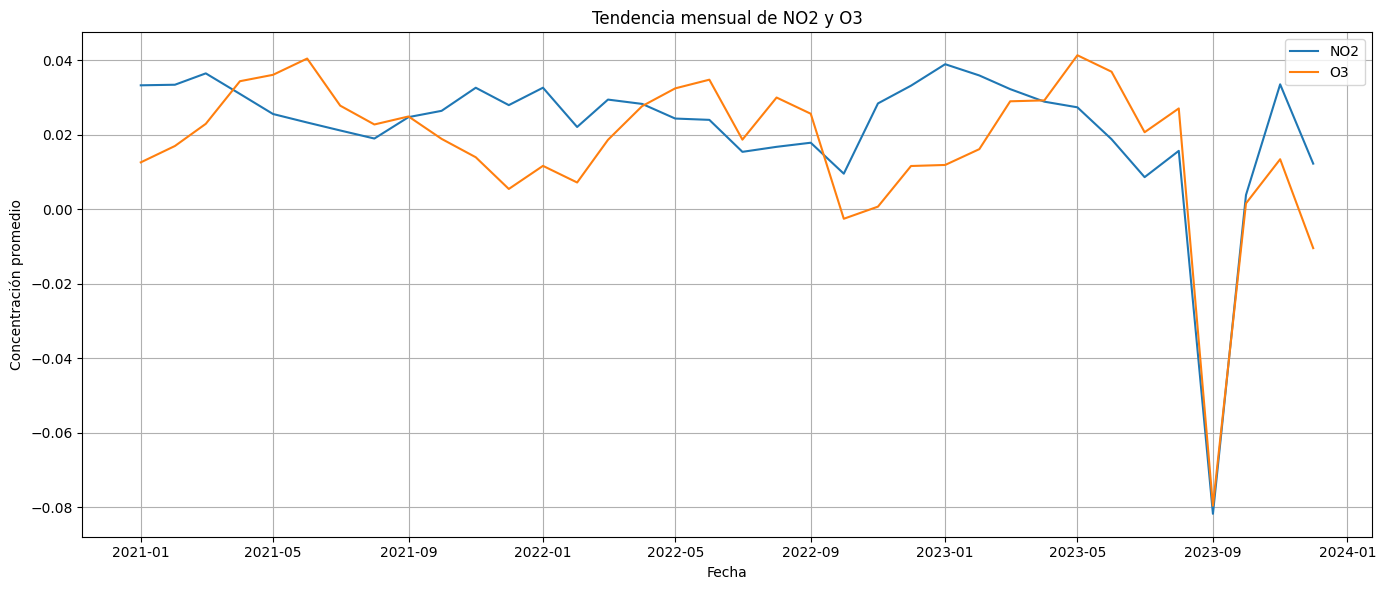

In [80]:
# debido a que la correlacición entre NO2 y O3 es la mas elevada = 0,77, vamos a graficar su concentración promedio a lo largo del tiempo para ambas a fin de poder visualizar su tendencia.
# Preparación de datos:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Asegurarse de que la columna de fecha esté en formato datetime
df_measurement['Measurement date'] = pd.to_datetime(df_measurement['Measurement date'])

# Visualización mensual: Promedio de NO2 y O3 por mes

# Agrupar por año y mes para obtener el promedio mensual
# se han cambiado las columnas 'year' and 'month' por las correctas 'año' and 'mes'
df_monthly = df_measurement.groupby(['año', 'mes'])[['NO2', 'O3']].mean().reset_index()

# Crear columna de fecha mensual para el eje x
#Cambia los nombres de las columnas temporalmente a 'year', 'month', y agrega 'day'=1 así:
df_monthly['fecha'] = pd.to_datetime(df_monthly[['año', 'mes']].rename(columns={'año': 'year', 'mes': 'month'}).assign(day=1))

# Gráfica
plt.figure(figsize=(14,6))
sns.lineplot(data=df_monthly, x='fecha', y='NO2', label='NO2')
sns.lineplot(data=df_monthly, x='fecha', y='O3', label='O3')
plt.title('Tendencia mensual de NO2 y O3')
plt.xlabel('Fecha')
plt.ylabel('Concentración promedio')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

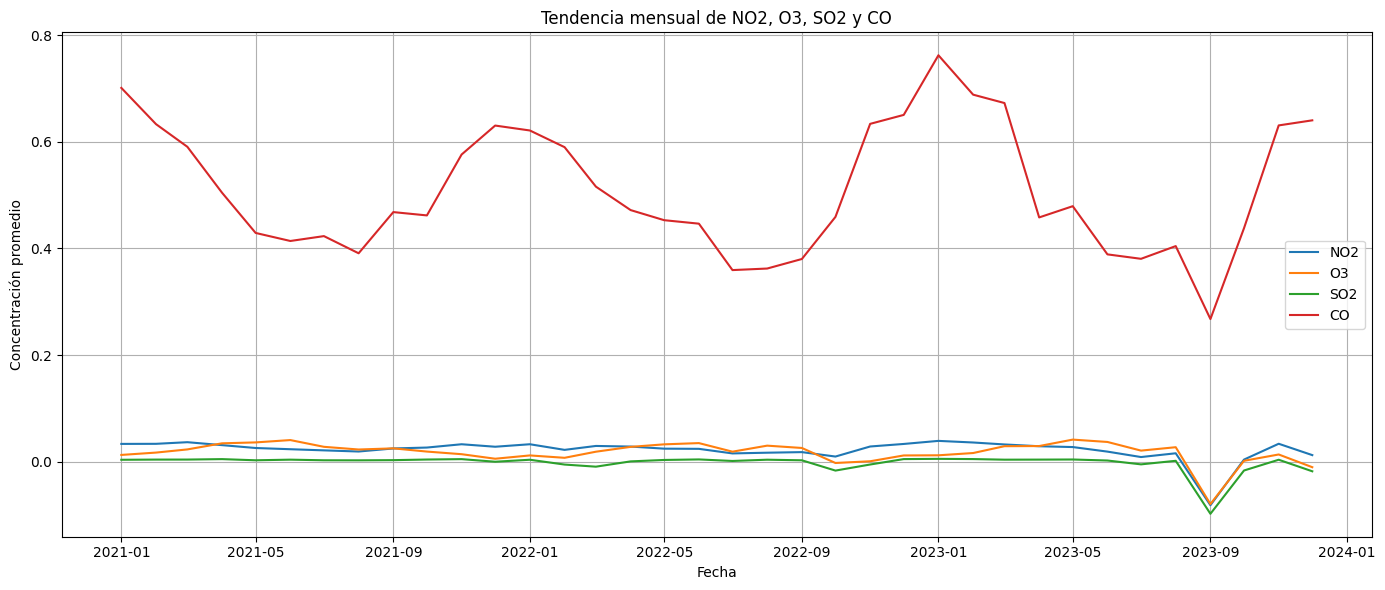

In [81]:
# graficamos todos los contaminantes a fin de comparar sus tendencias a lo largo del tiempo:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Asegurarse de que la columna de fecha esté en formato datetime
df_measurement['Measurement date'] = pd.to_datetime(df_measurement['Measurement date'])

# Agrupar por año y mes para obtener el promedio mensual de NO2, O3, SO2 y CO
df_monthly = df_measurement.groupby(['año', 'mes'])[['NO2', 'O3', 'SO2', 'CO']].mean().reset_index()

# Crear columna de fecha mensual para el eje x
df_monthly['fecha'] = pd.to_datetime(df_monthly[['año', 'mes']].rename(columns={'año': 'year', 'mes': 'month'}).assign(day=1))

# Gráfica
plt.figure(figsize=(14,6))
sns.lineplot(data=df_monthly, x='fecha', y='NO2', label='NO2')
sns.lineplot(data=df_monthly, x='fecha', y='O3', label='O3')
sns.lineplot(data=df_monthly, x='fecha', y='SO2', label='SO2')
sns.lineplot(data=df_monthly, x='fecha', y='CO', label='CO')
plt.title('Tendencia mensual de NO2, O3, SO2 y CO')
plt.xlabel('Fecha')
plt.ylabel('Concentración promedio')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

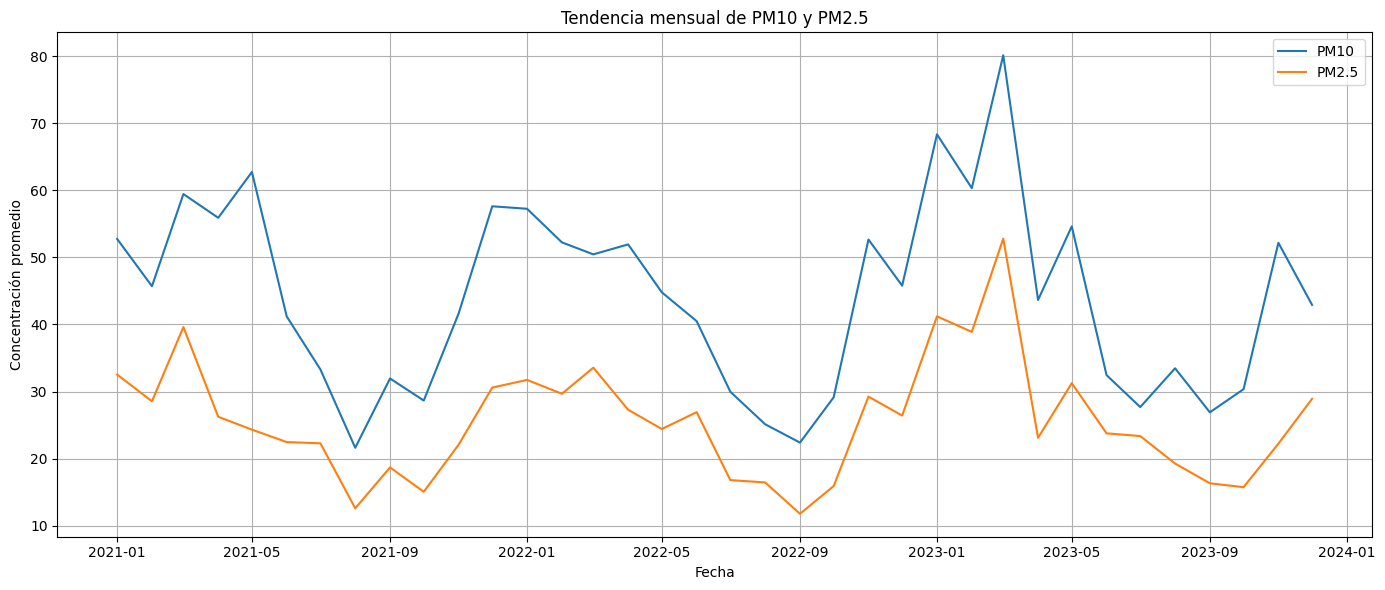

In [82]:
# Ahora visualizaremos las tendencias PM10 y PM2.5

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Asegurarse de que la columna de fecha esté en formato datetime
df_measurement['Measurement date'] = pd.to_datetime(df_measurement['Measurement date'])

# Agrupar por año y mes para obtener el promedio mensual de PM10 y PM2.5
df_monthly = df_measurement.groupby(['año', 'mes'])[['PM10', 'PM2.5']].mean().reset_index()

# Crear columna de fecha mensual para el eje x
df_monthly['fecha'] = pd.to_datetime(df_monthly[['año', 'mes']].rename(columns={'año': 'year', 'mes': 'month'}).assign(day=1))

# Gráfica
plt.figure(figsize=(14,6))
sns.lineplot(data=df_monthly, x='fecha', y='PM10', label='PM10')
sns.lineplot(data=df_monthly, x='fecha', y='PM2.5', label='PM2.5')
plt.title('Tendencia mensual de PM10 y PM2.5')
plt.xlabel('Fecha')
plt.ylabel('Concentración promedio')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Tarea Nº 2:

Predecir las concentraciones horarias de contaminantes para las siguientes estaciones y períodos, suponiendo mediciones sin errores:



1.   Station code: 206 | pollutant: SO2   | Period: 2023-07-01 00:00:00 - 2023-07-31 23:00:00
2.   Station code: 211 | pollutant: NO2   | Period: 2023-08-01 00:00:00 - 2023-08-31 23:00:00
3.   Station code: 217 | pollutant: O3    | Period: 2023-09-01 00:00:00 - 2023-09-30 23:00:00
4.   Station code: 219 | pollutant: CO    | Period: 2023-10-01 00:00:00 - 2023-10-31 23:00:00
5.   Station code: 225 | pollutant: PM10  | Period: 2023-11-01 00:00:00 - 2023-11-30 23:00:00
6.   Station code: 228 | pollutant: PM2.5 | Period: 2023-12-01 00:00:00 - 2023-12-31 23:00:00

# Variable objetivo (y): variables dependientes

1.   pollutant: SO2
2.   pollutant: NO2
3.   pollutant: O3
4.   pollutant: CO
5.   pollutant: PM10
6.   pollutant: PM2.5

# Tarea Nº 2: "Modelos de Regresión:

# Modelo 1: Regresión;  Predicción SO2 ; station code: 206

In [83]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Nos aseguramos que la columna 'Measurement date' está en formato datetime

df_measurement['Measurement date'] = pd.to_datetime(df_measurement['Measurement date'])

# Filtramos el DataFrame por estación y contaminante:

station_code_SO2 = 206
pollutant_SO2 = 'SO2'

df_SO2 = df_measurement[(df_measurement['Station code'] == station_code_SO2) & (df_measurement[pollutant_SO2].notna())]

# Definimos variables independientes o características (X_SO2) y variable dependiente u objetivo (y_SO2)

X_SO2 = df_SO2[['Station code', 'año', 'mes', 'día', 'hora', 'NO2', 'CO', 'O3', 'PM10', 'PM2.5']]
y_SO2 = df_SO2[pollutant_SO2]

# Dividir en entrenamiento y prueba

X_train_SO2, X_test_SO2, y_train_SO2, y_test_SO2 = train_test_split(X_SO2, y_SO2, test_size=0.2, random_state=42)

# Crear y evaluar modelos:

modelos_SO2 = {
    'Regresión Lineal': LinearRegression(),
    'Regresión Ridge': Ridge(),
    'Regresión Lasso': Lasso(),
    'Árbol de Decisión': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'SVR': SVR()
}

resultados_SO2 = {}

for nombre, modelo in modelos_SO2.items():
    modelo.fit(X_train_SO2, y_train_SO2)
    y_pred_SO2 = modelo.predict(X_test_SO2)
    mse = mean_squared_error(y_test_SO2, y_pred_SO2)
    r2 = r2_score(y_test_SO2, y_pred_SO2)
    resultados_SO2[nombre] = {'MSE': mse, 'R²': r2}

# Mostrar resultados:

print("\nResultados para la predicción de SO2:")
for nombre, metrics in resultados_SO2.items():
    print(f"{nombre}:")
    print(f"  MSE: {metrics['MSE']}")
    print(f"  R²: {metrics['R²']}\n")



Resultados para la predicción de SO2:
Regresión Lineal:
  MSE: 0.0001080878462770056
  R²: 0.9883069362183751

Regresión Ridge:
  MSE: 0.00010688297261311571
  R²: 0.9884372807953644

Regresión Lasso:
  MSE: 0.009243797656029127
  R²: -4.341833004906093e-06

Árbol de Decisión:
  MSE: 1.3304005556841777e-06
  R²: 0.9998560757838318

Random Forest:
  MSE: 1.4475351238712633e-06
  R²: 0.9998434040355824

SVR:
  MSE: 0.014804170495222684
  R²: -0.6015316781412792



In [84]:
# Predicciones SO2 usando el modelo Random Forest, con mejor evaluación

modelo_SO2_ganador = modelos_SO2['Random Forest']
y_pred_SO2_ganador = modelo_SO2_ganador.predict(X_test_SO2)

print("Predicciones del modelo Random Forest (SO2):")
print(y_pred_SO2_ganador)

# Crear DataFrame con comparaciones:

# Comparar valores reales vs predichos
df_comparacion_SO2 = pd.DataFrame({
    'Real': y_test_SO2.values,
    'Pred': y_pred_SO2_ganador
})

print("Comparación Real vs Predicho (SO2):")
print(df_comparacion_SO2.head())

Predicciones del modelo Random Forest (SO2):
[ 0.00337 -1.       0.0033  ...  0.00405  0.00448  0.00284]
Comparación Real vs Predicho (SO2):
    Real     Pred
0  0.003  0.00337
1 -1.000 -1.00000
2  0.003  0.00330
3  0.003  0.00412
4  0.003  0.00310


# Opcional:

Trataremos de optimizar el modelo de Random Forest (El mejor evaluado) variando los hiperparámetros a través de la herramienta: GridsearchCV

In [85]:
from sklearn.model_selection import GridSearchCV

# 1. Definir la grilla de hiperparámetros a probar

param_grid_rf_SO2 = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5],
}

# 2. Crear el objeto GridSearchCV

grid_rf_SO2 = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid_rf_SO2,
    cv=3,
    scoring='r2',
    n_jobs=-1  # usa todos los núcleos disponibles
)

# 3. Entrenar el GridSearch con los datos de SO2

grid_rf_SO2.fit(X_train_SO2, y_train_SO2)

# 4. Obtener el mejor modelo optimizado

modelo_optimizado_rf_SO2 = grid_rf_SO2.best_estimator_ # aquí, guardamos el mejor modelo optimizado

# 5. Hacer predicciones con el modelo optimizado

y_pred_rf_optim_SO2 = modelo_optimizado_rf_SO2.predict(X_test_SO2)

# 6. Evaluar el modelo optimizado

print("🔧 Random Forest Optimizado (SO2):")
print(f"  Mejor R²: {r2_score(y_test_SO2, y_pred_rf_optim_SO2)}")
print(f"  Mejor MSE: {mean_squared_error(y_test_SO2, y_pred_rf_optim_SO2)}")
print(f"  Mejores parámetros: {grid_rf_SO2.best_params_}")

🔧 Random Forest Optimizado (SO2):
  Mejor R²: 0.9999191519234848
  Mejor MSE: 7.473400153602818e-07
  Mejores parámetros: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 50}


# Modelo 1: Regresión;  pollutant: SO2

# Predicción:
Station code: 206 | pollutant: SO2 | Period: 2023-07-01 00:00:00 - 2023-07-31

In [86]:
# Como pudimos observar, se obtuvo una pequña mejoría al optimizar el modelo Random Forest a través de la herramienta GridSearchCV,
# la opción encontrada por ésta herramienta: modelo_optimizado_rf_SO2, será la que tomemos en cuenta como solución para las predicciones

# Predicciones modelo Random Forest optimizado para los valores: Station code: 206 | pollutant: SO2 | Period: 2023-07-01 00:00:00 - 2023-07-31 23:00:00:

import pandas as pd

# Crear rango de fechas base para julio

fechas_julio = pd.date_range(start='2023-07-01 00:00:00', end='2023-07-31 23:00:00', freq='h')

# Crear DataFrame base con características requeridas

df_SO2_julio = pd.DataFrame({
    'fecha': fechas_julio,    # la lista completa de fechas y horas que creamos antes
    'Station code': station_code_SO2,  # Recuerda: definido como 206;  Es el número del código de la estación donde se mide la calidad del aire. Se repite para todas las filas.
    'año': fechas_julio.year,   # extraído de cada fecha. Siempre será 2023 en este caso
    'mes': fechas_julio.month,  # extraído de cada fecha. Siempre será 7 (agosto)
    'día': fechas_julio.day,    # extraído de cada fecha. Va de 1 a 31.
    'hora': fechas_julio.hour,  # extraída de cada fecha. Va de 0 a 23 (porque son horas del día)
    # Valores promedio de otros contaminantes
    'NO2': [df_measurement['NO2'].mean()] * len(fechas_julio), # df_measurement['NO2'].mean() significa: "Calcula el promedio de la columna NO2 del DataFrame df_measurement" y luego ese promedio lo repetimos para cada fila del mes de julio con: * len(fechas_julio)
    'CO': [df_measurement['CO'].mean()] * len(fechas_julio),
    'O3': [df_measurement['O3'].mean()] * len(fechas_julio),
    'PM10': [df_measurement['PM10'].mean()] * len(fechas_julio),
    'PM2.5': [df_measurement['PM2.5'].mean()] * len(fechas_julio)
})

# Modelado

# Modelo Random Forest Optimizado por GridSearchCV (modelo_optimizado_rf_SO2); mejor modelo obtenido

columnas_SO2_opt = modelo_optimizado_rf_SO2.feature_names_in_ # .feature_names_in_ : lista de columnas que el modelo usó cuando fue entrenado.
df_SO2_julio_opt = df_SO2_julio[columnas_SO2_opt].copy()
df_SO2_julio['pred_SO2_rf_optimizado'] = modelo_optimizado_rf_SO2.predict(df_SO2_julio_opt)
print("Predicciones del modelo optimizado (Random Forest con GridSearchCV):")
print(df_SO2_julio[['fecha', 'pred_SO2_rf_optimizado']].head(30))  # mostramos los resultados del modelo optimizado:

# (opcional) mostraremos los resultados del Modelo Ganador Inicial Random Forest al cual no se le aplico la optimización (modelo_SO2_ganador)

columnas_SO2_ganador = modelo_SO2_ganador.feature_names_in_
df_SO2_julio_ganador = df_SO2_julio[columnas_SO2_ganador].copy()
df_SO2_julio['pred_SO2_ganador'] = modelo_SO2_ganador.predict(df_SO2_julio_ganador)
print("Predicciones del modelo base (Random Forest sin optimización):")
print(df_SO2_julio[['fecha', 'pred_SO2_ganador']].head())

# (opcional) Mostramos ambas predicciones

print("Comparación de predicciones entre el modelo base y el modelo optimizado:")
print(df_SO2_julio[['fecha', 'pred_SO2_ganador', 'pred_SO2_rf_optimizado']].head())



Predicciones del modelo optimizado (Random Forest con GridSearchCV):
                 fecha  pred_SO2_rf_optimizado
0  2023-07-01 00:00:00                0.003415
1  2023-07-01 01:00:00                0.003395
2  2023-07-01 02:00:00                0.003308
3  2023-07-01 03:00:00                0.003368
4  2023-07-01 04:00:00                0.003448
5  2023-07-01 05:00:00                0.003448
6  2023-07-01 06:00:00                0.003428
7  2023-07-01 07:00:00                0.003144
8  2023-07-01 08:00:00                0.003024
9  2023-07-01 09:00:00                0.002944
10 2023-07-01 10:00:00                0.002924
11 2023-07-01 11:00:00                0.002984
12 2023-07-01 12:00:00                0.002964
13 2023-07-01 13:00:00                0.002964
14 2023-07-01 14:00:00                0.003048
15 2023-07-01 15:00:00                0.003028
16 2023-07-01 16:00:00                0.002928
17 2023-07-01 17:00:00                0.002888
18 2023-07-01 18:00:00                

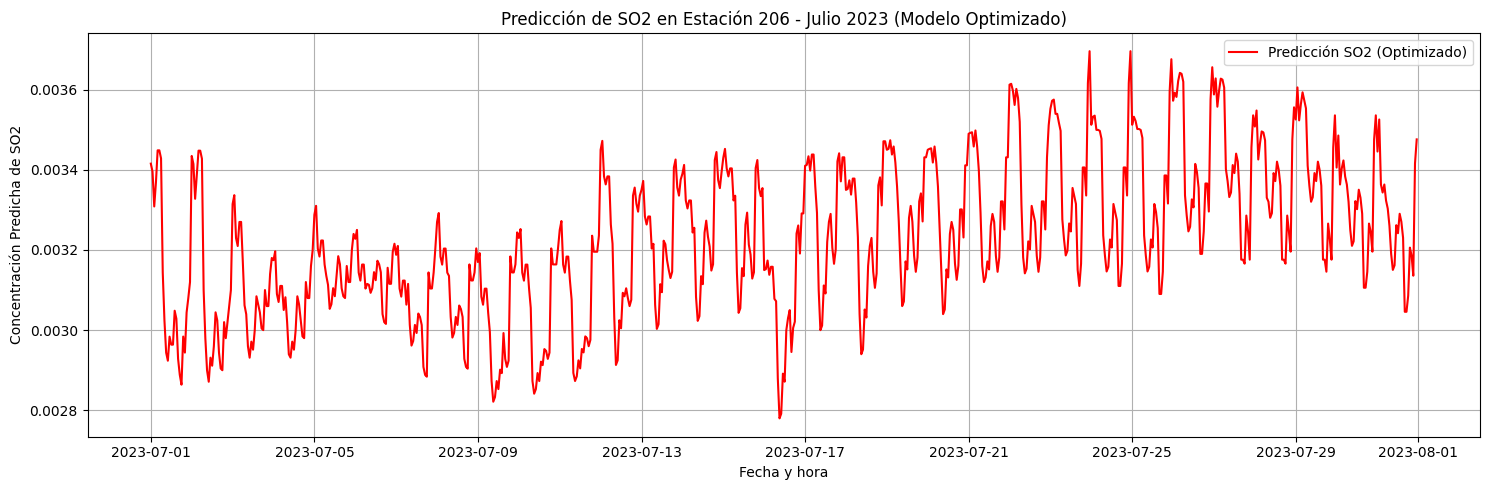

In [87]:
import matplotlib.pyplot as plt

# Graficamos las predicciones futuras del modelo optimizado para julio 2023
plt.figure(figsize=(15, 5))
plt.plot(df_SO2_julio['fecha'], df_SO2_julio['pred_SO2_rf_optimizado'], label='Predicción SO2 (Optimizado)', color='red')

plt.title('Predicción de SO2 en Estación 206 - Julio 2023 (Modelo Optimizado)')
plt.xlabel('Fecha y hora')
plt.ylabel('Concentración Predicha de SO2')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Modelo 2: Regresión, NO2

Predicción del NO2; station code: 211; 01 al 31  0872023

In [140]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Nos aseguramos que la columna 'Measurement date' está en formato datetime

df_measurement['Measurement date'] = pd.to_datetime(df_measurement['Measurement date'])

# Filtramos el DataFrame por estación y contaminante:

station_code_NO2 = 211
pollutant_NO2 = 'NO2'

df_NO2 = df_measurement[
    (df_measurement['Station code'] == station_code_NO2) &
    (df_measurement[pollutant_NO2].notna()) &
    (df_measurement[pollutant_NO2] > 0)
    ]

# Definimos variables independientes o características (X_NO2) y variable dependiente u objetivo (y_NO2)

X_NO2 = df_NO2[['Station code', 'año', 'mes', 'día', 'hora', 'SO2', 'CO', 'O3', 'PM10', 'PM2.5']]
y_NO2 = df_NO2[pollutant_NO2]

# Dividir en entrenamiento y prueba

X_train_NO2, X_test_NO2, y_train_NO2, y_test_NO2 = train_test_split(X_NO2, y_NO2, test_size=0.2, random_state=42)

# Crear y evaluar modelos:

modelos_NO2 = {
    'Regresión Lineal': LinearRegression(),
    'Regresión Ridge': Ridge(),
    'Regresión Lasso': Lasso(),
    'Árbol de Decisión': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'SVR': SVR()
}

resultados_NO2 = {}

for nombre, modelo in modelos_NO2.items():
    modelo.fit(X_train_NO2, y_train_NO2)
    y_pred_NO2 = modelo.predict(X_test_NO2)
    mse = mean_squared_error(y_test_NO2, y_pred_NO2)
    r2 = r2_score(y_test_NO2, y_pred_NO2)
    resultados_NO2[nombre] = {'MSE': mse, 'R²': r2}

# Mostrar resultados:

print("\nResultados para la predicción de NO2:")
for nombre, metrics in resultados_NO2.items():
    print(f"{nombre}:")
    print(f"  MSE: {metrics['MSE']}")
    print(f"  R²: {metrics['R²']}\n")


Resultados para la predicción de NO2:
Regresión Lineal:
  MSE: 0.00017210130883527788
  R²: 0.3207590923382916

Regresión Ridge:
  MSE: 0.00017120117134025782
  R²: 0.3243117103472746

Regresión Lasso:
  MSE: 0.00025339691726815376
  R²: -9.4381900588969e-05

Árbol de Decisión:
  MSE: 5.3640163562017264e-05
  R²: 0.7882956635741829

Random Forest:
  MSE: 2.502717569286687e-05
  R²: 0.9012239845886207

SVR:
  MSE: 0.001788065197637438
  R²: -6.0570470150463365



In [141]:
# Predicciones NO2 usando el modelo Random Forest (mejor evaluación inicial) con datos de prueba

modelo_NO2_ganador = modelos_NO2['Random Forest']
y_pred_NO2_ganador = modelo_NO2_ganador.predict(X_test_NO2)

print("Predicciones del modelo Random Forest (NO2):")
print(y_pred_NO2_ganador)

# Crear DataFrame con comparaciones:

# Comparar valores reales vs predichos

df_comparacion_NO2 = pd.DataFrame({
    'Real': y_test_NO2.values,
    'Pred': y_pred_NO2_ganador
})

print("Comparación Real vs Predicho (NO2):")
print(df_comparacion_NO2.head())


# Mostrar comparaciones con 5 decimales forzadamente
print(df_comparacion_NO2.head())

Predicciones del modelo Random Forest (NO2):
[0.01787 0.01468 0.01216 ... 0.01205 0.03503 0.01454]
Comparación Real vs Predicho (NO2):
    Real     Pred
0  0.014  0.01787
1  0.014  0.01468
2  0.013  0.01216
3  0.047  0.04164
4  0.013  0.01089
    Real     Pred
0  0.014  0.01787
1  0.014  0.01468
2  0.013  0.01216
3  0.047  0.04164
4  0.013  0.01089


# Opcional:
Trataremos de optimizar el modelo de Random Forest (El mejor evaluado) y el del árbol de Decisión (2do mejor evaluado) variando los hiperparámetros a través de la herramienta: GridsearchCV

In [142]:
# verificaremos si se puede optimizar el modelo Random Forest (mejor evaluado):

# Hiperparámetros para probar con param_grid
# Primero definimos los rangos de valores que queremos probar para cada modelo.

from sklearn.model_selection import GridSearchCV

# Parámetros para Random Forest
parametros_rf_NO2 = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Utilizamos la herramienta GridSearchCV para Random Forest:
grid_rf_NO2 = GridSearchCV(RandomForestRegressor(), param_grid=parametros_rf_NO2, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_rf_NO2.fit(X_train_NO2, y_train_NO2)
modelo_optimizado_rf_NO2 = grid_rf_NO2.best_estimator_

# Evaluar modelo Random Forest optimizado:
y_pred_rf_opt_NO2 = modelo_optimizado_rf_NO2.predict(X_test_NO2)
mse_rf_opt_NO2 = mean_squared_error(y_test_NO2, y_pred_rf_opt_NO2)
r2_rf_opt_NO2 = r2_score(y_test_NO2, y_pred_rf_opt_NO2)

# Mostrar resultados optimizados
print("Random Forest Optimizado:")
print(f"  MSE: {mse_rf_opt_NO2}")
print(f"  R²: {r2_rf_opt_NO2}\n")

# Opcional: Ver hiperparámetros
print("Mejores parámetros para Random Forest:")
print(grid_rf_NO2.best_params_)


#-----------------------


# Parámetros para Árbol de Decisión

# parametros_dt_NO2 = {
#   'max_depth': [3, 5, 10, 20, None],
#   'min_samples_split': [2, 5, 10],
#   'min_samples_leaf': [1, 2, 4]}

# GridSearch para Árbol de Decisión
# grid_dt_NO2 = GridSearchCV(DecisionTreeRegressor(), param_grid=parametros_dt_NO2, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
# grid_dt_NO2.fit(X_train_NO2, y_train_NO2)
# modelo_optimizado_dt_NO2 = grid_dt_NO2.best_estimator_

# Evaluar Árbol de Decisión optimizado
# y_pred_dt_opt_NO2 = modelo_optimizado_dt_NO2.predict(X_test_NO2)
# mse_dt_opt_NO2 = mean_squared_error(y_test_NO2, y_pred_dt_opt_NO2)
# r2_dt_opt_NO2 = r2_score(y_test_NO2, y_pred_dt_opt_NO2)

# Mostrar resultados optimizados
# print("Árbol de Decisión Optimizado:")
# print(f"  MSE: {mse_dt_opt_NO2}")
# print(f"  R²: {r2_dt_opt_NO2}\n")

# Opcional: Ver hiperparámetros seleccionados
# print("Mejores parámetros para Árbol de Decisión:")

Random Forest Optimizado:
  MSE: 2.498798354542085e-05
  R²: 0.9013786662118147

Mejores parámetros para Random Forest:
{'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


# Modelo: 2 Regresión ; NO2

Predicción: code: 211 | pollutant: NO2 | Period: 2023-08-01 00:00:00 - 2023-08-31 23:00:

In [143]:
import pandas as pd

fechas_agosto = pd.date_range(start='2023-08-01 00:00:00', end='2023-08-31 23:00:00', freq='h') # El resultado es una lista con todas las fechas y horas de agosto.

# Creamos una tabla de datos base (DataFrame) con las características necesarias
df_NO2_agosto = pd.DataFrame({
    'fecha': fechas_agosto, # la lista completa de fechas y horas que creamos antes
    'Station code': station_code_NO2, # Es el número del código de la estación donde se mide la calidad del aire. Se repite para todas las filas (se definio = 211).
    'año': fechas_agosto.year, # extraído de cada fecha. Siempre será 2023 en este caso
    'mes': fechas_agosto.month, # extraído de cada fecha. Siempre será 7 (agosto)
    'día': fechas_agosto.day, # extraído de cada fecha. Va de 1 a 31.
    'hora': fechas_agosto.hour, # extraída de cada fecha. Va de 0 a 23 (porque son horas del día)
    # Agregamos las columnas con los valores promedio de c/u de los contaminantes, sin tomar en cuenta el correspondiente a la función objetivo:
    'SO2': [df_measurement['SO2'].mean()] * len(fechas_agosto), # df_measurement['NO2'].mean() significa: "Calcula el promedio de la columna NO2 del DataFrame df_measurement" y luego ese promedio lo repetimos para cada fila del mes de julio con: * len(fechas_julio)
    'CO': [df_measurement['CO'].mean()] * len(fechas_agosto),
    'O3': [df_measurement['O3'].mean()] * len(fechas_agosto),
    'PM10': [df_measurement['PM10'].mean()] * len(fechas_agosto),
    'PM2.5': [df_measurement['PM2.5'].mean()] * len(fechas_agosto)
})


# Modelado con Random Forest inicial (sin haber utilizado la herramienta GridSearchCV):

# -------- Modelo Inicial --------
columnas_NO2_ganador = modelo_NO2_ganador.feature_names_in_  # Columnas que el modelo espera; .feature_names_in_ : lista de columnas que el modelo usó cuando fue entrenado.
df_NO2_agosto_ganador = df_NO2_agosto[columnas_NO2_ganador].copy()
df_NO2_agosto['pred_NO2_ganador'] = modelo_NO2_ganador.predict(df_NO2_agosto_ganador)
# mostramos los resultados
print("Predicciones del modelo ganador (Random Forest):")
print(df_NO2_agosto[['fecha', 'pred_NO2_ganador']].head())

# -------- Modelo Optimizado por GridSearchCV  --------
columnas_NO2_opt = modelo_optimizado_rf_NO2.feature_names_in_ # .feature_names_in_ : lista de columnas que el modelo usó cuando fue entrenado.
df_NO2_agosto_opt = df_NO2_agosto[columnas_NO2_opt].copy()
df_NO2_agosto['pred_NO2_rf_optimizado'] = modelo_optimizado_rf_NO2.predict(df_NO2_agosto_opt)

# Mostramos ambas predicciones (opcional)
df_comparacion_final = df_NO2_agosto[['fecha', 'pred_NO2_ganador', 'pred_NO2_rf_optimizado']]
print("Comparación de predicciones para agosto 2023:")
print(df_comparacion_final.head())

# Mostramos los resultados de las Predicciones con el modelo Random Forest optimizado (mejor)
print("Predicciones del modelo optimizado (Random Forest con GridSearchCV):")
print(df_NO2_agosto[['fecha', 'pred_NO2_rf_optimizado']].head(10))



Predicciones del modelo ganador (Random Forest):
                fecha  pred_NO2_ganador
0 2023-08-01 00:00:00           0.02336
1 2023-08-01 01:00:00           0.02250
2 2023-08-01 02:00:00           0.02178
3 2023-08-01 03:00:00           0.02145
4 2023-08-01 04:00:00           0.02136
Comparación de predicciones para agosto 2023:
                fecha  pred_NO2_ganador  pred_NO2_rf_optimizado
0 2023-08-01 00:00:00           0.02336                0.023565
1 2023-08-01 01:00:00           0.02250                0.022790
2 2023-08-01 02:00:00           0.02178                0.021500
3 2023-08-01 03:00:00           0.02145                0.021330
4 2023-08-01 04:00:00           0.02136                0.021075
Predicciones del modelo optimizado (Random Forest con GridSearchCV):
                fecha  pred_NO2_rf_optimizado
0 2023-08-01 00:00:00                0.023565
1 2023-08-01 01:00:00                0.022790
2 2023-08-01 02:00:00                0.021500
3 2023-08-01 03:00:00       

# Modelo: 3  ; Regresión ; O3
Predicción: Station Code: 217; pollutant: O3, periodo: 01 al 30   09/2023

In [147]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Nos aseguramos que la columna 'Measurement date' está en formato datetime

df_measurement['Measurement date'] = pd.to_datetime(df_measurement['Measurement date'])

# Filtramos el DataFrame por estación y contaminante:

station_code_O3 = 217
pollutant_O3 = 'O3'

df_O3 = df_measurement[
    (df_measurement['Station code'] == station_code_O3) &
    (df_measurement[pollutant_O3].notna()) &
    (df_measurement[pollutant_O3] >0 )
    ]

# Definimos variables independientes o características (X_O3) y variable dependiente u objetivo (y_O3)

X_O3 = df_O3[['Station code', 'año', 'mes', 'día', 'hora', 'SO2', 'NO2', 'CO', 'PM10', 'PM2.5']]
y_O3 = df_O3[pollutant_O3]

# Dividir en entrenamiento y prueba

X_train_O3, X_test_O3, y_train_O3, y_test_O3 = train_test_split(X_O3, y_O3, test_size=0.2, random_state=42)

# Crear y evaluar modelos:

modelos_O3 = {
    'Regresión Lineal': LinearRegression(),
    'Regresión Ridge': Ridge(),
    'Regresión Lasso': Lasso(),
    'Árbol de Decisión': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'SVR': SVR()
}

resultados_O3 = {}

for nombre, modelo in modelos_O3.items():
    modelo.fit(X_train_O3, y_train_O3)
    y_pred_O3 = modelo.predict(X_test_O3)
    mse = mean_squared_error(y_test_O3, y_pred_O3)
    r2 = r2_score(y_test_O3, y_pred_O3)
    resultados_O3[nombre] = {'MSE': mse, 'R²': r2}

# Mostrar resultados:

print("\nResultados para la predicción de O3:")
for nombre, metrics in resultados_NO2.items():
    print(f"{nombre}:")
    print(f"  MSE: {metrics['MSE']}")
    print(f"  R²: {metrics['R²']}\n")


Resultados para la predicción de O3:
Regresión Lineal:
  MSE: 0.00017210130883527788
  R²: 0.3207590923382916

Regresión Ridge:
  MSE: 0.00017120117134025782
  R²: 0.3243117103472746

Regresión Lasso:
  MSE: 0.00025339691726815376
  R²: -9.4381900588969e-05

Árbol de Decisión:
  MSE: 5.3640163562017264e-05
  R²: 0.7882956635741829

Random Forest:
  MSE: 2.502717569286687e-05
  R²: 0.9012239845886207

SVR:
  MSE: 0.001788065197637438
  R²: -6.0570470150463365



In [148]:
# Predicciones O3 usando el modelo Random Forest (mejor evaluación) usando los datos de prueba

modelo_O3_ganador = modelos_O3['Random Forest']
y_pred_O3_ganador = modelo_O3_ganador.predict(X_test_O3)

print("Predicciones del modelo Random Forest (O3):")
print(y_pred_O3_ganador)

# Crear DataFrame con comparaciones:

# Comparar valores reales vs predichos
df_comparacion_O3 = pd.DataFrame({
    'Real': y_test_O3.values,
    'Pred': y_pred_O3_ganador
})

print("Comparación Real vs Predicho (O3):")
print(df_comparacion_O3.head())

Predicciones del modelo Random Forest (O3):
[0.03269 0.03678 0.0137  ... 0.00289 0.07229 0.03541]
Comparación Real vs Predicho (O3):
    Real     Pred
0  0.030  0.03269
1  0.022  0.03678
2  0.012  0.01370
3  0.025  0.01822
4  0.036  0.03934


In [149]:
# verificaremos si se puede optimizar el modelo Random Forest (mejor evaluado):

# Hiperparámetros para probar con param_grid
# Primero definimos los rangos de valores que queremos probar para cada modelo.

from sklearn.model_selection import GridSearchCV

# Parámetros para Random Forest
parametros_rf_O3 = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Utilizamos la herramienta GridSearchCV para Random Forest:
grid_rf_O3 = GridSearchCV(RandomForestRegressor(), param_grid=parametros_rf_O3, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_rf_O3.fit(X_train_O3, y_train_O3)
modelo_optimizado_rf_O3 = grid_rf_O3.best_estimator_

# Evaluar modelo Random Forest optimizado:
y_pred_rf_opt_O3 = modelo_optimizado_rf_O3.predict(X_test_O3)
mse_rf_opt_O3 = mean_squared_error(y_test_O3, y_pred_rf_opt_O3)
r2_rf_opt_O3 = r2_score(y_test_O3, y_pred_rf_opt_O3)

# Mostrar resultados optimizados
print("Random Forest Optimizado:")
print(f"  MSE: {mse_rf_opt_O3}")
print(f"  R²: {r2_rf_opt_O3}\n")

# Opcional: Ver hiperparámetros
print("Mejores parámetros para Random Forest:")
print(grid_rf_O3.best_params_)

Random Forest Optimizado:
  MSE: 5.088415019042438e-05
  R²: 0.8750682341905827

Mejores parámetros para Random Forest:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


# Modelo 3: Regresión

# Predicción: O3
Station code: 217 | pollutant: O3 | Period: 2023-09-01 00:00:00 - 2023-09-30 23:00:00

In [151]:
import pandas as pd

# Crear fecha y base de datos para septiembre

fechas_septiembre = pd.date_range(start='2023-09-01 00:00:00', end='2023-09-30 23:00:00', freq='h')

# Crear DataFrame base con características requeridas

df_O3_septiembre = pd.DataFrame({
    'fecha': fechas_septiembre,    # la lista completa de fechas y horas que creamos antes
    'Station code': station_code_O3,  # Recuerda: definido como 217;  Es el número del código de la estación donde se mide la calidad del aire. Se repite para todas las filas.
    'año': fechas_septiembre.year,   # extraído de cada fecha. Siempre será 2023 en este caso
    'mes': fechas_septiembre.month,  # extraído de cada fecha. Siempre será 9 (septiembre)
    'día': fechas_septiembre.day,    # extraído de cada fecha. Va de 1 a 30.
    'hora': fechas_septiembre.hour,  # extraída de cada fecha. Va de 0 a 23 (porque son horas del día)
    # Valores promedio de otros contaminantes
    'SO2': [df_measurement['SO2'].mean()] * len(fechas_septiembre), # df_measurement['NO2'].mean() significa: "Calcula el promedio de la columna NO2 del DataFrame df_measurement" y luego ese promedio lo repetimos para cada fila del mes de julio con: * len(fechas_julio)
    'NO2': [df_measurement['NO2'].mean()] * len(fechas_septiembre),
    'CO': [df_measurement['CO'].mean()] * len(fechas_septiembre),
    'PM10': [df_measurement['PM10'].mean()] * len(fechas_septiembre),
    'PM2.5': [df_measurement['PM2.5'].mean()] * len(fechas_septiembre)
})

# -------- Modelo Random Forest inicial --------
columnas_O3_ganador = modelo_O3_ganador.feature_names_in_  # Columnas que el modelo espera; .feature_names_in_ : lista de columnas que el modelo usó cuando fue entrenado.
df_O3_septiembre_ganador = df_O3_septiembre[columnas_O3_ganador].copy()
df_O3_septiembre['pred_O3_ganador'] = modelo_O3_ganador.predict(df_O3_septiembre_ganador)

# Como el modelo Random Forest tuvo mejor rendimiento, usamos sus predicciones
df_O3_septiembre_final = df_O3_septiembre[['fecha', 'pred_O3_ganador']]
print("Predicción final con modelo ganador (Random Forest):")
print(df_O3_septiembre_final.head())

# -------- Modelo Optimizado por GridSearchCV --------
columnas_O3_opt = modelo_optimizado_rf_O3.feature_names_in_ # .feature_names_in_ : lista de columnas que el modelo usó cuando fue entrenado.
df_O3_septiembre_opt = df_O3_septiembre[columnas_O3_opt].copy()
df_O3_septiembre['pred_O3_rf_optimizado'] = modelo_optimizado_rf_O3.predict(df_O3_septiembre_opt)

# Mostramos ambas predicciones (opcional)
df_comparacion_final = df_O3_septiembre[['fecha', 'pred_O3_ganador', 'pred_O3_rf_optimizado']]
print("Comparación de predicciones para septiembre 2023:")
print(df_comparacion_final.head())

# Mostramos los resultados de las Predicciones con el modelo Random Forest inicial (mejor)
print("Predicciones del modelo Random Forest inicial):")
print(df_O3_septiembre[['fecha', 'pred_O3_ganador']].head(20))

Predicción final con modelo ganador (Random Forest):
                fecha  pred_O3_ganador
0 2023-09-01 00:00:00          0.01999
1 2023-09-01 01:00:00          0.01934
2 2023-09-01 02:00:00          0.01803
3 2023-09-01 03:00:00          0.01647
4 2023-09-01 04:00:00          0.01577
Comparación de predicciones para septiembre 2023:
                fecha  pred_O3_ganador  pred_O3_rf_optimizado
0 2023-09-01 00:00:00          0.01999               0.019485
1 2023-09-01 01:00:00          0.01934               0.019185
2 2023-09-01 02:00:00          0.01803               0.018480
3 2023-09-01 03:00:00          0.01647               0.016640
4 2023-09-01 04:00:00          0.01577               0.016375
Predicciones del modelo Random Forest inicial):
                 fecha  pred_O3_ganador
0  2023-09-01 00:00:00          0.01999
1  2023-09-01 01:00:00          0.01934
2  2023-09-01 02:00:00          0.01803
3  2023-09-01 03:00:00          0.01647
4  2023-09-01 04:00:00          0.01577
5  

# Modelo 4: Regresión
# Predicción del CO
Station code: 219 | pollutant: CO | Period: 2023-10-01 00:00:00 - 2023-10-31 23:00:00

In [153]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Nos aseguramos que la columna 'Measurement date' está en formato datetime

df_measurement['Measurement date'] = pd.to_datetime(df_measurement['Measurement date'])

# Filtramos el DataFrame por estación y contaminante:

station_code_CO = 219
pollutant_CO = 'CO'

df_CO = df_measurement[
    (df_measurement['Station code'] == station_code_CO) &
    (df_measurement[pollutant_CO].notna())
    ]

# Definimos variables independientes o características (X_CO) y variable dependiente u objetivo (y_CO)

X_CO = df_CO[['Station code', 'año', 'mes', 'día', 'hora', 'SO2', 'NO2', 'O3', 'PM10', 'PM2.5']]
y_CO = df_CO[pollutant_CO]

# Dividir en entrenamiento y prueba

X_train_CO, X_test_CO, y_train_CO, y_test_CO = train_test_split(X_CO, y_CO, test_size=0.2, random_state=42)

# Crear y evaluar modelos:

modelos_CO = {
    'Regresión Lineal': LinearRegression(),
    'Regresión Ridge': Ridge(),
    'Regresión Lasso': Lasso(),
    'Árbol de Decisión': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'SVR': SVR()
}

resultados_CO = {}

for nombre, modelo in modelos_CO.items():
    modelo.fit(X_train_CO, y_train_CO)
    y_pred_CO = modelo.predict(X_test_CO)
    mse = mean_squared_error(y_test_CO, y_pred_CO)
    r2 = r2_score(y_test_CO, y_pred_CO)
    resultados_CO[nombre] = {'MSE': mse, 'R²': r2}

# Mostrar resultados:

print("\nResultados para la predicción de CO:")
for nombre, metrics in resultados_CO.items():
    print(f"{nombre}:")
    print(f"  MSE: {metrics['MSE']}")
    print(f"  R²: {metrics['R²']}\n")


Resultados para la predicción de CO:
Regresión Lineal:
  MSE: 0.02150678179749466
  R²: 0.7060037490132323

Regresión Ridge:
  MSE: 0.02230444386373298
  R²: 0.6950997625759987

Regresión Lasso:
  MSE: 0.05058614434001898
  R²: 0.3084908319675449

Árbol de Decisión:
  MSE: 0.013169548713622943
  R²: 0.819973160770907

Random Forest:
  MSE: 0.006279566427667649
  R²: 0.9141587521117771

SVR:
  MSE: 0.04813234363613845
  R²: 0.3420341214472199



In [98]:
# Predicciones co usando el modelo Random Forest (mejor evaluación) usando los datos de prueba

modelo_CO_ganador = modelos_CO['Random Forest']
y_pred_CO_ganador = modelo_CO_ganador.predict(X_test_CO)

print("Predicciones del modelo Random Forest (CO):")
print(y_pred_CO_ganador)

# Crear DataFrame con comparaciones:

# Comparar valores reales vs predichos
df_comparacion_CO = pd.DataFrame({
    'Real': y_test_CO.values,
    'Pred': y_pred_CO_ganador
})

print("Comparación Real vs Predicho (CO):")
print(df_comparacion_CO.head())

Predicciones del modelo Random Forest (CO):
[0.444 0.373 0.439 ... 0.322 0.485 0.467]
Comparación Real vs Predicho (CO):
   Real   Pred
0   0.3  0.444
1   0.3  0.373
2   0.4  0.439
3   0.6  0.554
4   0.2  0.248


In [99]:
# verificaremos si se puede optimizar el modelo Random Forest (mejor evaluado):

# Hiperparámetros para probar con param_grid
# Primero definimos los rangos de valores que queremos probar para cada modelo.

from sklearn.model_selection import GridSearchCV

# Parámetros para Random Forest
parametros_rf_CO = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Utilizamos la herramienta GridSearchCV para Random Forest:
grid_rf_CO = GridSearchCV(RandomForestRegressor(), param_grid=parametros_rf_CO, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_rf_CO.fit(X_train_CO, y_train_CO)
modelo_optimizado_rf_CO = grid_rf_CO.best_estimator_

# Evaluar modelo Random Forest optimizado:
y_pred_rf_opt_CO = modelo_optimizado_rf_CO.predict(X_test_CO)
mse_rf_opt_CO = mean_squared_error(y_test_CO, y_pred_rf_opt_CO)
r2_rf_opt_CO = r2_score(y_test_CO, y_pred_rf_opt_CO)

# Mostrar resultados optimizados
print("Random Forest Optimizado:")
print(f"  MSE: {mse_rf_opt_CO}")
print(f"  R²: {r2_rf_opt_CO}\n")

# Opcional: Ver hiperparámetros
print("Mejores parámetros para Random Forest:")
print(grid_rf_CO.best_params_)

Random Forest Optimizado:
  MSE: 0.0062405180303669325
  R²: 0.9146925410589821

Mejores parámetros para Random Forest:
{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


# Modelo 4: Regresión

# Predicción:
Station code: 219 | pollutant: CO | Period: 2023-10-01 00:00:00 - 2023-10-31 23:00:00

In [100]:
import pandas as pd

# Crear fecha y base de datos para octubre

fechas_octubre = pd.date_range(start='2023-10-01 00:00:00', end='2023-10-31 23:00:00', freq='h')

# Crear DataFrame base con características requeridas

df_CO_octubre = pd.DataFrame({
    'fecha': fechas_octubre,    # la lista completa de fechas y horas que creamos antes
    'Station code': station_code_CO,  # Recuerda: definido como 219;  Es el número del código de la estación donde se mide la calidad del aire. Se repite para todas las filas.
    'año': fechas_octubre.year,   # extraído de cada fecha. Siempre será 2023 en este caso
    'mes': fechas_octubre.month,  # extraído de cada fecha. Siempre será 10 (octumbre)
    'día': fechas_octubre.day,    # extraído de cada fecha. Va de 1 a 31.
    'hora': fechas_octubre.hour,  # extraída de cada fecha. Va de 0 a 23 (porque son horas del día)
    # Valores promedio de otros contaminantes
    'SO2': [df_measurement['SO2'].mean()] * len(fechas_octubre), # df_measurement['NO2'].mean() significa: "Calcula el promedio de la columna NO2 del DataFrame df_measurement" y luego ese promedio lo repetimos para cada fila del mes de julio con: * len(fechas_julio)
    'NO2': [df_measurement['NO2'].mean()] * len(fechas_octubre),
    'O3': [df_measurement['O3'].mean()] * len(fechas_octubre),
    'PM10': [df_measurement['PM10'].mean()] * len(fechas_octubre),
    'PM2.5': [df_measurement['PM2.5'].mean()] * len(fechas_octubre)
})

# -------- Modelo Random Forest inicial --------
columnas_CO_ganador = modelo_CO_ganador.feature_names_in_  # Columnas que el modelo espera; .feature_names_in_ : lista de columnas que el modelo usó cuando fue entrenado.
df_CO_octubre_ganador = df_CO_octubre[columnas_CO_ganador].copy()
df_CO_octubre['pred_CO_ganador'] = modelo_CO_ganador.predict(df_CO_octubre_ganador)
df_CO_octubre_final = df_CO_octubre[['fecha', 'pred_CO_ganador']]
print("Predicción final con modelo ganador (Random Forest):")
print(df_CO_octubre_final.head())

# -------- Modelo Optimizado por GridSearchCV (MEJOR) --------
columnas_CO_opt = modelo_optimizado_rf_CO.feature_names_in_
df_CO_octubre_opt = df_CO_octubre[columnas_CO_opt].copy()
df_CO_octubre['pred_CO_rf_optimizado'] = modelo_optimizado_rf_CO.predict(df_CO_octubre_opt)

# Mostramos ambas predicciones (opcional)
df_comparacion_final = df_CO_octubre[['fecha', 'pred_CO_ganador', 'pred_CO_rf_optimizado']]
print("Comparación de predicciones para octubre 2023:")
print(df_comparacion_final.head())

# Mostramos los resultados de las Predicciones con el modelo Random Forest optimizado (mejor)
print("Predicciones del modelo optimizado (Random Forest con GridSearchCV):")
print(df_CO_octubre[['fecha', 'pred_CO_rf_optimizado']].head(20))

Predicción final con modelo ganador (Random Forest):
                fecha  pred_CO_ganador
0 2023-10-01 00:00:00            0.338
1 2023-10-01 01:00:00            0.340
2 2023-10-01 02:00:00            0.345
3 2023-10-01 03:00:00            0.345
4 2023-10-01 04:00:00            0.347
Comparación de predicciones para octubre 2023:
                fecha  pred_CO_ganador  pred_CO_rf_optimizado
0 2023-10-01 00:00:00            0.338                 0.3315
1 2023-10-01 01:00:00            0.340                 0.3320
2 2023-10-01 02:00:00            0.345                 0.3365
3 2023-10-01 03:00:00            0.345                 0.3385
4 2023-10-01 04:00:00            0.347                 0.3445
Predicciones del modelo optimizado (Random Forest con GridSearchCV):
                 fecha  pred_CO_rf_optimizado
0  2023-10-01 00:00:00                 0.3315
1  2023-10-01 01:00:00                 0.3320
2  2023-10-01 02:00:00                 0.3365
3  2023-10-01 03:00:00                 0.

# Modelo 5 : Regresión
#Predicción PM10
Station code: 225 | pollutant: PM10 | Period: 2023-11-01 00:00:00 - 2023-11-30 23:00:00

In [101]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Nos aseguramos que la columna 'Measurement date' está en formato datetime

df_measurement['Measurement date'] = pd.to_datetime(df_measurement['Measurement date'])

# Filtramos el DataFrame por estación y contaminante:

station_code_PM10 = 225
pollutant_PM10 = 'PM10'

df_PM10 = df_measurement[(df_measurement['Station code'] == station_code_PM10) & (df_measurement[pollutant_PM10].notna())]

# Definimos variables independientes o características (X_PM10) y variable dependiente u objetivo (y_PM10)

X_PM10 = df_PM10[['año', 'mes', 'día', 'hora', 'SO2', 'NO2', 'CO','O3', 'PM2.5']]
y_PM10 = df_PM10[pollutant_PM10]

# Dividir en entrenamiento y prueba

X_train_PM10, X_test_PM10, y_train_PM10, y_test_PM10 = train_test_split(X_PM10, y_PM10, test_size=0.2, random_state=42)

# Crear y evaluar modelos:

modelos_PM10 = {
    'Regresión Lineal': LinearRegression(),
    'Regresión Ridge': Ridge(),
    'Regresión Lasso': Lasso(),
    'Árbol de Decisión': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'SVR': SVR()
}

resultados_PM10 = {}

for nombre, modelo in modelos_PM10.items():
    modelo.fit(X_train_PM10, y_train_PM10)
    y_pred_PM10 = modelo.predict(X_test_PM10)
    mse = mean_squared_error(y_test_PM10, y_pred_PM10)
    r2 = r2_score(y_test_PM10, y_pred_PM10)
    resultados_PM10[nombre] = {'MSE': mse, 'R²': r2}

# Mostrar resultados:

print("\nResultados para la predicción de PM10:")
for nombre, metrics in resultados_PM10.items():
    print(f"{nombre}:")
    print(f"  MSE: {metrics['MSE']}")
    print(f"  R²: {metrics['R²']}\n")


Resultados para la predicción de PM10:
Regresión Lineal:
  MSE: 23650.810127418994
  R²: 0.020618668102955873

Regresión Ridge:
  MSE: 23657.82697321307
  R²: 0.02032810013752495

Regresión Lasso:
  MSE: 23665.29663781655
  R²: 0.02001878092060294

Árbol de Decisión:
  MSE: 38628.89818033122
  R²: -0.5996247716566798

Random Forest:
  MSE: 21169.491188182375
  R²: 0.12337022014191013

SVR:
  MSE: 24350.59133847137
  R²: -0.00835930985317579



In [102]:
# incluir codigo temporada como característica al modelo anterior a fin de tratar de mejorarlo
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Nos aseguramos que la columna 'Measurement date' está en formato datetime

df_measurement['Measurement date'] = pd.to_datetime(df_measurement['Measurement date'])

# Filtramos el DataFrame por estación y contaminante:

station_code_PM10 = 225
pollutant_PM10 = 'PM10'

df_PM10 = df_measurement[(df_measurement['Station code'] == station_code_PM10) & (df_measurement[pollutant_PM10].notna())]

# Definimos variables independientes o características (X_PM10) y variable dependiente u objetivo (y_PM10)

X_PM10 = df_PM10[['Station code', 'año', 'mes', 'día', 'hora', 'SO2', 'NO2', 'CO','O3', 'PM2.5','Código Temporada']]
y_PM10 = df_PM10[pollutant_PM10]

# Dividir en entrenamiento y prueba

X_train_PM10, X_test_PM10, y_train_PM10, y_test_PM10 = train_test_split(X_PM10, y_PM10, test_size=0.2, random_state=42)

# Crear y evaluar modelos:

modelos_PM10 = {
    'Regresión Lineal': LinearRegression(),
    'Regresión Ridge': Ridge(),
    'Regresión Lasso': Lasso(),
    'Árbol de Decisión': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'SVR': SVR()
}

resultados_PM10 = {}

for nombre, modelo in modelos_PM10.items():
    modelo.fit(X_train_PM10, y_train_PM10)
    y_pred_PM10 = modelo.predict(X_test_PM10)
    mse = mean_squared_error(y_test_PM10, y_pred_PM10)
    r2 = r2_score(y_test_PM10, y_pred_PM10)
    resultados_PM10[nombre] = {'MSE': mse, 'R²': r2}

# Mostrar resultados:

print("\nResultados para la predicción de PM10:")
for nombre, metrics in resultados_PM10.items():
    print(f"{nombre}:")
    print(f"  MSE: {metrics['MSE']}")
    print(f"  R²: {metrics['R²']}\n")


Resultados para la predicción de PM10:
Regresión Lineal:
  MSE: 23622.935765164177
  R²: 0.021772946957837602

Regresión Ridge:
  MSE: 23627.46819610477
  R²: 0.021585258746422586

Regresión Lasso:
  MSE: 23637.02691342422
  R²: 0.021189431743072085

Árbol de Decisión:
  MSE: 35482.510120629726
  R²: -0.46933267121810207

Random Forest:
  MSE: 21364.033383479862
  R²: 0.1153142172686834

SVR:
  MSE: 24351.640435437334
  R²: -0.008402753015514852



# Alternativas Modelo 5

En busqueda del mejor Modelo 5

In [103]:
# Debido a los molos resultados vamos a tomar solamente como caracteristica PM2.5, la cual es la única variable independiente que tiene mejor correlación com PM10

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Nos aseguramos que la columna 'Measurement date' está en formato datetime

df_measurement['Measurement date'] = pd.to_datetime(df_measurement['Measurement date'])

# Filtramos el DataFrame por estación y contaminante:

station_code_PM10 = 225
pollutant_PM10 = 'PM10'

df_PM10 = df_measurement[(df_measurement['Station code'] == station_code_PM10) & (df_measurement[pollutant_PM10].notna())]

# Definimos variables independientes o características (X_PM10) y variable dependiente u objetivo (y_PM10)

X_PM10 = df_PM10[['Station code', 'año', 'mes', 'día', 'hora', 'PM2.5']]
y_PM10 = df_PM10[pollutant_PM10]

# Dividir en entrenamiento y prueba

X_train_PM10, X_test_PM10, y_train_PM10, y_test_PM10 = train_test_split(X_PM10, y_PM10, test_size=0.2, random_state=42)

# Crear y evaluar modelos:

modelos_PM10 = {
    'Regresión Lineal': LinearRegression(),
    'Regresión Ridge': Ridge(),
    'Regresión Lasso': Lasso(),
    'Árbol de Decisión': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'SVR': SVR()
}

resultados_PM10 = {}

for nombre, modelo in modelos_PM10.items():
    modelo.fit(X_train_PM10, y_train_PM10)
    y_pred_PM10 = modelo.predict(X_test_PM10)
    mse = mean_squared_error(y_test_PM10, y_pred_PM10)
    r2 = r2_score(y_test_PM10, y_pred_PM10)
    resultados_PM10[nombre] = {'MSE': mse, 'R²': r2}

# Mostrar resultados:

print("\nResultados para la predicción de PM10:")
for nombre, metrics in resultados_PM10.items():
    print(f"{nombre}:")
    print(f"  MSE: {metrics['MSE']}")
    print(f"  R²: {metrics['R²']}\n")


Resultados para la predicción de PM10:
Regresión Lineal:
  MSE: 23737.359362344116
  R²: 0.01703465958405248

Regresión Ridge:
  MSE: 23737.359436764622
  R²: 0.017034656502295298

Regresión Lasso:
  MSE: 23739.067734647393
  R²: 0.016963915794188766

Árbol de Decisión:
  MSE: 32032.498466571255
  R²: -0.3264675012468252

Random Forest:
  MSE: 18425.42566563075
  R²: 0.2370021224662071

SVR:
  MSE: 24337.241337322608
  R²: -0.007806485580541533



In [104]:
# Probaremos con la caracteristica PM2.5 y código de temporada:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Nos aseguramos que la columna 'Measurement date' está en formato datetime

df_measurement['Measurement date'] = pd.to_datetime(df_measurement['Measurement date'])

# Filtramos el DataFrame por estación y contaminante:

station_code_PM10 = 225
pollutant_PM10 = 'PM10'

df_PM10 = df_measurement[(df_measurement['Station code'] == station_code_PM10) & (df_measurement[pollutant_PM10].notna())]

# Definimos variables independientes o características (X_PM10) y variable dependiente u objetivo (y_PM10)

X_PM10 = df_PM10[['Station code', 'año', 'mes', 'día', 'hora', 'PM2.5','Código Temporada']]
y_PM10 = df_PM10[pollutant_PM10]

# Dividir en entrenamiento y prueba

X_train_PM10, X_test_PM10, y_train_PM10, y_test_PM10 = train_test_split(X_PM10, y_PM10, test_size=0.2, random_state=42)

# Crear y evaluar modelos:

modelos_PM10 = {
    'Regresión Lineal': LinearRegression(),
    'Regresión Ridge': Ridge(),
    'Regresión Lasso': Lasso(),
    'Árbol de Decisión': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'SVR': SVR()
}

resultados_PM10 = {}

for nombre, modelo in modelos_PM10.items():
    modelo.fit(X_train_PM10, y_train_PM10)
    y_pred_PM10 = modelo.predict(X_test_PM10)
    mse = mean_squared_error(y_test_PM10, y_pred_PM10)
    r2 = r2_score(y_test_PM10, y_pred_PM10)
    resultados_PM10[nombre] = {'MSE': mse, 'R²': r2}

# Mostrar resultados:

print("\nResultados para la predicción de PM10:")
for nombre, metrics in resultados_PM10.items():
    print(f"{nombre}:")
    print(f"  MSE: {metrics['MSE']}")
    print(f"  R²: {metrics['R²']}\n")


Resultados para la predicción de PM10:
Regresión Lineal:
  MSE: 23722.160333876982
  R²: 0.017664052178364753

Regresión Ridge:
  MSE: 23722.16082173502
  R²: 0.017664031976136862

Regresión Lasso:
  MSE: 23728.795390158077
  R²: 0.017389294137401867

Árbol de Decisión:
  MSE: 30481.66387241873
  R²: -0.2622473564741834

Random Forest:
  MSE: 18176.67898636271
  R²: 0.2473027359646034

SVR:
  MSE: 24343.108344715078
  R²: -0.008049438675312048



In [105]:
# probaremos quitando PM2.5 dentro de las características:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Nos aseguramos que la columna 'Measurement date' está en formato datetime

df_measurement['Measurement date'] = pd.to_datetime(df_measurement['Measurement date'])

# Filtramos el DataFrame por estación y contaminante:

station_code_PM10 = 225
pollutant_PM10 = 'PM10'

df_PM10 = df_measurement[(df_measurement['Station code'] == station_code_PM10) & (df_measurement[pollutant_PM10].notna())]

# Definimos variables independientes o características (X_PM10) y variable dependiente u objetivo (y_PM10)

X_PM10 = df_PM10[['Station code','año', 'mes', 'día', 'hora']]
y_PM10 = df_PM10[pollutant_PM10]

# Dividir en entrenamiento y prueba

X_train_PM10, X_test_PM10, y_train_PM10, y_test_PM10 = train_test_split(X_PM10, y_PM10, test_size=0.2, random_state=42)

# Crear y evaluar modelos:

modelos_PM10 = {
    'Regresión Lineal': LinearRegression(),
    'Regresión Ridge': Ridge(),
    'Regresión Lasso': Lasso(),
    'Árbol de Decisión': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'SVR': SVR()
}

resultados_PM10 = {}

for nombre, modelo in modelos_PM10.items():
    modelo.fit(X_train_PM10, y_train_PM10)
    y_pred_PM10 = modelo.predict(X_test_PM10)
    mse = mean_squared_error(y_test_PM10, y_pred_PM10)
    r2 = r2_score(y_test_PM10, y_pred_PM10)
    resultados_PM10[nombre] = {'MSE': mse, 'R²': r2}

# Mostrar resultados:

print("\nResultados para la predicción de PM10:")
for nombre, metrics in resultados_PM10.items():
    print(f"{nombre}:")
    print(f"  MSE: {metrics['MSE']}")
    print(f"  R²: {metrics['R²']}\n")


Resultados para la predicción de PM10:
Regresión Lineal:
  MSE: 24040.11137828663
  R²: 0.0044976821608333495

Regresión Ridge:
  MSE: 24040.111621509608
  R²: 0.004497672088956461

Regresión Lasso:
  MSE: 24042.678889202205
  R²: 0.004391361394372906

Árbol de Decisión:
  MSE: 32047.505418114906
  R²: -0.32708893992530386

Random Forest:
  MSE: 17019.79053283582
  R²: 0.2952095496579711

SVR:
  MSE: 24550.303024436696
  R²: -0.016629381615722583



In [106]:
# probaremos quitando PM2.5 y agregando codigo de temporada dentro de las características:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Nos aseguramos que la columna 'Measurement date' está en formato datetime

df_measurement['Measurement date'] = pd.to_datetime(df_measurement['Measurement date'])

# Filtramos el DataFrame por estación y contaminante:

station_code_PM10 = 225
pollutant_PM10 = 'PM10'

df_PM10 = df_measurement[(df_measurement['Station code'] == station_code_PM10) & (df_measurement[pollutant_PM10].notna())]

# Definimos variables independientes o características (X_PM10) y variable dependiente u objetivo (y_PM10)

X_PM10 = df_PM10[['Station code','año', 'mes', 'día', 'hora','Código Temporada']]
y_PM10 = df_PM10[pollutant_PM10]

# Dividir en entrenamiento y prueba

X_train_PM10, X_test_PM10, y_train_PM10, y_test_PM10 = train_test_split(X_PM10, y_PM10, test_size=0.2, random_state=42)

# Crear y evaluar modelos:

modelos_PM10 = {
    'Regresión Lineal': LinearRegression(),
    'Regresión Ridge': Ridge(),
    'Regresión Lasso': Lasso(),
    'Árbol de Decisión': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'SVR': SVR()
}

resultados_PM10 = {}

for nombre, modelo in modelos_PM10.items():
    modelo.fit(X_train_PM10, y_train_PM10)
    y_pred_PM10 = modelo.predict(X_test_PM10)
    mse = mean_squared_error(y_test_PM10, y_pred_PM10)
    r2 = r2_score(y_test_PM10, y_pred_PM10)
    resultados_PM10[nombre] = {'MSE': mse, 'R²': r2}

# Mostrar resultados:

print("\nResultados para la predicción de PM10:")
for nombre, metrics in resultados_PM10.items():
    print(f"{nombre}:")
    print(f"  MSE: {metrics['MSE']}")
    print(f"  R²: {metrics['R²']}\n")


Resultados para la predicción de PM10:
Regresión Lineal:
  MSE: 24025.04425228937
  R²: 0.0051216126667040784

Regresión Ridge:
  MSE: 24025.04486480376
  R²: 0.005121587302450048

Regresión Lasso:
  MSE: 24031.895946235418
  R²: 0.0048378836482697585

Árbol de Decisión:
  MSE: 31246.397260273974
  R²: -0.29391500759939837

Random Forest:
  MSE: 17325.586403721118
  R²: 0.28254652603625374

SVR:
  MSE: 24550.307116803448
  R²: -0.016629551080852067



In [108]:
# probaremos tomando como características las variables con mayor correlaciób: PM2.5, NO2 y O3:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Nos aseguramos que la columna 'Measurement date' está en formato datetime

df_measurement['Measurement date'] = pd.to_datetime(df_measurement['Measurement date'])

# Filtramos el DataFrame por estación y contaminante:

station_code_PM10 = 225
pollutant_PM10 = 'PM10'

df_PM10 = df_measurement[(df_measurement['Station code'] == station_code_PM10) & (df_measurement[pollutant_PM10].notna())]

# Definimos variables independientes o características (X_PM10) y variable dependiente u objetivo (y_PM10)

X_PM10 = df_PM10[['día', 'hora', 'NO2', 'O3', 'PM2.5']]
y_PM10 = df_PM10[pollutant_PM10]

# Dividir en entrenamiento y prueba

X_train_PM10, X_test_PM10, y_train_PM10, y_test_PM10 = train_test_split(X_PM10, y_PM10, test_size=0.2, random_state=42)

# Crear y evaluar modelos:

modelos_PM10 = {
    'Regresión Lineal': LinearRegression(),
    'Regresión Ridge': Ridge(),
    'Regresión Lasso': Lasso(),
    'Árbol de Decisión': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'SVR': SVR()
}

resultados_PM10 = {}

for nombre, modelo in modelos_PM10.items():
    modelo.fit(X_train_PM10, y_train_PM10)
    y_pred_PM10 = modelo.predict(X_test_PM10)
    mse = mean_squared_error(y_test_PM10, y_pred_PM10)
    r2 = r2_score(y_test_PM10, y_pred_PM10)
    resultados_PM10[nombre] = {'MSE': mse, 'R²': r2}

# Mostrar resultados:

print("\nResultados para la predicción de PM10:")
for nombre, metrics in resultados_PM10.items():
    print(f"{nombre}:")
    print(f"  MSE: {metrics['MSE']}")
    print(f"  R²: {metrics['R²']}\n")


Resultados para la predicción de PM10:
Regresión Lineal:
  MSE: 23769.850216427414
  R²: 0.01568921155182279

Regresión Ridge:
  MSE: 23770.32440756629
  R²: 0.015669575271007652

Regresión Lasso:
  MSE: 23808.962951383113
  R²: 0.014069551073020103

Árbol de Decisión:
  MSE: 36472.8898487017
  R²: -0.510344349546975

Random Forest:
  MSE: 23260.401719241443
  R²: 0.03678550148941384

SVR:
  MSE: 23835.49261706662
  R²: 0.012970956176189374



# Otras Alternativas para tratar de conseguir un mejor Modelo 5

In [ ]:
# Debido a la mala correlación entre las diferentes variables, no obtuvimos buenos resultados con los modelos tracionales en tal sentido vamos a probar con una redneuronal
# Vamos a crear una red neuronal simple con MLPRegressor de Scikit-learn:

# Importamos todo lo necesario:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Preparamos los datos, La red neuronal necesita que las variables estén escaladas (estandarizadas). Vamos a usar StandardScaler para eso:

# Filtrar los datos por estación 225

station_code_PM10 = 225
df_PM10 = df_measurement[(df_measurement['Station code'] == station_code_PM10) & (df_measurement['PM10'].notna())]

# Definir variables X e y

X_PM10 = df_PM10[['Station code', 'año', 'mes', 'día', 'hora']]
y_PM10 = df_PM10['PM10']

# Separar en entrenamiento y prueba

X_train_PM10, X_test_PM10, y_train_PM10, y_test_PM10 = train_test_split(X_PM10, y_PM10, test_size=0.2, random_state=42)

# Escalar las variables

scaler = StandardScaler()
X_train_scaled_PM10 = scaler.fit_transform(X_train_PM10)
X_test_scaled_PM10= scaler.transform(X_test_PM10)

# Creamos la red neuronal, Vamos a empezar con una red sencilla: 2 capas ocultas con 100 y 50 neuronas.

# Crear el modelo de red neuronal

red_neuronal_PM10 = MLPRegressor(hidden_layer_sizes=(100, 50),
                   max_iter=1000,
                   random_state=42,
                   learning_rate='adaptive',
                   early_stopping=True)

# Entrenar el modelo

red_neuronal_PM10.fit(X_train_scaled_PM10, y_train_PM10)

# Realizar predicciones

y_pred_PM10 = red_neuronal_PM10.predict(X_test_scaled_PM10)

# Métricas

mse = mean_squared_error(y_test_PM10, y_pred_PM10)
r2 = r2_score(y_test_PM10, y_pred_PM10)

print(f"Red Neuronal (MLPRegressor):")
print(f"  MSE: {mse}")
print(f"  R²: {r2}")

Red Neuronal (MLPRegressor):
  MSE: 23891.703098178677
  R²: 0.01064327710044044


In [ ]:
# como los resultados no fueron buenos intentaremos rediseñar la redneuronal

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# Filtrar datos por estación 225 y asegurarse de que no haya nulos en las columnas necesarias
station_code_PM10 = 225
df_PM10 = df_measurement[
    (df_measurement['Station code'] == station_code_PM10) &
    (df_measurement['PM10'].notna()) &
    (df_measurement['SO2'].notna()) &
    (df_measurement['NO2'].notna()) &
    (df_measurement['O3'].notna()) &
    (df_measurement['CO'].notna())
]

# Definir variables predictoras (X) y objetivo (y) para PM10
X_PM10 = df_PM10[['Station code', 'año', 'mes', 'día', 'hora', 'SO2', 'NO2', 'O3', 'CO']]
y_PM10 = df_PM10['PM10']

# Separar en entrenamiento y prueba
X_train_PM10, X_test_PM10, y_train_PM10, y_test_PM10 = train_test_split(
    X_PM10, y_PM10, test_size=0.2, random_state=42
)

# Escalar las variables X (features)
scaler_PM10 = StandardScaler()
X_train_scaled_PM10 = scaler_PM10.fit_transform(X_train_PM10)
X_test_scaled_PM10 = scaler_PM10.transform(X_test_PM10)

# Crear el modelo de red neuronal con arquitectura más profunda
red_neuronal_PM10 = MLPRegressor(
    hidden_layer_sizes=(128, 64, 32),
    max_iter=1000,
    random_state=42,
    learning_rate='adaptive',
    early_stopping=True
)

# Entrenar el modelo
red_neuronal_PM10.fit(X_train_scaled_PM10, y_train_PM10)

# Realizar predicciones
y_pred_PM10 = red_neuronal_PM10.predict(X_test_scaled_PM10)

# Calcular métricas
mse_PM10 = mean_squared_error(y_test_PM10, y_pred_PM10)
r2_PM10 = r2_score(y_test_PM10, y_pred_PM10)

# Mostrar resultados
print("Red Neuronal (ajustada para PM10):")
print(f"  MSE: {mse_PM10}")
print(f"  R²: {r2_PM10}")

Red Neuronal (ajustada para PM10):
  MSE: 19089.135707720063
  R²: 0.2095178535759299


In [ ]:
# intentaremos tomar en cuenta solamente PM2.5 ya que como sabemos la correlación con el resto de contaminantes no es buena

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# 1. Filtrar los datos de PM10 para la estación 225
station_code_PM10 = 225
df_PM10 = df_measurement[(df_measurement['Station code'] == station_code_PM10) & (df_measurement['PM10'].notna())].copy()

# 2. Crear columna datetime (¡IMPORTANTE!): solo usamos año, mes y día, y sumamos la hora como timedelta
df_PM10['datetime'] = pd.to_datetime(
    df_PM10[['año', 'mes', 'día']].rename(columns={'año': 'year', 'mes': 'month', 'día': 'day'})
) + pd.to_timedelta(df_PM10['hora'], unit='h')

# 3. Crear nuevas variables temporales útiles para el modelo
df_PM10['día_semana'] = df_PM10['datetime'].dt.weekday      # 0=lunes, 6=domingo
df_PM10['día_año'] = df_PM10['datetime'].dt.dayofyear       # 1-365
df_PM10['hora'] = df_PM10['datetime'].dt.hour               # sobrescribe hora por seguridad
df_PM10['fin_de_semana'] = df_PM10['día_semana'].apply(lambda x: 1 if x >= 5 else 0)

# 4. Definir las variables predictoras y la variable objetivo
X_PM10 = df_PM10[['hora', 'día_semana', 'día_año', 'fin_de_semana']]
y_PM10 = df_PM10['PM10']

# 5. Separar datos en entrenamiento y prueba
X_train_PM10, X_test_PM10, y_train_PM10, y_test_PM10 = train_test_split(X_PM10, y_PM10, test_size=0.2, random_state=42)

# 6. Escalar las variables (muy importante para redes neuronales)
scaler = StandardScaler()
X_train_scaled_PM10 = scaler.fit_transform(X_train_PM10)
X_test_scaled_PM10 = scaler.transform(X_test_PM10)

# 7. Crear y entrenar la red neuronal
red_neuronal_PM10 = MLPRegressor(
    hidden_layer_sizes=(100, 50),
    max_iter=1000,
    random_state=42,
    learning_rate='adaptive',
    early_stopping=True
)

red_neuronal_PM10.fit(X_train_scaled_PM10, y_train_PM10)

# 8. Hacer predicciones
y_pred_PM10 = red_neuronal_PM10.predict(X_test_scaled_PM10)

# 9. Evaluar el modelo
mse = mean_squared_error(y_test_PM10, y_pred_PM10)
r2 = r2_score(y_test_PM10, y_pred_PM10)

print("Red Neuronal (ajustada con variables temporales para PM10):")
print(f"  MSE: {mse}")
print(f"  R²: {r2}")

Red Neuronal (ajustada con variables temporales para PM10):
  MSE: 24006.635977306247
  R²: 0.005883900333543801


In [ ]:
# XGBoost (Extreme Gradient Boosting)

# Instalar XGBoost

!pip install xgboost

# Paso 1: Preparar los datos para PM10

import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Filtrar datos para la estación 225 y PM10
station_code_PM10 = 225
df_PM10 = df_measurement[(df_measurement['Station code'] == station_code_PM10) & (df_measurement['PM10'].notna())]

# Crear columna datetime (renombrando columnas primero)
df_PM10 = df_PM10.rename(columns={'año': 'year', 'mes': 'month', 'día': 'day'})
df_PM10['datetime'] = pd.to_datetime(df_PM10[['year', 'month', 'day']]) + pd.to_timedelta(df_PM10['hora'], unit='h')

# Variables temporales
df_PM10['weekday'] = df_PM10['datetime'].dt.weekday
df_PM10['weekofyear'] = df_PM10['datetime'].dt.isocalendar().week.astype(int)
df_PM10['quarter'] = df_PM10['datetime'].dt.quarter

# Variables predictoras y objetivo
X_PM10_temporal = df_PM10[['year', 'month', 'day', 'hora', 'weekday', 'weekofyear', 'quarter']]
y_PM10 = df_PM10['PM10']

# Dividir en entrenamiento y prueba
X_train_PM10, X_test_PM10, y_train_PM10, y_test_PM10 = train_test_split(X_PM10_temporal, y_PM10, test_size=0.2, random_state=42)

# Paso 2: Crear y entrenar el modelo XGBoost para PM10

# Crear el modelo XGBoost
modelo_xgb_PM10 = xgb.XGBRegressor(
    objective='reg:squarederror',  # Especificamos que el modelo debe predecir valores continuos (regresión) usando el error cuadrático medio.
    n_estimators=100, # Especifica el número de árboles que se usarán en el modelo.
    colsample_bytree=0.3, # controla la fracción de características que se usan para construir cada árbol. En este caso, se utilizan el 30% de las características por árbol.
    learning_rate=0.1, # La tasa de aprendizaje controla cuánto deben ajustarse los árboles en cada paso. Un valor más bajo puede mejorar la generalización.
    max_depth=5, # Controla la profundidad máxima de los árboles. Cuanto mayor sea este valor, más complejos serán los árboles.
    alpha=10, # controla la regularización L1 en la función de pérdida. ayuda a reducir el sobreajuste.
    random_state=42
)

# Entrenar el modelo
modelo_xgb_PM10.fit(X_train_PM10, y_train_PM10)

# Hacer predicciones y evaluar el modelo

# Predicción
y_pred_xgb_PM10 = modelo_xgb_PM10.predict(X_test_PM10)

# Evaluación
mse_PM10 = mean_squared_error(y_test_PM10, y_pred_xgb_PM10)
r2_PM10 = r2_score(y_test_PM10, y_pred_xgb_PM10)

print("Modelo XGBoost para PM10:")
print(f"  MSE: {mse_PM10}")
print(f"  R²: {r2_PM10}")


Modelo XGBoost para PM10:
  MSE: 20958.826001072826
  R²: 0.1320938769817448


In [ ]:
# Paso 1: Preparar los datos para PM10

import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Filtrar datos para la estación 225 y PM10
station_code_PM10 = 225
df_PM10 = df_measurement[(df_measurement['Station code'] == station_code_PM10) & (df_measurement['PM10'].notna())]

# Crear columna datetime (renombrando columnas primero)
df_PM10 = df_PM10.rename(columns={'año': 'year', 'mes': 'month', 'día': 'day'})
df_PM10['datetime'] = pd.to_datetime(df_PM10[['year', 'month', 'day']]) + pd.to_timedelta(df_PM10['hora'], unit='h')

# Variables temporales
df_PM10['weekday'] = df_PM10['datetime'].dt.weekday
df_PM10['weekofyear'] = df_PM10['datetime'].dt.isocalendar().week.astype(int)
df_PM10['quarter'] = df_PM10['datetime'].dt.quarter

# Variables predictoras y objetivo
X_PM10_temporal = df_PM10[['year', 'month', 'day', 'hora', 'weekday', 'weekofyear', 'quarter']]
y_PM10 = df_PM10['PM10']

# Dividir en entrenamiento y prueba
X_train_PM10, X_test_PM10, y_train_PM10, y_test_PM10 = train_test_split(X_PM10_temporal, y_PM10, test_size=0.2, random_state=42)

# Paso 2: Crear y entrenar el modelo XGBoost para PM10

# Crear el modelo XGBoost
modelo_xgb_PM10 = xgb.XGBRegressor(
    objective='reg:squarederror',
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)

# Entrenar el modelo
modelo_xgb_PM10.fit(X_train_PM10, y_train_PM10)

# Paso 3: Hacer predicciones y evaluar el modelo

# Predicción
y_pred_xgb_PM10 = modelo_xgb_PM10.predict(X_test_PM10)

# Evaluación
mse_PM10 = mean_squared_error(y_test_PM10, y_pred_xgb_PM10)
r2_PM10 = r2_score(y_test_PM10, y_pred_xgb_PM10)

print("Modelo XGBoost para PM10:")
print(f"  MSE: {mse_PM10}")
print(f"  R²: {r2_PM10}")

Modelo XGBoost para PM10:
  MSE: 17554.38877509431
  R²: 0.27307180741099657


In [ ]:
# Predicción sobre los datos de entrenamiento
y_pred_train_PM10 = modelo_xgb_PM10.predict(X_train_PM10)

# Crear un DataFrame con los valores reales y las predicciones
df_comparacion_train = pd.DataFrame({
    'Valor real PM10': y_train_PM10,
    'Predicción PM10': y_pred_train_PM10
})

# Mostrar la tabla con 5 decimales
df_comparacion_train = df_comparacion_train.round(5)
print(df_comparacion_train.head())

        Valor real PM10  Predicción PM10
543334             73.0        49.690239
530828             29.0        43.272099
546027             14.0       114.145599
526080            154.0       108.384262
540254             78.0        99.646507


In [ ]:
# Crear un DataFrame con los datos del periodo que quieres predecir
periodo_inicio = pd.Timestamp('2023-11-01 00:00:00')
periodo_fin = pd.Timestamp('2023-11-30 23:00:00')

# Generar una secuencia de fechas por hora entre el inicio y fin
fechas = pd.date_range(periodo_inicio, periodo_fin, freq='H')

# Crear un DataFrame con las características para estas fechas
df_periodo = pd.DataFrame({
    'year': fechas.year,
    'month': fechas.month,
    'day': fechas.day,
    'hora': fechas.hour,
    'weekday': fechas.weekday,
    'weekofyear': fechas.isocalendar().week,
    'quarter': fechas.quarter
})

# Hacer las predicciones para el periodo
predicciones_periodo = modelo_xgb_PM10.predict(df_periodo)

# Crear un DataFrame con las fechas y las predicciones
df_predicciones = pd.DataFrame({
    'Fecha': fechas,
    'Predicción PM10': predicciones_periodo
}).round(5)

# Mostrar las primeras filas del DataFrame con las predicciones
df_predicciones.head(23)

<ipython-input-121-d30f6ff9d926>:6: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fechas = pd.date_range(periodo_inicio, periodo_fin, freq='H')


,Fecha,Predicción PM10
0,2023-11-01 00:00:00,18.912251
1,2023-11-01 01:00:00,19.717461
2,2023-11-01 02:00:00,27.789339
3,2023-11-01 03:00:00,27.789339
4,2023-11-01 04:00:00,27.789339
5,2023-11-01 05:00:00,27.789339
6,2023-11-01 06:00:00,27.789339
7,2023-11-01 07:00:00,34.620571
8,2023-11-01 08:00:00,34.620571
9,2023-11-01 09:00:00,34.620571


In [119]:
# probaremos quitando PM2.5 dentro de las características:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Nos aseguramos que la columna 'Measurement date' está en formato datetime

df_measurement['Measurement date'] = pd.to_datetime(df_measurement['Measurement date'])

# Filtramos el DataFrame por estación y contaminante:

station_code_PM10 = 225
pollutant_PM10 = 'PM10'

df_PM10 = df_measurement[(df_measurement['Station code'] == station_code_PM10) & (df_measurement[pollutant_PM10].notna())]

# Definimos variables independientes o características (X_PM10) y variable dependiente u objetivo (y_PM10)

X_PM10 = df_PM10[['Station code','año', 'mes', 'día', 'hora']]
y_PM10 = df_PM10[pollutant_PM10]

# Dividir en entrenamiento y prueba

X_train_PM10, X_test_PM10, y_train_PM10, y_test_PM10 = train_test_split(X_PM10, y_PM10, test_size=0.2, random_state=42)

# Crear y evaluar modelos:

modelos_PM10 = {
    'Regresión Lineal': LinearRegression(),
    'Regresión Ridge': Ridge(),
    'Regresión Lasso': Lasso(),
    'Árbol de Decisión': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'SVR': SVR()
}

resultados_PM10 = {}

for nombre, modelo in modelos_PM10.items():
    modelo.fit(X_train_PM10, y_train_PM10)
    y_pred_PM10 = modelo.predict(X_test_PM10)
    mse = mean_squared_error(y_test_PM10, y_pred_PM10)
    r2 = r2_score(y_test_PM10, y_pred_PM10)
    resultados_PM10[nombre] = {'MSE': mse, 'R²': r2}

# Mostrar resultados:

print("\nResultados para la predicción de PM10:")
for nombre, metrics in resultados_PM10.items():
    print(f"{nombre}:")
    print(f"  MSE: {metrics['MSE']}")
    print(f"  R²: {metrics['R²']}\n")


Resultados para la predicción de PM10:
Regresión Lineal:
  MSE: 24040.11137828663
  R²: 0.0044976821608333495

Regresión Ridge:
  MSE: 24040.111621509608
  R²: 0.004497672088956461

Regresión Lasso:
  MSE: 24042.678889202205
  R²: 0.004391361394372906

Árbol de Decisión:
  MSE: 32056.308730320998
  R²: -0.3274534855618829

Random Forest:
  MSE: 17101.106203843792
  R²: 0.29184226330512175

SVR:
  MSE: 24550.303024436696
  R²: -0.016629381615722583



In [120]:
df_measurement.head()

,Measurement date,Station code,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5,año,mes,día,hora,Código Temporada
0,2021-01-01 00:00:00,204,37.572016,127.005008,0.004,0.059,0.002,1.2,73.0,57.0,2021,1,1,0,3
1,2021-01-01 01:00:00,204,37.572016,127.005008,0.004,0.058,0.002,1.2,71.0,59.0,2021,1,1,1,3
2,2021-01-01 02:00:00,204,37.572016,127.005008,0.004,0.056,0.002,1.2,70.0,59.0,2021,1,1,2,3
3,2021-01-01 03:00:00,204,37.572016,127.005008,0.004,0.056,0.002,1.2,70.0,58.0,2021,1,1,3,3
4,2021-01-01 04:00:00,204,37.572016,127.005008,0.003,0.051,0.002,1.2,69.0,61.0,2021,1,1,4,3


In [121]:
df_PM10.head()

,Measurement date,Station code,Latitude,Longitude,SO2,NO2,O3,CO,PM10,PM2.5,año,mes,día,hora,Código Temporada
523002,2021-01-01 00:00:00,225,37.504547,126.994458,0.005,0.039,0.005,1.3,82.0,39.0,2021,1,1,0,3
523003,2021-01-01 01:00:00,225,37.504547,126.994458,0.005,0.038,0.005,1.2,86.0,54.0,2021,1,1,1,3
523004,2021-01-01 02:00:00,225,37.504547,126.994458,0.005,0.037,0.005,1.1,88.0,58.0,2021,1,1,2,3
523005,2021-01-01 03:00:00,225,37.504547,126.994458,0.005,0.036,0.004,1.1,73.0,49.0,2021,1,1,3,3
523006,2021-01-01 04:00:00,225,37.504547,126.994458,0.005,0.035,0.004,1.2,70.0,43.0,2021,1,1,4,3


In [122]:
# rango de valores de la columna PM10 del df_PM10
df_PM10['PM10'].describe()

,PM10
count,24453.000000
mean,53.836953
std,144.034469
min,-1.000000
25%,22.000000
50%,36.000000
75%,57.000000
max,1985.000000


In [123]:
# contar los valores negativos de la columna PM10
(df_PM10['PM10'] < 0).sum()

np.int64(117)

In [126]:
# vamos eliminar los valores negativos del df_PM10
df_PM10_positivos = df_PM10[df_PM10['PM10'] >= 0]
# contar cantidad de registros
df_PM10_positivos.shape

(24336, 15)

In [131]:
# probaremos eliminando los valores negativos
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Nos aseguramos que la columna 'Measurement date' está en formato datetime

df_measurement['Measurement date'] = pd.to_datetime(df_measurement['Measurement date'])

# Filtramos el DataFrame por estación y contaminante:

station_code_PM10 = 225
pollutant_PM10 = 'PM10'

df_PM10 = df_measurement[
    (df_measurement['Station code'] == station_code_PM10) &
    (df_measurement[pollutant_PM10].notna()) &
    (df_measurement[pollutant_PM10] > 0)
    ]

# Definimos variables independientes o características (X_PM10) y variable dependiente u objetivo (y_PM10)

X_PM10 = df_PM10[['año', 'mes', 'día', 'hora', 'SO2', 'NO2', 'CO','O3', 'PM2.5']]
y_PM10 = df_PM10[pollutant_PM10]

# Dividir en entrenamiento y prueba

X_train_PM10, X_test_PM10, y_train_PM10, y_test_PM10 = train_test_split(X_PM10, y_PM10, test_size=0.2, random_state=42)

# Crear y evaluar modelos:

modelos_PM10 = {
    'Regresión Lineal': LinearRegression(),
    'Regresión Ridge': Ridge(),
    'Regresión Lasso': Lasso(),
    'Árbol de Decisión': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'SVR': SVR()
}

resultados_PM10 = {}

for nombre, modelo in modelos_PM10.items():
    modelo.fit(X_train_PM10, y_train_PM10)
    y_pred_PM10 = modelo.predict(X_test_PM10)
    mse = mean_squared_error(y_test_PM10, y_pred_PM10)
    r2 = r2_score(y_test_PM10, y_pred_PM10)
    resultados_PM10[nombre] = {'MSE': mse, 'R²': r2}

# Mostrar resultados:

print("\nResultados para la predicción de PM10:")
for nombre, metrics in resultados_PM10.items():
    print(f"{nombre}:")
    print(f"  MSE: {metrics['MSE']}")
    print(f"  R²: {metrics['R²']}\n")


Resultados para la predicción de PM10:
Regresión Lineal:
  MSE: 22961.230658485994
  R²: 0.025635704243503254

Regresión Ridge:
  MSE: 22982.911893744356
  R²: 0.024715656801889363

Regresión Lasso:
  MSE: 23028.74090343726
  R²: 0.02277089384824771

Árbol de Decisión:
  MSE: 40302.08405617513
  R²: -0.7102267876221717

Random Forest:
  MSE: 22448.217025939695
  R²: 0.047405537673782305

SVR:
  MSE: 23705.960695470916
  R²: -0.005967059946635933



In [133]:
# probaremos con las características que mejor resultados nos ha dado y filtrando los valores negativos PM10:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Nos aseguramos que la columna 'Measurement date' está en formato datetime

df_measurement['Measurement date'] = pd.to_datetime(df_measurement['Measurement date'])

# Filtramos el DataFrame por estación y contaminante:

station_code_PM10 = 225
pollutant_PM10 = 'PM10'

df_PM10 = df_measurement[
    (df_measurement['Station code'] == station_code_PM10) &
    (df_measurement[pollutant_PM10].notna()) &
    (df_measurement[pollutant_PM10] > 0)
    ]

# Definimos variables independientes o características (X_PM10) y variable dependiente u objetivo (y_PM10)

X_PM10 = df_PM10[['Station code','año', 'mes', 'día', 'hora']]
y_PM10 = df_PM10[pollutant_PM10]

# Dividir en entrenamiento y prueba

X_train_PM10, X_test_PM10, y_train_PM10, y_test_PM10 = train_test_split(X_PM10, y_PM10, test_size=0.2, random_state=42)

# Crear y evaluar modelos:

modelos_PM10 = {
    'Regresión Lineal': LinearRegression(),
    'Regresión Ridge': Ridge(),
    'Regresión Lasso': Lasso(),
    'Árbol de Decisión': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'SVR': SVR()
}

resultados_PM10 = {}

for nombre, modelo in modelos_PM10.items():
    modelo.fit(X_train_PM10, y_train_PM10)
    y_pred_PM10 = modelo.predict(X_test_PM10)
    mse = mean_squared_error(y_test_PM10, y_pred_PM10)
    r2 = r2_score(y_test_PM10, y_pred_PM10)
    resultados_PM10[nombre] = {'MSE': mse, 'R²': r2}

# Mostrar resultados:

print("\nResultados para la predicción de PM10:")
for nombre, metrics in resultados_PM10.items():
    print(f"{nombre}:")
    print(f"  MSE: {metrics['MSE']}")
    print(f"  R²: {metrics['R²']}\n")


Resultados para la predicción de PM10:
Regresión Lineal:
  MSE: 23529.69879203876
  R²: 0.0015126482606810931

Regresión Ridge:
  MSE: 23529.699109629844
  R²: 0.0015126347836414977

Regresión Lasso:
  MSE: 23531.861161270215
  R²: 0.0014208877011225862

Árbol de Decisión:
  MSE: 34406.23316811235
  R²: -0.4600352066970663

Random Forest:
  MSE: 16364.438280834369
  R²: 0.3055718738201463

SVR:
  MSE: 23929.23854230726
  R²: -0.015441898870842907



In [135]:
# Predicciones co usando el modelo Random Forest (mejor evaluación) usando los datos de prueba

modelo_PM10_ganador = modelos_PM10['Random Forest']
y_pred_PM10_ganador = modelo_PM10_ganador.predict(X_test_PM10)

print("Predicciones del modelo Random Forest (PM10):")
print(y_pred_PM10_ganador)

# Crear DataFrame con comparaciones:

# Comparar valores reales vs predichos
df_comparacion_PM10 = pd.DataFrame({
    'Real': y_test_PM10.values,
    'Pred': y_pred_PM10_ganador
})

print("Comparación Real vs Predicho (PM10):")
print(df_comparacion_PM10.head())

Predicciones del modelo Random Forest (PM10):
[21.7  17.51 47.9  ...  8.08 34.16 24.5 ]
Comparación Real vs Predicho (PM10):
   Real   Pred
0  18.0  21.70
1  13.0  17.51
2  50.0  47.90
3  14.0  15.67
4  61.0  53.14


In [134]:
from sklearn.model_selection import GridSearchCV

# 1. Definir la grilla de hiperparámetros a probar

param_grid_rf_PM10 = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5],
}

# 2. Crear el objeto GridSearchCV

grid_rf_PM10 = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid_rf_PM10,
    cv=3,
    scoring='r2',
    n_jobs=-1  # usa todos los núcleos disponibles
)

# 3. Entrenar el GridSearch con los datos de PM10

grid_rf_PM10.fit(X_train_PM10, y_train_PM10)

# 4. Obtener el mejor modelo optimizado

modelo_optimizado_rf_PM10 = grid_rf_PM10.best_estimator_ # aquí, guardamos el mejor modelo optimizado

# 5. Hacer predicciones con el modelo optimizado

y_pred_rf_optim_PM10 = modelo_optimizado_rf_PM10.predict(X_test_PM10)

# 6. Evaluar el modelo optimizado

print("🔧 Random Forest Optimizado (PM10):")
print(f"  Mejor R²: {r2_score(y_test_PM10, y_pred_rf_optim_PM10)}")
print(f"  Mejor MSE: {mean_squared_error(y_test_PM10, y_pred_rf_optim_PM10)}")
print(f"  Mejores parámetros: {grid_rf_PM10.best_params_}")

🔧 Random Forest Optimizado (PM10):
  Mejor R²: 0.3515215399311461
  Mejor MSE: 15281.618552268745
  Mejores parámetros: {'max_depth': 20, 'min_samples_split': 5, 'n_estimators': 200}


In [136]:
# Procederemos a calcular las predicciones con el modelo Random Forrest por dar el mejor resultado

import pandas as pd

# Crear fecha y base de datos para noviembre

fechas_noviembre = pd.date_range(start='2023-11-01 00:00:00', end='2023-11-30 23:00:00', freq='h')

# Crear DataFrame base con características requeridas

df_PM10_noviembre = pd.DataFrame({
    'fecha': fechas_noviembre,
    'Station code': station_code_PM10,
    'año': fechas_noviembre.year,
    'mes': fechas_noviembre.month,
    'día': fechas_noviembre.day,
    'hora': fechas_noviembre.hour
})

# -------- Modelo Random Forest inicial --------
columnas_PM10_ganador = modelo_PM10_ganador.feature_names_in_
df_PM10_noviembre_ganador = df_PM10_noviembre[columnas_PM10_ganador].copy()
df_PM10_noviembre['pred_PM10_ganador'] = modelo_PM10_ganador.predict(df_PM10_noviembre_ganador)
df_PM10_noviembre_final = df_PM10_noviembre[['fecha', 'pred_PM10_ganador']]
print("Predicción con modelo inicial (Random Forest):")
print(df_PM10_noviembre_final.head())

# -------- Modelo Optimizado por GridSearchCV (MEJOR) -------
columnas_PM10_opt = modelo_optimizado_rf_PM10.feature_names_in_
df_PM10_noviembre_opt = df_PM10_noviembre[columnas_PM10_opt].copy()
df_PM10_noviembre['pred_PM10_rf_optimizado'] = modelo_optimizado_rf_PM10.predict(df_PM10_noviembre_opt)

# Mostramos ambas predicciones (opcional)
df_comparacion_final = df_PM10_noviembre[['fecha', 'pred_PM10_ganador', 'pred_PM10_rf_optimizado']]
print("Comparación de predicciones para noviembre 2023:")
print(df_comparacion_final.head())

# Mostramos los resultados de las Predicciones con el modelo Random Forest optimizado (mejor)
print("Predicciones del modelo optimizado (Random Forest con GridSearchCV):")
print(df_PM10_noviembre[['fecha', 'pred_PM10_rf_optimizado']].head(20))

Predicción con modelo inicial (Random Forest):
                fecha  pred_PM10_ganador
0 2023-11-01 00:00:00              29.33
1 2023-11-01 01:00:00              31.82
2 2023-11-01 02:00:00              32.08
3 2023-11-01 03:00:00              30.01
4 2023-11-01 04:00:00              29.79
Comparación de predicciones para noviembre 2023:
                fecha  pred_PM10_ganador  pred_PM10_rf_optimizado
0 2023-11-01 00:00:00              29.33                30.174083
1 2023-11-01 01:00:00              31.82                31.970377
2 2023-11-01 02:00:00              32.08                31.808715
3 2023-11-01 03:00:00              30.01                31.080661
4 2023-11-01 04:00:00              29.79                30.616332
Predicciones del modelo optimizado (Random Forest con GridSearchCV):
                 fecha  pred_PM10_rf_optimizado
0  2023-11-01 00:00:00                30.174083
1  2023-11-01 01:00:00                31.970377
2  2023-11-01 02:00:00                31.808715
3

# Modelo 6 : Predicción PM2.5
Station code: 228 | pollutant: PM2.5 | Period: 2023-12-01 00:00:00 - 2023-12-31 23:00:00

In [109]:
# en vista a todos los estudios realizados para encontrar un modelo PM10, y como sabemos PM10 y PM2.5 tienen características parecidas,
# nos limitaremos a predecir a través del mismo tipo de modelo que se utilizó para predecir PM10: Random Forest sin tomar en cuenta el resto de las variables o tipos de contaminantes

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Nos aseguramos que la columna 'Measurement date' está en formato datetime

df_measurement['Measurement date'] = pd.to_datetime(df_measurement['Measurement date'])

# Filtramos el DataFrame por estación y contaminante:

station_code_PM25 = 228
pollutant_PM25 = 'PM2.5'


df_PM25 = df_measurement[(df_measurement['Station code'] == station_code_PM25) & (df_measurement[pollutant_PM25].notna())]

# Definimos variables independientes o características (X_PM2.5) y variable dependiente u objetivo (y_PM2.5)

X_PM25 = df_PM25[['Station code', 'año', 'mes', 'día', 'hora']]
y_PM25 = df_PM25[pollutant_PM25]

# Dividir en entrenamiento y prueba

X_train_PM25, X_test_PM25, y_train_PM25, y_test_PM25 = train_test_split(X_PM25, y_PM25, test_size=0.2, random_state=42)

# Crear y evaluar modelos:

modelos_PM25 = {
    'Regresión Lineal': LinearRegression(),
    'Regresión Ridge': Ridge(),
    'Regresión Lasso': Lasso(),
    'Árbol de Decisión': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'SVR': SVR()
}

resultados_PM25 = {}

for nombre, modelo in modelos_PM25.items():
    modelo.fit(X_train_PM25, y_train_PM25)
    y_pred_PM25 = modelo.predict(X_test_PM25)
    mse = mean_squared_error(y_test_PM25, y_pred_PM25)
    r2 = r2_score(y_test_PM25, y_pred_PM25)
    resultados_PM25[nombre] = {'MSE': mse, 'R²': r2}

# Mostrar resultados:

print("\nResultados para la predicción de PM2.5:")
for nombre, metrics in resultados_PM25.items():
    print(f"{nombre}:")
    print(f"  MSE: {metrics['MSE']}")
    print(f"  R²: {metrics['R²']}\n")


Resultados para la predicción de PM2.5:
Regresión Lineal:
  MSE: 413.3461736046311
  R²: 0.08072375202076187

Regresión Ridge:
  MSE: 413.346198366176
  R²: 0.080723696951424

Regresión Lasso:
  MSE: 413.69399710145547
  R²: 0.0799501973115666

Árbol de Decisión:
  MSE: 157.20794438927507
  R²: 0.6503716775447069

Random Forest:
  MSE: 142.44716387288977
  R²: 0.6831994519305582

SVR:
  MSE: 470.55634634932596
  R²: -0.046510891252582676



In [110]:
# Intentaremos obtener un mejor modelo Random Forest agragando PM10 como característica

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Nos aseguramos que la columna 'Measurement date' está en formato datetime

df_measurement['Measurement date'] = pd.to_datetime(df_measurement['Measurement date'])

# Filtramos el DataFrame por estación y contaminante:

station_code_PM25 = 228
pollutant_PM25 = 'PM2.5'


df_PM25 = df_measurement[(df_measurement['Station code'] == station_code_PM25) & (df_measurement[pollutant_PM25].notna())]

# Definimos variables independientes o características (X_PM2.5) y variable dependiente u objetivo (y_PM2.5)

X_PM25 = df_PM25[['Station code', 'año', 'mes', 'día', 'hora','PM10']]
y_PM25 = df_PM25[pollutant_PM25]

# Dividir en entrenamiento y prueba

X_train_PM25, X_test_PM25, y_train_PM25, y_test_PM25 = train_test_split(X_PM25, y_PM25, test_size=0.2, random_state=42)

# Crear y evaluar modelos:

modelos_PM25 = {
    'Regresión Lineal': LinearRegression(),
    'Regresión Ridge': Ridge(),
    'Regresión Lasso': Lasso(),
    'Árbol de Decisión': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'SVR': SVR()
}

resultados_PM25 = {}

for nombre, modelo in modelos_PM25.items():
    modelo.fit(X_train_PM25, y_train_PM25)
    y_pred_PM25 = modelo.predict(X_test_PM25)
    mse = mean_squared_error(y_test_PM25, y_pred_PM25)
    r2 = r2_score(y_test_PM25, y_pred_PM25)
    resultados_PM25[nombre] = {'MSE': mse, 'R²': r2}

# Mostrar resultados:

print("\nResultados para la predicción de PM2.5:")
for nombre, metrics in resultados_PM25.items():
    print(f"{nombre}:")
    print(f"  MSE: {metrics['MSE']}")
    print(f"  R²: {metrics['R²']}\n")


Resultados para la predicción de PM2.5:
Regresión Lineal:
  MSE: 181.41887706485707
  R²: 0.5965268937500576

Regresión Ridge:
  MSE: 181.4189471023078
  R²: 0.5965267379877232

Regresión Lasso:
  MSE: 183.5821789619448
  R²: 0.5917157398597028

Árbol de Decisión:
  MSE: 168.37437934458788
  R²: 0.6255376786243667

Random Forest:
  MSE: 102.49361942403179
  R²: 0.7720555894245242

SVR:
  MSE: 311.0662512260793
  R²: 0.30819290328402493



In [111]:
# Intentaremos obtener un mejor modelo Random Forest agragando como características: PM10 y CO

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Nos aseguramos que la columna 'Measurement date' está en formato datetime

df_measurement['Measurement date'] = pd.to_datetime(df_measurement['Measurement date'])

# Filtramos el DataFrame por estación y contaminante:

station_code_PM25 = 228
pollutant_PM25 = 'PM2.5'


df_PM25 = df_measurement[(df_measurement['Station code'] == station_code_PM25) & (df_measurement[pollutant_PM25].notna())]

# Definimos variables independientes o características (X_PM2.5) y variable dependiente u objetivo (y_PM2.5)

X_PM25 = df_PM25[['Station code', 'año', 'mes', 'día', 'hora', 'CO','PM10']]
y_PM25 = df_PM25[pollutant_PM25]

# Dividir en entrenamiento y prueba

X_train_PM25, X_test_PM25, y_train_PM25, y_test_PM25 = train_test_split(X_PM25, y_PM25, test_size=0.2, random_state=42)

# Crear y evaluar modelos:

modelos_PM25 = {
    'Regresión Lineal': LinearRegression(),
    'Regresión Ridge': Ridge(),
    'Regresión Lasso': Lasso(),
    'Árbol de Decisión': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'SVR': SVR()
}

resultados_PM25 = {}

for nombre, modelo in modelos_PM25.items():
    modelo.fit(X_train_PM25, y_train_PM25)
    y_pred_PM25 = modelo.predict(X_test_PM25)
    mse = mean_squared_error(y_test_PM25, y_pred_PM25)
    r2 = r2_score(y_test_PM25, y_pred_PM25)
    resultados_PM25[nombre] = {'MSE': mse, 'R²': r2}

# Mostrar resultados:

print("\nResultados para la predicción de PM2.5:")
for nombre, metrics in resultados_PM25.items():
    print(f"{nombre}:")
    print(f"  MSE: {metrics['MSE']}")
    print(f"  R²: {metrics['R²']}\n")


Resultados para la predicción de PM2.5:
Regresión Lineal:
  MSE: 172.49265562681413
  R²: 0.6163786883865908

Regresión Ridge:
  MSE: 172.49353346349693
  R²: 0.6163767360897907

Regresión Lasso:
  MSE: 181.70983265870504
  R²: 0.5958798124808429

Árbol de Decisión:
  MSE: 91.05700099304866
  R²: 0.7974904727067886

Random Forest:
  MSE: 56.59816093346574
  R²: 0.8741264626409535

SVR:
  MSE: 314.9983101295613
  R²: 0.29944805795473517



In [112]:
# Intentaremos obtener un mejor modelo Random Forest agragando como características el resto de los contaminantes o variables independientes

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

# Nos aseguramos que la columna 'Measurement date' está en formato datetime

df_measurement['Measurement date'] = pd.to_datetime(df_measurement['Measurement date'])

# Filtramos el DataFrame por estación y contaminante:

station_code_PM25 = 228
pollutant_PM25 = 'PM2.5'


df_PM25 = df_measurement[(df_measurement['Station code'] == station_code_PM25) & (df_measurement[pollutant_PM25].notna())]

# Definimos variables independientes o características (X_PM2.5) y variable dependiente u objetivo (y_PM2.5)

X_PM25 = df_PM25[['Station code', 'año', 'mes', 'día', 'hora', 'SO2', 'NO2','CO', 'O3','PM10']]
y_PM25 = df_PM25[pollutant_PM25]

# Dividir en entrenamiento y prueba

X_train_PM25, X_test_PM25, y_train_PM25, y_test_PM25 = train_test_split(X_PM25, y_PM25, test_size=0.2, random_state=42)

# Crear y evaluar modelos:

modelos_PM25 = {
    'Regresión Lineal': LinearRegression(),
    'Regresión Ridge': Ridge(),
    'Regresión Lasso': Lasso(),
    'Árbol de Decisión': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'SVR': SVR()
}

resultados_PM25 = {}

for nombre, modelo in modelos_PM25.items():
    modelo.fit(X_train_PM25, y_train_PM25)
    y_pred_PM25 = modelo.predict(X_test_PM25)
    mse = mean_squared_error(y_test_PM25, y_pred_PM25)
    r2 = r2_score(y_test_PM25, y_pred_PM25)
    resultados_PM25[nombre] = {'MSE': mse, 'R²': r2}

# Mostrar resultados:

print("\nResultados para la predicción de PM2.5:")
for nombre, metrics in resultados_PM25.items():
    print(f"{nombre}:")
    print(f"  MSE: {metrics['MSE']}")
    print(f"  R²: {metrics['R²']}\n")


Resultados para la predicción de PM2.5:
Regresión Lineal:
  MSE: 163.7517958913325
  R²: 0.635818241126789

Regresión Ridge:
  MSE: 164.79912558943275
  R²: 0.633488994174118

Regresión Lasso:
  MSE: 181.70983265870504
  R²: 0.5958798124808429

Árbol de Decisión:
  MSE: 111.8687189672294
  R²: 0.7512054960092505

Random Forest:
  MSE: 57.05347811320755
  R²: 0.8731138434482235

SVR:
  MSE: 321.4616366738548
  R²: 0.28507370794372977



# M6: Predicción PM2.5

In [113]:
# Predicciones co usando el modelo Random Forest (mejor evaluación) usando los datos de prueba

modelo_PM25_ganador = modelos_PM25['Random Forest']
y_pred_PM25_ganador = modelo_PM25_ganador.predict(X_test_PM25)

print("Predicciones del modelo Random Forest (PM2.5):")
print(y_pred_PM25_ganador)

# Crear DataFrame con comparaciones:

# Comparar valores reales vs predichos
df_comparacion_PM25 = pd.DataFrame({
    'Real': y_test_PM25.values,
    'Pred': y_pred_PM25_ganador
})

print("Comparación Real vs Predicho (PM2.5):")
print(df_comparacion_PM25.head())

Predicciones del modelo Random Forest (PM2.5):
[ 9.08 15.24 23.73 ... 21.61 34.1  11.06]
Comparación Real vs Predicho (PM2.5):
   Real   Pred
0  10.0   9.08
1  16.0  15.24
2  17.0  23.73
3  14.0  28.08
4  40.0  35.17


# Opcional:
Trataremos de optimizar el modelo de Random Forest (El mejor evaluado) variando los hiperparámetros a través de la herramienta: GridsearchCV

In [114]:
from sklearn.model_selection import GridSearchCV

# 1. Definir la grilla de hiperparámetros a probar

param_grid_rf_PM25 = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5],
}

# 2. Crear el objeto GridSearchCV

grid_rf_PM25 = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=param_grid_rf_PM25,
    cv=3,
    scoring='r2',
    n_jobs=-1  # usa todos los núcleos disponibles
)

# 3. Entrenar el GridSearch con los datos de SO2

grid_rf_PM25.fit(X_train_PM25, y_train_PM25)

# 4. Obtener el mejor modelo optimizado

modelo_optimizado_rf_PM25 = grid_rf_PM25.best_estimator_ # aquí, guardamos el mejor modelo optimizado

# 5. Hacer predicciones con el modelo optimizado

y_pred_rf_optim_PM25 = modelo_optimizado_rf_PM25.predict(X_test_PM25)

# 6. Evaluar el modelo optimizado

print("🔧 Random Forest Optimizado (PM25):")
print(f"  Mejor R²: {r2_score(y_test_PM25, y_pred_rf_optim_PM25)}")
print(f"  Mejor MSE: {mean_squared_error(y_test_PM25, y_pred_rf_optim_PM25)}")
print(f"  Mejores parámetros: {grid_rf_PM25.best_params_}")

🔧 Random Forest Optimizado (PM25):
  Mejor R²: 0.8697289531321433
  Mejor MSE: 58.57547051026851
  Mejores parámetros: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}


# M6 predicción PM2.5
Station code: 228 | pollutant: PM2.5 | Period: 2023-12-01 00:00:00 - 2023-12-31 23:00:00

In [118]:
# Procederemos a calcular las predicciones con el modelo Random Forrest tomando en cuenta el resto de la valiables como características por dar el mejor resultado

import pandas as pd

# Crear fecha y base de datos para diciembre

fechas_diciembre = pd.date_range(start='2023-12-01 00:00:00', end='2023-12-31 23:00:00', freq='h')

# Crear DataFrame base con características requeridas

df_PM25_diciembre = pd.DataFrame({
    'fecha': fechas_diciembre,    # la lista completa de fechas y horas que creamos antes
    'Station code': station_code_PM25,  # Recuerda: definido como 228;  Es el número del código de la estación donde se mide la calidad del aire. Se repite para todas las filas.
    'año': fechas_diciembre.year,   # extraído de cada fecha. Siempre será 2023 en este caso
    'mes': fechas_diciembre.month,  # extraído de cada fecha. Siempre será 10 (diciembre)
    'día': fechas_diciembre.day,    # extraído de cada fecha. Va de 1 a 31.
    'hora': fechas_diciembre.hour,  # extraída de cada fecha. Va de 0 a 23 (porque son horas del día)
    # Valores promedio de otros contaminantes
    'SO2': [df_measurement['SO2'].mean()] * len(fechas_diciembre), # df_measurement['NO2'].mean() significa: "Calcula el promedio de la columna SO2 del DataFrame df_measurement" y luego ese promedio lo repetimos para cada fila del mes de diciembre con: * len(fechas_diciembre)
    'NO2': [df_measurement['NO2'].mean()] * len(fechas_diciembre),
    'CO': [df_measurement['CO'].mean()] * len(fechas_diciembre),
    'O3': [df_measurement['O3'].mean()] * len(fechas_diciembre),
    'PM10': [df_measurement['PM10'].mean()] * len(fechas_diciembre)
})

# -------- Modelo Random Forest inicial --------
columnas_PM25_ganador = modelo_PM25_ganador.feature_names_in_
df_PM25_diciembre_ganador = df_PM25_diciembre[columnas_PM25_ganador].copy()
df_PM25_diciembre['pred_PM25_ganador'] = modelo_PM25_ganador.predict(df_PM25_diciembre_ganador)
df_PM25_diciembre_final = df_PM25_diciembre[['fecha', 'pred_PM25_ganador']]
print("Predicción con modelo inicial (Random Forest):")
print(df_PM25_diciembre_final.head())

# -------- Modelo Optimizado por GridSearchCV (MEJOR) -------
columnas_PM25_opt = modelo_optimizado_rf_PM25.feature_names_in_
df_PM25_diciembre_opt = df_PM25_diciembre[columnas_PM25_opt].copy()
df_PM25_diciembre['pred_PM25_rf_optimizado'] = modelo_optimizado_rf_PM25.predict(df_PM25_diciembre_opt)

# Mostramos ambas predicciones (opcional)
df_comparacion_final = df_PM25_diciembre[['fecha', 'pred_PM25_ganador', 'pred_PM25_rf_optimizado']]
print("Comparación de predicciones para diciembre 2023:")
print(df_comparacion_final.head())

# Mostramos los resultados de las Predicciones con el modelo Random Forest optimizado (mejor)
print("Predicciones del modelo optimizado (Random Forest con GridSearchCV):")
print(df_PM25_diciembre[['fecha', 'pred_PM25_rf_optimizado']].head(20))

Predicción con modelo inicial (Random Forest):
                fecha  pred_PM25_ganador
0 2023-12-01 00:00:00              28.80
1 2023-12-01 01:00:00              28.40
2 2023-12-01 02:00:00              28.46
3 2023-12-01 03:00:00              27.76
4 2023-12-01 04:00:00              27.75
Comparación de predicciones para diciembre 2023:
                fecha  pred_PM25_ganador  pred_PM25_rf_optimizado
0 2023-12-01 00:00:00              28.80                    27.96
1 2023-12-01 01:00:00              28.40                    27.36
2 2023-12-01 02:00:00              28.46                    26.97
3 2023-12-01 03:00:00              27.76                    26.72
4 2023-12-01 04:00:00              27.75                    26.81
Predicciones del modelo optimizado (Random Forest con GridSearchCV):
                 fecha  pred_PM25_rf_optimizado
0  2023-12-01 00:00:00                    27.96
1  2023-12-01 01:00:00                    27.36
2  2023-12-01 02:00:00                    26.97
3

# Tarea Nº 3:

Detect instrument anomalies for the following stations and periods::


1.   Station code: 205 | pollutant: SO2   | Period: 2023-11-01 00:00:00 - 2023-11-30 23:00:00
2.   Station code: 209 | pollutant: NO2   | Period: 2023-09-01 00:00:00 - 2023-09-30 23:00:00
3.   Station code: 223 | pollutant: O3    | Period: 2023-07-01 00:00:00 - 2023-07-31 23:00:00
4.   Station code: 224 | pollutant: CO    | Period: 2023-10-01 00:00:00 - 2023-10-31 23:00:00
5.   Station code: 226 | pollutant: PM10  | Period: 2023-08-01 00:00:00 - 2023-08-31 23:00:00
6.    Station code: 227 | pollutant: PM2.5 | Period: 2023-12-01 00:00:00 - 2023-12-31 23:00:00


In [ ]:
# Conocimiento del DataFrame Instrument
# verificamos la información del dataFrame
df_instrument.head()

,Measurement date,Station code,Item code,Average value,Instrument status,Item,Status,año,mes,día,hora,Temporada del Año,Level pollution
0,2021-01-01,204,0,0.004,0,SO2,Normal,2021,1,1,0,invierno,Good
1,2021-01-01,204,2,0.059,0,NO2,Normal,2021,1,1,0,invierno,Normal
2,2021-01-01,204,4,1.200,0,CO,Normal,2021,1,1,0,invierno,Good
3,2021-01-01,204,5,0.002,0,O3,Normal,2021,1,1,0,invierno,Good
4,2021-01-01,204,7,73.000,0,PM10,Normal,2021,1,1,0,invierno,Normal


In [ ]:
# ultimos registros
df_instrument.tail()

,Measurement date,Station code,Item code,Average value,Instrument status,Item,Status,año,mes,día,hora,Temporada del Año,Level pollution
3703657,2023-11-30 23:00:00,228,7,41.000,0,PM10,Normal,2023,11,30,23,otoño,Normal
3703658,2023-11-30 23:00:00,228,5,0.008,0,O3,Normal,2023,11,30,23,otoño,Good
3703659,2023-11-30 23:00:00,228,4,0.600,0,CO,Normal,2023,11,30,23,otoño,Good
3703660,2023-11-30 23:00:00,228,2,0.045,0,NO2,Normal,2023,11,30,23,otoño,Normal
3703661,2023-11-30 23:00:00,228,0,0.004,0,SO2,Normal,2023,11,30,23,otoño,Good


In [ ]:
# valores de la columna Instrument status
df_instrument['Instrument status'].unique()

array([0, 9, 1, 4, 8, 2])

In [ ]:
# tamaño del df_instrument
df_instrument.shape

(3703662, 13)

In [ ]:
# información general
print(df_instrument.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3703662 entries, 0 to 3703661
Data columns (total 13 columns):
 #   Column             Dtype         
---  ------             -----         
 0   Measurement date   datetime64[ns]
 1   Station code       int64         
 2   Item code          int64         
 3   Average value      float64       
 4   Instrument status  int64         
 5   Item               object        
 6   Status             object        
 7   año                int32         
 8   mes                int32         
 9   día                int32         
 10  hora               int32         
 11  Temporada del Año  object        
 12  Level pollution    object        
dtypes: datetime64[ns](1), float64(1), int32(4), int64(3), object(4)
memory usage: 310.8+ MB
None


# Tarea Nº 3 : Modelos de Clasificación : Detección de fallas de medición

Modelo 1

Estación: 205

Contaminante: SO2

Periodo: del 1 al 30 de noviembre de 2023

In [ ]:
# Aplicar el filtro de datos según la estación y contaminante a predecir

df_model1 = df_instrument[
    (df_instrument['Station code'] == 205) &
    (df_instrument['Item'] == 'SO2')
].copy()


# ver rango de fechas disponibles:
fecha_inicio_m1 = df_model1['Measurement date'].min()
fecha_fin_m1 = df_model1['Measurement date'].max()

print(f"Rango de fechas disponibles para el Modelo 1: estación 205 y contaminante SO2:")
print(f"   Desde: {fecha_inicio_m1}")
print(f"   Hasta: {fecha_fin_m1}")

# Total de registros del df_model1
print(f" Número de registros disponibles: {df_model1.shape[0]}")

# mostrar los primero registros:
df_model1.head()

Rango de fechas disponibles para el Modelo 1: estación 205 y contaminante SO2:
   Desde: 2021-01-01 00:00:00
   Hasta: 2023-10-31 23:00:00
 Número de registros disponibles: 24453


,Measurement date,Station code,Item code,Average value,Instrument status,Item,Status,año,mes,día,hora,Temporada del Año,Level pollution
155430,2021-01-01 00:00:00,205,0,0.006,0,SO2,Normal,2021,1,1,0,invierno,Good
155436,2021-01-01 01:00:00,205,0,0.006,0,SO2,Normal,2021,1,1,1,invierno,Good
155442,2021-01-01 02:00:00,205,0,0.005,0,SO2,Normal,2021,1,1,2,invierno,Good
155448,2021-01-01 03:00:00,205,0,0.005,0,SO2,Normal,2021,1,1,3,invierno,Good
155454,2021-01-01 04:00:00,205,0,0.004,0,SO2,Normal,2021,1,1,4,invierno,Good


In [ ]:
# últimos registros
df_model1.tail()

,Measurement date,Station code,Item code,Average value,Instrument status,Item,Status,año,mes,día,hora,Temporada del Año,Level pollution
302123,2023-10-31 19:00:00,205,0,0.004,0,SO2,Normal,2023,10,31,19,otoño,Good
302129,2023-10-31 20:00:00,205,0,0.004,0,SO2,Normal,2023,10,31,20,otoño,Good
302134,2023-10-31 21:00:00,205,0,0.004,0,SO2,Normal,2023,10,31,21,otoño,Good
302141,2023-10-31 22:00:00,205,0,0.004,0,SO2,Normal,2023,10,31,22,otoño,Good
302142,2023-10-31 23:00:00,205,0,0.004,0,SO2,Normal,2023,10,31,23,otoño,Good


In [ ]:
df_model1.shape

(24453, 13)

In [ ]:
# Seleccionamos las variables para nuestro modelo
# variables predictoras
X_model1 = df_model1[['año', 'mes', 'día', 'hora', 'Average value']]

# Variable objetivo
y_model1 = df_model1['Instrument status']

# Confirmar formas, tipos de datos y dimensiones
# ("Forma de X_model1:", X_model1.shape)
# ("Forma de y_model1:", y_model1.shape)

# Confirmamos dimensiones
print("X shape:", X_model1.shape)
print("y shape:", y_model1.shape)
print("Tipos de X:")
print(X_model1.dtypes)
print("Valores únicos en y:", y_model1.unique())

# Mostramos una muestra
X_model1.head()

X shape: (24453, 5)
y shape: (24453,)
Tipos de X:
año                int32
mes                int32
día                int32
hora               int32
Average value    float64
dtype: object
Valores únicos en y: [0 1 9 4]


,año,mes,día,hora,Average value
155430,2021,1,1,0,0.006
155436,2021,1,1,1,0.006
155442,2021,1,1,2,0.005
155448,2021,1,1,3,0.005
155454,2021,1,1,4,0.004


In [ ]:
df_model1['Instrument status'].unique()

array([0, 1, 9, 4])

In [ ]:
# Codificación de la variable objetivo: Instrument status => variable objetivo tipo categórica,
# Veamos el Nº de clases existententes y cómo están representadas <=> Valores únicos de la variable objetivo

# valores únicos de la variable objetivo
print(y_model1.unique())

[0 1 9 4]


In [ ]:
# Codificar la variable objetivo (Instrument status)
# para variable (Y) es mejor LabelEncoder para codificar
# para variables (X) es mejor OneHotEncoder para codificar

from sklearn.preprocessing import LabelEncoder

# Inicializamos el codificador
le_model1 = LabelEncoder()

# Aplicamos el codificador a la variable objetivo
y_model1_encoded = le_model1.fit_transform(y_model1)

# Verificamos el resultado
print("Valores únicos después de codificación:", np.unique(y_model1_encoded))

# Mostrar las clases originales codificadas
print("Clases originales codificadas:", le_model1.classes_)

Valores únicos después de codificación: [0 1 2 3]
Clases originales codificadas: [0 1 4 9]


In [ ]:
#  División del dataset, dividir nuestros datos en conjuntos de entrenamiento y prueba, Usaremos train_test_split de sklearn.model_selection
from sklearn.model_selection import train_test_split

# Dividir los datos (80% entrenamiento, 20% prueba)
X_train_model1, X_test_model1, y_train_model1, y_test_model1 = train_test_split(
    X_model1, y_model1_encoded,
    test_size=0.2,
    random_state=42,  # Semilla para reproducibilidad
    stratify=y_model1_encoded  # Asegura que las clases estén balanceadas
) # y_train_model1 y y_test_model1 son subconjuntos de y-model1_encoded
  # X_train_model1, X_test_model1  son subconjuntos de x-model1

# Verificamos las formas de los conjuntos
print("tamaño del conjunto de entrenamiento:", X_train_model1.shape)
print("tamaño del conjunto de prueba:", X_test_model1.shape)
print("tamaño de las etiquetas de entrenamiento:", y_train_model1.shape)
print("tamaño de las etiquetas de prueba:", y_test_model1.shape)

tamaño del conjunto de entrenamiento: (19562, 5)
tamaño del conjunto de prueba: (4891, 5)
tamaño de las etiquetas de entrenamiento: (19562,)
tamaño de las etiquetas de prueba: (4891,)


In [ ]:
# verifico las columnas x_train_model1
X_train_model1.head(2)

,año,mes,día,hora,Average value
206034,2021,12,18,10,0.004
160224,2021,2,3,7,0.004


In [ ]:
# Entrenar y comparar varios modelos de clasificación
# Objetivo: Comparar el rendimiento de varios modelos clásicos para elegir el mejor
# entrenaremos varios modelos (Regresión Logística, Árbol, RF, SVM, KNN)
# cálcularemos Accuracy y F1 Score para todos los modelos
# Seleccionamos el mejor modelo según F1 Score y Accurency

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# accuracy_score(): precisión, porcentaje de aciertos (predicciones correctas)
# f1_score: Combina precisión y recall en una sola métrica
# classification_report(): Muestra precisión, recall y F1 Score para cada clase

from sklearn.metrics import accuracy_score, classification_report, f1_score

# Definimos los modelos a comparar (Diccionario de modelos)

modelos = {
    "Árbol de Decisión": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Regresión Logística": LogisticRegression(max_iter=1000, random_state=42),
    "KNN": KNeighborsClassifier(),
    "SVM": SVC()  # Support Vector Classifier
}

# Crear estructuras para guardar resultados (Diccionarios de resultados)

resultados_acc_m1 = {} # guardará el accuracy de cada modelo
resultados_f1_m1 = {}  # guardará el F1 Score de cada modelo
modelos1_entrenados = {}

# Entrenar y evaluar cada modelo

for nombre, modelo in modelos.items():
    modelo.fit(X_train_model1, y_train_model1)    # entrena el modelo
    y_pred = modelo.predict(X_test_model1) # predecir con datos de prueba

    acc = accuracy_score(y_test_model1, y_pred) # Calcular Accuracy: compara las etiquetas reales (y_test_model1)
                                         # con las predichas (y_pred) y calcula el porcentaje de predicciones correctas.
    f1 = f1_score(y_test_model1, y_pred, average='macro')  # Calcular F1 Score

# Mostrar los resltados:
    print(f" Modelo: {nombre}")
    print(f"Accuracy: {acc:.4f}")
    print(f"F1 Score (macro): {f1:.4f}")
    print(classification_report(y_test_model1, y_pred))  # reporte detallado por clase

# Guardar los resultados
    resultados_acc_m1[nombre] = acc
    resultados_f1_m1[nombre] = f1
    modelos1_entrenados[nombre] = modelo  # Guardamos cada modelo entrenado

# Seleccionar y guardar el mejor modelo según F1 Score

mejor_modelo_nombre_f1 = max(resultados_f1_m1, key=resultados_f1_m1.get)
mejor_modelo_base = modelos1_entrenados[mejor_modelo_nombre_f1]

# seleccionar y guardar el mejor modelo según Accuracy:
mejor_modelo_nombre_acc = max(resultados_acc_m1, key=resultados_acc_m1.get)
mejor_modelo_base_acc = modelos1_entrenados[mejor_modelo_nombre_acc]


# Mostrar el mejor modelo según F1 Score: métrica que combina precisión y exhaustividad (recall)
print(f"\nMejor modelo por F1 Score: {mejor_modelo_nombre_f1} ({resultados_f1_m1[mejor_modelo_nombre_f1]:.4f})")

# Mostrar el mejor modelo según Accuracy = predicciones correctas/ total de predicciones
print(f"Mejor modelo por Accuracy: {mejor_modelo_nombre_acc} ({resultados_acc_m1[mejor_modelo_nombre_acc]:.4f})")

 Modelo: Árbol de Decisión
Accuracy: 0.9939
F1 Score (macro): 0.7860
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4857
           1       0.54      0.61      0.58        31
           2       1.00      1.00      1.00         1
           3       0.40      1.00      0.57         2

    accuracy                           0.99      4891
   macro avg       0.74      0.90      0.79      4891
weighted avg       0.99      0.99      0.99      4891

 Modelo: Random Forest
Accuracy: 0.9971
F1 Score (macro): 0.8083
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4857
           1       1.00      0.58      0.73        31
           2       1.00      1.00      1.00         1
           3       0.50      0.50      0.50         2

    accuracy                           1.00      4891
   macro avg       0.87      0.77      0.81      4891
weighted avg       1.00      1.00      1.00      48

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

 Modelo: Regresión Logística
Accuracy: 0.9930
F1 Score (macro): 0.2491
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4857
           1       0.00      0.00      0.00        31
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         2

    accuracy                           0.99      4891
   macro avg       0.25      0.25      0.25      4891
weighted avg       0.99      0.99      0.99      4891

 Modelo: KNN
Accuracy: 0.9930
F1 Score (macro): 0.2491
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4857
           1       0.00      0.00      0.00        31
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         2

    accuracy                           0.99      4891
   macro avg       0.25      0.25      0.25      4891
weighted avg       0.99      0.99      0.99      4891



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


 Modelo: SVM
Accuracy: 0.9930
F1 Score (macro): 0.2491
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4857
           1       0.00      0.00      0.00        31
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         2

    accuracy                           0.99      4891
   macro avg       0.25      0.25      0.25      4891
weighted avg       0.99      0.99      0.99      4891


Mejor modelo por F1 Score: Random Forest (0.8083)
Mejor modelo por Accuracy: Random Forest (0.9971)


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
#Predecir con el modelo Random Forest Base y calcular métricas a fin de verificar el resultado anterior
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Predecir con el modelo base (el mejor de los modelos iniciales)
y_pred_base_modelo1 = mejor_modelo_base.predict(X_test_model1)

# Calcular métricas del modelo base
accuracy_base_modelo1 = accuracy_score(y_test_model1, y_pred_base_modelo1)
f1_base_modelo1 = f1_score(y_test_model1, y_pred_base_modelo1, average='macro')

# Mostrar resultados del modelo base
print("Modelo Base (mejor según F1 Score):", mejor_modelo_nombre_f1)
print("Accuracy:", accuracy_base_modelo1)
print("F1 Score (macro):", f1_base_modelo1)
print("\nClassification Report:")
print(classification_report(y_test_model1, y_pred_base_modelo1))

Modelo Base (mejor según F1 Score): Random Forest
Accuracy: 0.9971375996728685
F1 Score (macro): 0.8083393478703293

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4857
           1       1.00      0.58      0.73        31
           2       1.00      1.00      1.00         1
           3       0.50      0.50      0.50         2

    accuracy                           1.00      4891
   macro avg       0.87      0.77      0.81      4891
weighted avg       1.00      1.00      1.00      4891



In [ ]:
# Optimizar el modelo Random Forest con GridSearchCV
from sklearn.ensemble import RandomForestClassifier  # modelo que vamos a tratar de mejorar
from sklearn.model_selection import GridSearchCV     # herramienta que busca los mejores hiperparámetros

# Definir los hiperparámetros a probar
param_grid = {
    'n_estimators': [50, 100, 200],  # número de árboles en el bosque.
    'max_depth': [None, 10, 20],     # profundidad máxima del árbol.
    'min_samples_split': [2, 5],     # mínimo de muestras para dividir un nodo.
    'min_samples_leaf': [1, 2],      # mínimo de muestras en una hoja.
    'max_features': ['sqrt', 'log2'] # cuántas características se usan al dividir un nodo
}

# Crear el modelo clasificador base
rf_m1 = RandomForestClassifier(random_state=42)

# Crear el objeto GridSearchCV
grid_search = GridSearchCV(estimator=rf_m1, param_grid=param_grid,
                           scoring='f1_macro',  # importante usar F1 para clases desbalanceadas
                           cv=3, n_jobs=-1, verbose=2)

# Ajustar con los datos de entrenamiento
grid_search.fit(X_train_model1, y_train_model1)

# Mostrar los mejores parámetros encontrados
print("Mejores parámetros encontrados:")
print(grid_search.best_params_)

# Obtener el mejor modelo optimizado
rf_optimized_model1 = grid_search.best_estimator_


# Realizar predicciones con el modelo optimizado
y_pred_optimized_model1 = rf_optimized_model1.predict(X_test_model1)

# Calcular las métricas de evaluación: Accuracy y F1 Score
accuracy_optimized_model1 = accuracy_score(y_test_model1, y_pred_optimized_model1)
f1_optimized_model1 = f1_score(y_test_model1, y_pred_optimized_model1, average='macro')

# Mostrar resultados
print("\nModelo Random Forest Optimizado con GridSearchCV")
print("Accuracy (Optimizado):", accuracy_optimized_model1)
print("F1 Score (Optimizado):", f1_optimized_model1)
print("\nClassification Report (Optimizado):")
print(classification_report(y_test_model1, y_pred_optimized_model1))

Fitting 3 folds for each of 72 candidates, totalling 216 fits
Mejores parámetros encontrados:
{'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}

Modelo Random Forest Optimizado con GridSearchCV
Accuracy (Optimizado): 0.9971375996728685
F1 Score (Optimizado): 0.8083393478703293

Classification Report (Optimizado):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4857
           1       1.00      0.58      0.73        31
           2       1.00      1.00      1.00         1
           3       0.50      0.50      0.50         2

    accuracy                           1.00      4891
   macro avg       0.87      0.77      0.81      4891
weighted avg       1.00      1.00      1.00      4891



In [ ]:
# matrix de confusión

from sklearn.metrics import multilabel_confusion_matrix
import pandas as pd

# Paso 1: Ya tienes el modelo optimizado y las predicciones
# Modelo: best_rf
# Predicciones: y_pred_optimized

# Paso 2: Calculamos la matriz de confusión binaria por clase
mcm = multilabel_confusion_matrix(y_test_model1, y_pred_optimized_model1)

# Paso 3: Extraemos los valores TN, FP, FN, TP para cada clase
datos_confusion = []

for clase, matriz in enumerate(mcm):
    tn = matriz[0, 0]
    fp = matriz[0, 1]
    fn = matriz[1, 0]
    tp = matriz[1, 1]

    datos_confusion.append({
        'Clase': clase,
        'Verdaderos Negativos (TN)': tn,
        'Falsos Positivos (FP)': fp,
        'Falsos Negativos (FN)': fn,
        'Verdaderos Positivos (TP)': tp
    })

# Paso 4: Creamos un DataFrame para visualizarlo mejor
df_confusion = pd.DataFrame(datos_confusion)

# Mostramos la tabla
print("\n Matriz de Confusión por Clase (uno vs todos):")
display(df_confusion)


 Matriz de Confusión por Clase (uno vs todos):


,Clase,Verdaderos Negativos (TN),Falsos Positivos (FP),Falsos Negativos (FN),Verdaderos Positivos (TP)
0,0,21,13,0,4857
1,1,4860,0,13,18
2,2,4890,0,0,1
3,3,4888,1,1,1


In [ ]:
# Guardar el modelo optimizado
import joblib

# Guardar el modelo optimizado en un archivo
joblib.dump(rf_optimized_model1, "modelo_rf_SO2_205.pkl")
print("Modelo guardado exitosamente.")

Modelo guardado exitosamente.


In [ ]:
df_instrument.head()

,Measurement date,Station code,Item code,Average value,Instrument status,Item,Status,año,mes,día,hora,Temporada del Año,Level pollution
0,2021-01-01,204,0,0.004,0,SO2,Normal,2021,1,1,0,invierno,Good
1,2021-01-01,204,2,0.059,0,NO2,Normal,2021,1,1,0,invierno,Normal
2,2021-01-01,204,4,1.200,0,CO,Normal,2021,1,1,0,invierno,Good
3,2021-01-01,204,5,0.002,0,O3,Normal,2021,1,1,0,invierno,Good
4,2021-01-01,204,7,73.000,0,PM10,Normal,2021,1,1,0,invierno,Normal


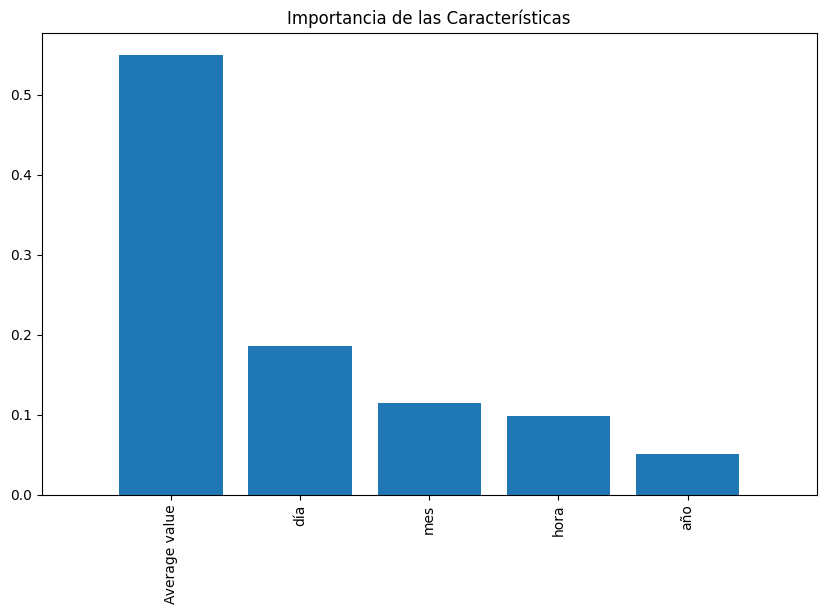

In [ ]:
# Analizar la importancia de las características: Otra práctica útil es examinar la importancia de las características
# en el modelo para entender: cuáles son las variables que más influyen en las predicciones.

import matplotlib.pyplot as plt
import numpy as np

# Obtener la importancia de las características
importancia = rf_optimized_model1.feature_importances_

# Ordenar las características por importancia
indices = np.argsort(importancia)[::-1]

# Graficar la importancia de las características
plt.figure(figsize=(10, 6))
plt.title("Importancia de las Características")
plt.bar(range(X_train_model1.shape[1]), importancia[indices], align="center")
plt.xticks(range(X_train_model1.shape[1]), X_train_model1.columns[indices], rotation=90)
plt.xlim([-1, X_train_model1.shape[1]])
plt.show()

In [ ]:
# Buscamos Valor Real del promedio de SO2 por año en la estacioón 205 a fin de sustituirlo en el mejor mofelo optenido

# 1. Filtrar por estación 205 y SO2
df_filtrado_m1 = df_instrument[
    (df_instrument['Station code'] == 205) &
    (df_instrument['Item'] == 'SO2')
].copy()

# 2. Asegurarse de que la columna de fecha sea datetime
df_filtrado_m1['Measurement date'] = pd.to_datetime(df_filtrado_m1['Measurement date'])

# 3. Crear columnas de año y mes
df_filtrado_m1['año'] = df_filtrado_m1['Measurement date'].dt.year
df_filtrado_m1['mes'] = df_filtrado_m1['Measurement date'].dt.month

# 4. Calcular promedio mensual del contaminante SO2
promedios_mensuales = df_filtrado_m1.groupby(['año', 'mes'])['Average value'].mean().reset_index()

# vemos resultados
print(promedios_mensuales)


# Valor promedio en octubre 2023 para la estación 205:

promedio_octubre_2023_205 = df_instrument[
    (df_instrument['Station code'] == 205) &
    (df_instrument['Item'] == 'SO2') &
    (df_instrument['año'] == 2023) &
    (df_instrument['mes'] == 10)
]['Average value'].mean()

print(f"Promedio de SO2 en Octubre 2023 para estación 205: {promedio_octubre_2023_205:.6f}")

     año  mes  Average value
0   2021    1       0.004415
1   2021    2       0.002914
2   2021    3       0.004731
3   2021    4       0.004200
4   2021    5       0.003172
5   2021    6       0.004000
6   2021    7       0.002906
7   2021    8       0.001633
8   2021    9       0.003410
9   2021   10       0.002937
10  2021   11       0.003790
11  2021   12       0.003055
12  2022    1       0.001758
13  2022    2       0.004396
14  2022    3       0.003770
15  2022    4       0.003512
16  2022    5       0.003027
17  2022    6       0.003412
18  2022    7       0.003386
19  2022    8       0.002964
20  2022    9       0.002499
21  2022   10       0.000151
22  2022   11       0.003672
23  2022   12       0.003901
24  2023    1       0.004580
25  2023    2       0.003954
26  2023    3       0.003935
27  2023    4       0.003110
28  2023    5       0.004456
29  2023    6       0.002933
30  2023    7       0.002657
31  2023    8       0.002729
32  2023    9       0.002791
33  2023   10 

In [ ]:
import pandas as pd

# Crear rango de fechas por hora para noviembre 2023
fechas_noviembre = pd.date_range(start="2023-11-01", end="2023-11-30 23:00:00", freq="H")

# Crear DataFrame base que contrendrá: fechas_noviembre,205 y SO2
df_noviembre_2023 = pd.DataFrame({
    'Measurement date': fechas_noviembre,
    'Station code': 205,
    'Item': 'SO2',
})

# Añadimos al df_noviembre_2023, las columnas: año, mes, día y hora
df_noviembre_2023['año'] = df_noviembre_2023['Measurement date'].dt.year
df_noviembre_2023['mes'] = df_noviembre_2023['Measurement date'].dt.month
df_noviembre_2023['día'] = df_noviembre_2023['Measurement date'].dt.day
df_noviembre_2023['hora'] = df_noviembre_2023['Measurement date'].dt.hour

# Crea y agreaga una nueva columna llamada ('Average value') y le pone elmismo valor a cada fila del df_noviembre-2023
# El valor es promedio_octubre_2023_209, que ya habíamos calculado antes como el promedio de SO2 en octubre 2023.
# Como no tenemos datos reales de noviembre, usamos ese valor como referencia para predecir el estado del instrumento.

df_noviembre_2023['Average value'] = promedio_octubre_2023_205

# ver resultados
df_noviembre_2023.head()

# Extrae las columnas que el modelo necesita para hacer predicciones.
# Seleccionamos las columnas que usamos para entrenar el modelo:

X_noviembre_model1 = df_noviembre_2023[['año', 'mes', 'día', 'hora', 'Average value']]

# Cargamos el modelo optimizado

import joblib

# Cargar el modelo optimizado
rf_optimized_model1 = joblib.load("modelo_rf_SO2_205.pkl")

# Realizar las predicciones;
# Le pasa los datos de noviembre (X_noviembre_model1) al modelo, y este predice el estado del instrumento para cada hora.
predicciones_noviembre_2023 = rf_optimized_model1.predict(X_noviembre_model1)

# Agregar las predicciones al DataFrame
# crea y agrega al DataFrame original una nueva columna llamada 'Instrument status predicho' y coloca c/u de los valores
# predichos

df_noviembre_2023['Instrument status predicho'] = predicciones_noviembre_2023


# Hacer predicciones con el modelo
df_noviembre_2023['Instrument status predicho'] = rf_optimized_model1.predict(X_noviembre_model1)

# ver el resultado de las predicciones
df_noviembre_2023.head(30)

<ipython-input-83-41cf37c391b3>:4: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fechas_noviembre = pd.date_range(start="2023-11-01", end="2023-11-30 23:00:00", freq="H")


,Measurement date,Station code,Item,año,mes,día,hora,Average value,Instrument status predicho
0,2023-11-01 00:00:00,205,SO2,2023,11,1,0,0.002891,0
1,2023-11-01 01:00:00,205,SO2,2023,11,1,1,0.002891,0
2,2023-11-01 02:00:00,205,SO2,2023,11,1,2,0.002891,0
3,2023-11-01 03:00:00,205,SO2,2023,11,1,3,0.002891,0
4,2023-11-01 04:00:00,205,SO2,2023,11,1,4,0.002891,0
5,2023-11-01 05:00:00,205,SO2,2023,11,1,5,0.002891,0
6,2023-11-01 06:00:00,205,SO2,2023,11,1,6,0.002891,0
7,2023-11-01 07:00:00,205,SO2,2023,11,1,7,0.002891,0
8,2023-11-01 08:00:00,205,SO2,2023,11,1,8,0.002891,0
9,2023-11-01 09:00:00,205,SO2,2023,11,1,9,0.002891,0


# Tarea Nº 3: Modelo 2 Clasificación:
Station code: 209 | pollutant: NO2 | Period: 2023-09-01 00:00:00 - 2023-09-30 23:00:00

In [ ]:
# PASO 1: Explorar el rango real de fechas disponibles;
# Queremos conocer el rango de fechas que sí existen en df_instrument para: Station code == 209 y Item == 'NO2'
# Código para descubrir ese rango:

# Filtrar solo los datos de la estación 209 y contaminante NO2
df_model2 = df_instrument[
    (df_instrument['Station code'] == 209) &
    (df_instrument['Item'] == 'NO2')
]

# Ver el rango de fechas disponibles
fecha_inicio_m2 = df_model2['datetime'].min()
fecha_fin_m2 = df_model2['datetime'].max()

print(f"Rango de fechas disponibles para el Modelo 2: estación 209 y contaminante NO2:")
print(f"   Desde: {fecha_inicio_m2}")
print(f"   Hasta: {fecha_fin_m2}")

# Tamaño total del subconjunto
print(f" Número de registros disponibles: {df_model2.shape[0]}")

# ver primeros registros
df_model2.head()

Rango de fechas disponibles para el Modelo 2: estación 209 y contaminante NO2:
   Desde: 2021-01-01 00:00:00
   Hasta: 2023-08-31 23:00:00
 Número de registros disponibles: 23057


,Measurement date,Station code,Item code,Average value,Instrument status,Item,Status,año,mes,día,hora,Temporada del Año,Level pollution,datetime
742423,2021-01-01 00:00:00,209,2,0.066,0,NO2,Normal,2021,1,1,0,invierno,Bad,2021-01-01 00:00:00
742429,2021-01-01 01:00:00,209,2,0.064,0,NO2,Normal,2021,1,1,1,invierno,Bad,2021-01-01 01:00:00
742435,2021-01-01 02:00:00,209,2,0.063,0,NO2,Normal,2021,1,1,2,invierno,Bad,2021-01-01 02:00:00
742441,2021-01-01 03:00:00,209,2,0.058,0,NO2,Normal,2021,1,1,3,invierno,Normal,2021-01-01 03:00:00
742447,2021-01-01 04:00:00,209,2,0.055,0,NO2,Normal,2021,1,1,4,invierno,Normal,2021-01-01 04:00:00


In [ ]:
df_model2.drop(columns=["datetime"], inplace=True)
df_model2.head()

<ipython-input-95-671db21b0035>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model2.drop(columns=["datetime"], inplace=True)


,Measurement date,Station code,Item code,Average value,Instrument status,Item,Status,año,mes,día,hora,Temporada del Año,Level pollution
742423,2021-01-01 00:00:00,209,2,0.066,0,NO2,Normal,2021,1,1,0,invierno,Bad
742429,2021-01-01 01:00:00,209,2,0.064,0,NO2,Normal,2021,1,1,1,invierno,Bad
742435,2021-01-01 02:00:00,209,2,0.063,0,NO2,Normal,2021,1,1,2,invierno,Bad
742441,2021-01-01 03:00:00,209,2,0.058,0,NO2,Normal,2021,1,1,3,invierno,Normal
742447,2021-01-01 04:00:00,209,2,0.055,0,NO2,Normal,2021,1,1,4,invierno,Normal


In [ ]:
# últimos registros
df_model2.tail()

,Measurement date,Station code,Item code,Average value,Instrument status,Item,Status,año,mes,día,hora,Temporada del Año,Level pollution
880737,2023-08-31 19:00:00,209,2,0.017,0,NO2,Normal,2023,8,31,19,verano,Good
880742,2023-08-31 20:00:00,209,2,0.017,0,NO2,Normal,2023,8,31,20,verano,Good
880749,2023-08-31 21:00:00,209,2,0.018,0,NO2,Normal,2023,8,31,21,verano,Good
880755,2023-08-31 22:00:00,209,2,0.015,0,NO2,Normal,2023,8,31,22,verano,Good
880759,2023-08-31 23:00:00,209,2,0.017,0,NO2,Normal,2023,8,31,23,verano,Good


In [ ]:
# tamaño del dataframe
df_model2.shape

(23057, 13)

In [ ]:
# Seleccionar variables para el modelo
# Variables predictoras
X_model2 = df_model2[['Average value', 'año', 'mes', 'día', 'hora']]

# Variable objetivo
y_model2 = df_model2['Instrument status']

# Confirmar tamaños
print("Tamaño de X_model2:", X_model2.shape)
print("Tamaño de y_model2:", y_model2.shape)

print("Tipos de X:")
print(X_model2.dtypes)
print("Valores únicos en y:", y_model1.unique())

# Mostramos una muestra
X_model2.head()

Tamaño de X_model2: (23057, 5)
Tamaño de y_model2: (23057,)
Tipos de X:
Average value    float64
año                int32
mes                int32
día                int32
hora               int32
dtype: object
Valores únicos en y: [0 1 9 4]


,Average value,año,mes,día,hora
742423,0.066,2021,1,1,0
742429,0.064,2021,1,1,1
742435,0.063,2021,1,1,2
742441,0.058,2021,1,1,3
742447,0.055,2021,1,1,4


In [ ]:
# Codificación de la variable objetivo: Instrument status => variable objetivo tipo categórica,
# Veamos el Nº de clases existententes y cómo están representadas <=> Valores únicos de la variable objetivo

# valores únicos de la variable objetivo
print(y_model2.unique())

[0 1 8 4 9 2]


como y_model2 contiene más de dos clases (0, 1, 2, 4, 8, 9), estamos ante un problema de clasificación multiclase, no binaria. En ese caso, sí es correcto y necesario codificar la variable objetivo, aunque ya esté en números, porque esos valores probablemente representan categorías y no cantidades continuas. Aunque los valores [0, 1, 2, 4, 8, 9] son numéricos, no significa que el modelo los interprete correctamente como etiquetas categóricas.
Por ejemplo, sin codificación, el modelo podría pensar que el 8 es "peor" que el 2, cuando en realidad podrían ser solo códigos de estados sin orden lógico.

In [ ]:
# códificación de la variable objetivo y_model2
# Importar el codificador
from sklearn.preprocessing import LabelEncoder

# Crear una instancia del codificador
le_model2 = LabelEncoder()

# Aplicar el codificador sobre la variable objetivo y_model2
# Esto convierte los valores originales (como 0, 1, 2, 4, 8, 9) a una secuencia de índices consecutivos
y_model2_encoded = le_model2.fit_transform(y_model2)

# Mostrar las clases originales codificadas
print("Clases originales codificadas:", le_model2.classes_)

# Verificamos el resultado
print("Valores únicos después de codificación:", np.unique(y_model2_encoded))

# # Invertir codificación si quieres ver las clases originales
# originales = le_model2.inverse_transform([0, 1, 2])  # ejemplo
# print(originales)

Clases originales codificadas: [0 1 2 4 8 9]
Valores únicos después de codificación: [0 1 2 3 4 5]


Siguiente paso: Separar datos en conjunto de entrenamiento y prueba
Ahora vamos a dividir el dataset en:

* Conjunto de entrenamiento: para entrenar el modelo
* Conjunto de prueba: para evaluar qué tan bien funciona el modelo con datos nuevos

Criterio a seguir (igual al modelo 1 para mantener coherencia):

* 80% de los datos para entrenamiento
* 20% para prueba
* Fijar la semilla aleatoria (random_state=42) para reproducibilidad
* Solo usamos las variables ya definidas (X_model2 y y_model2_encoded)

In [ ]:
# Código de separación de los datos en conjunto de entrenamiento y prueba:
from sklearn.model_selection import train_test_split

# Dividir datos
X_train_model2, X_test_model2, y_train_model2, y_test_model2 = train_test_split(
    X_model2,
    y_model2_encoded,
    test_size=0.2,
    random_state=42
)  # Aquí es donde y_model2_encoded entra en acción: y_train_model2 y y_test_model2 son subconjuntos de y_model2_encoded,
# por lo tanto ya están codificados.

# Confirmar tamaños y formas de los subconjuntos de prueba y entrenamiento
print("Tamaño del conjunto de entrenamiento:", X_train_model2.shape)
print("Tamaño del conjunto de prueba:", X_test_model2.shape)
print("Tamaño de las etiquetas de entrenamiento:", y_train_model2.shape)
print("Tamaño de las etiquetas de prueba:", y_test_model2.shape)

Tamaño del conjunto de entrenamiento: (18445, 5)
Tamaño del conjunto de prueba: (4612, 5)
Tamaño de las etiquetas de entrenamiento: (18445,)
Tamaño de las etiquetas de prueba: (4612,)


In [ ]:
# Entrenar y comparar varios modelos de clasificación
# Objetivo: Comparar el rendimiento de varios modelos clásicos para elegir el mejor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score

# Diccionario para guardar métricas
resultados_acc_m2 = {}
resultados_f1_m2 = {}
modelos2_entrenados = {}

# Diccionario de modelos
model2 = {
    "Regresión Logística": LogisticRegression(max_iter=1000),
    "Árbol de Decisión": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier()
}

# Entrenar y evaluar cada modelo
for nombre, modelo in model2.items():
    modelo.fit(X_train_model2, y_train_model2)
    y_pred = modelo.predict(X_test_model2)

    acc = accuracy_score(y_test_model2, y_pred)
    f1 = f1_score(y_test_model2, y_pred, average='macro')

    print(f"\nModelo: {nombre}")
    print(f"Accuracy: {acc:.4f}")
    print(f"F1-score (macro): {f1:.4f}")
    print("Classification Report:")
    print(classification_report(y_test_model2, y_pred))

    resultados_acc_m2[nombre] = acc
    resultados_f1_m2[nombre] = f1
    modelos2_entrenados[nombre] = modelo  # Guardamos cada modelo entrenado

# entrenamos varios modelos (Regresión Logística, Árbol, RF, SVM, KNN)
# cálculamos Accuracy y F1 Score para todos los modelos
# Seleccionamos el mejor modelo según F1 Score

# Seleccionar y guardar el mejor modelo según F1 Score

mejor_modelo_nombre = max(resultados_f1_m2, key=resultados_f1_m2.get) # aquí es donde dio como resultado. Random Forest
mejor_modelo2_base = modelos2_entrenados[mejor_modelo_nombre]     # Este es el objeto del modelo ya entrenado

# seleccionar y guardar el mejor modelo según Accuracy:
mejor_modelo_nombre_acc = max(resultados_acc_m2, key=resultados_acc_m2.get)
mejor_modelo_base_acc = modelos2_entrenados[mejor_modelo_nombre_acc]

print(f"\nMejor modelo por F1 Score: {mejor_modelo_nombre} ({resultados_f1_m2[mejor_modelo_nombre]:.4f})")
print(f"Mejor modelo por Accuracy: {mejor_modelo_nombre_acc} ({resultados_acc_m2[mejor_modelo_nombre_acc]:.4f})")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre


Modelo: Regresión Logística
Accuracy: 0.9807
F1-score (macro): 0.1650
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      4523
           1       0.00      0.00      0.00        58
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00        12
           4       0.00      0.00      0.00        10
           5       0.00      0.00      0.00         8

    accuracy                           0.98      4612
   macro avg       0.16      0.17      0.17      4612
weighted avg       0.96      0.98      0.97      4612


Modelo: Árbol de Decisión
Accuracy: 0.9902
F1-score (macro): 0.8283
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      4523
           1       0.65      0.67      0.66        58
           2       0.50      1.00      0.67         1
           3       0.86      1.00      0.92        12


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Modelo: KNN
Accuracy: 0.9872
F1-score (macro): 0.4931
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4523
           1       0.94      0.28      0.43        58
           2       0.00      0.00      0.00         1
           3       1.00      0.92      0.96        12
           4       1.00      0.10      0.18        10
           5       1.00      0.25      0.40         8

    accuracy                           0.99      4612
   macro avg       0.82      0.42      0.49      4612
weighted avg       0.99      0.99      0.98      4612


Mejor modelo por F1 Score: Random Forest (0.8754)
Mejor modelo por Accuracy: Random Forest (0.9948)


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Verificamos el resultado del paso anterior predicción el modelo ganador
# Predecir con el modelo Random Forest Base y calcular métricas
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Predecir con el modelo base (el mejor de los modelos iniciales)
y_pred_base_model2 = mejor_modelo2_base.predict(X_test_model2)

# Calcular métricas del modelo base
accuracy_base_model2 = accuracy_score(y_test_model2, y_pred_base_model2)
f1_base_model2 = f1_score(y_test_model2, y_pred_base_model2, average='macro')

# Mostrar resultados del modelo base
print("Modelo Base (mejor según F1 Score):", mejor_modelo_nombre)
print("Accuracy:", accuracy_base_model2)
print("F1 Score (macro):", f1_base_model2)
print("\nClassification Report:")
print(classification_report(y_test_model2, y_pred_base_model2))

Modelo Base (mejor según F1 Score): Random Forest
Accuracy: 0.99479618386817
F1 Score (macro): 0.8753577380092379

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4523
           1       0.97      0.66      0.78        58
           2       0.50      1.00      0.67         1
           3       1.00      1.00      1.00        12
           4       1.00      0.90      0.95        10
           5       1.00      0.75      0.86         8

    accuracy                           0.99      4612
   macro avg       0.91      0.88      0.88      4612
weighted avg       0.99      0.99      0.99      4612



Ahora, vamos a aplicar GridSearchCV al modelo base de Random Forest para ver si podemos mejorar su rendimiento ajustando algunos hiperparámetros, por ejemplo:


*   el número de árboles (n_estimators)
*   la profundidad máxima de los árboles (max_depth)
*   Entre otros hiperparámetros
Esto nos dará una versión optimizada del modelo de Random Forest.

Posteriormente, Compararemos el modelo base con el optimizado: Una vez tengamos el modelo optimizado, lo evaluaremos utilizando las mismas métricas (Accuracy y F1 score) y compararemos ambos modelos para ver si hubo alguna mejora.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Definir el modelo base de Random Forest
rf_base_model2 = RandomForestClassifier(random_state=42)

# Definir los parámetros para GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],  # Número de árboles
    'max_depth': [10, 20, 30],         # Profundidad máxima de los árboles
    'min_samples_split': [2, 5],       # Número mínimo de muestras para dividir un nodo
    'min_samples_leaf': [1, 2],        # Número mínimo de muestras en una hoja
    'bootstrap': [True, False]         # Usar bootstrap o no
}

# Aplicar GridSearchCV
grid_search = GridSearchCV(estimator=rf_base_model2, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2)

# Ajustar el modelo con los datos de entrenamiento
grid_search.fit(X_train_model2, y_train_model2)

# Mostrar los mejores parámetros encontrados
print(f"Mejores parámetros encontrados por GridSearchCV: {grid_search.best_params_}")

# Obtener el mejor modelo optimizado
rf_optimized_model2 = grid_search.best_estimator_

# Realizar predicciones con el modelo optimizado
y_pred_optimized_model2 = rf_optimized_model2.predict(X_test_model2)

# Calcular las métricas de evaluación: Accuracy y F1 Score
accuracy_optimized_model2 = accuracy_score(y_test_model2, y_pred_optimized_model2)
f1_optimized_model2 = f1_score(y_test_model2, y_pred_optimized_model2, average='macro')

# Mostrar resultados
print("\nModelo Random Forest Optimizado con GridSearchCV")
print("Accuracy (Optimizado):", accuracy_optimized_model2)
print("F1 Score (Optimizado):", f1_optimized_model2)
print("\nClassification Report (Optimizado):")
print(classification_report(y_test_model2, y_pred_optimized_model2))

Fitting 3 folds for each of 72 candidates, totalling 216 fits
Mejores parámetros encontrados por GridSearchCV: {'bootstrap': False, 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}

Modelo Random Forest Optimizado con GridSearchCV
Accuracy (Optimizado): 0.9941457068516912
F1 Score (Optimizado): 0.8228064224578375

Classification Report (Optimizado):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4523
           1       0.95      0.64      0.76        58
           2       0.33      1.00      0.50         1
           3       0.92      1.00      0.96        12
           4       1.00      0.90      0.95        10
           5       1.00      0.62      0.77         8

    accuracy                           0.99      4612
   macro avg       0.87      0.86      0.82      4612
weighted avg       0.99      0.99      0.99      4612



In [ ]:
# Comparar Random Forest Base vs. Optimizado; Resumen de métricas obtenidas
# Comparación de modelos base y optimizado
print("========== COMPARACIÓN DE MODELOS ==========")
print(f"Random Forest Base - Accuracy: {accuracy_base_model2:.4f}, F1 Score: {f1_base_model2:.4f}")
print(f"Random Forest Optimizado - Accuracy: {accuracy_optimized_model2:.4f}, F1 Score: {f1_optimized_model2:.4f}")

========== COMPARACIÓN DE MODELOS ==========
Random Forest Base - Accuracy: 0.9948, F1 Score: 0.8754
Random Forest Optimizado - Accuracy: 0.9941, F1 Score: 0.8228


In [ ]:
# Guardamos el mejor modelo base
import joblib

# Guardar el modelo base en un archivo
joblib.dump(mejor_modelo2_base, 'random_forest_base_model2.pkl') # crea un archivo llamado random_forest_base_model.pkl

print("Modelo base guardado correctamente.")

Modelo base guardado correctamente.


In [ ]:
# cargar el mejor modelo base y realizar predicciones
# cargar el mejor modelo base desde el archivo
loaded_model2_base = joblib.load('random_forest_base_model2.pkl')

# Realizar predicciones con el modelo cargado
y_pred_loaded_model_base = loaded_model2_base.predict(X_test_model2)

# calcular metricas y evaluar
accuracy_loaded_model_base = accuracy_score(y_test_model2, y_pred_loaded_model_base)
f1_loaded_model_base = f1_score(y_test_model2, y_pred_loaded_model_base, average='macro')

# mostramos resultados
print("===== MODELO CARGADO BASE =====")
print("Accuracy:", accuracy_loaded_model_base)
print("F1 Score (weighted):", f1_loaded_model_base)

===== MODELO CARGADO BASE =====
Accuracy: 0.99479618386817
F1 Score (weighted): 0.8753577380092379


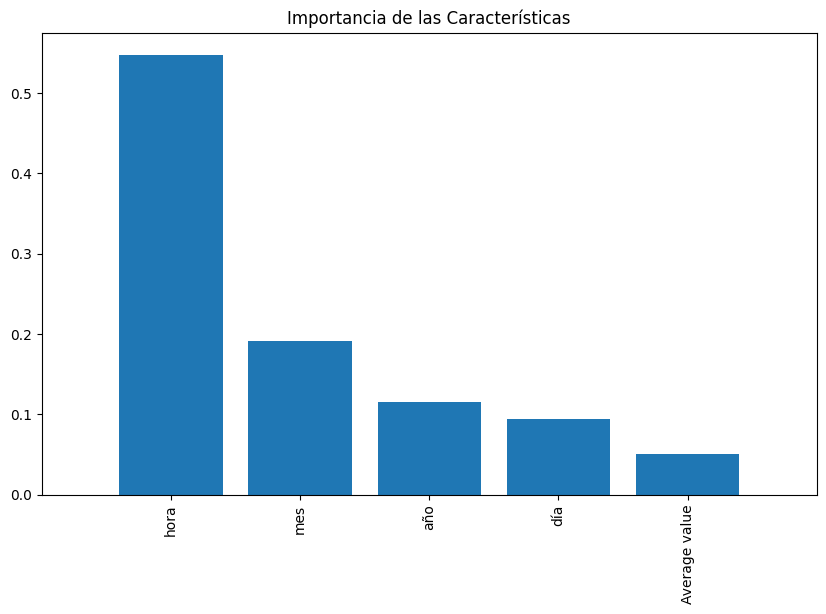

In [ ]:
# Analizar la importancia de las características: Otra práctica útil es examinar la importancia de las características en el modelo para entender:
# cuáles son las variables que más influyen en las predicciones.
import matplotlib.pyplot as plt
import numpy as np

# Obtener la importancia de las características
importancia = mejor_modelo_base.feature_importances_

# Ordenar las características por importancia
indices = np.argsort(importancia)[::-1]

# Graficar la importancia de las características
plt.figure(figsize=(10, 6))
plt.title("Importancia de las Características")
plt.bar(range(X_train_model2.shape[1]), importancia[indices], align="center")
plt.xticks(range(X_train_model2.shape[1]), X_train_model2.columns[indices], rotation=90)
plt.xlim([-1, X_train_model2.shape[1]])
plt.show()

In [ ]:
# Guardamos el modelo optimizado para efectuar comparaciones
import joblib

# Guardar el modelo optimizado en un archivo
joblib.dump(rf_optimized_model2, 'random_forest_optimized_model.pkl') # crea un archivo llamado random_forest_optimized_model.pkl

print("Modelo optimizado guardado correctamente.")

Modelo optimizado guardado correctamente.


In [ ]:
 # Cargar el modelo guardado y realizar predicciones
 # Cargar el modelo optimizado desde el archivo
loaded_model_optimized = joblib.load('random_forest_optimized_model.pkl')

# Realizar predicciones con el modelo cargado
y_pred_loaded_model_optimized = loaded_model_optimized.predict(X_test_model2)

# Calcular métricas de evaluación
accuracy_loaded_model_optimized = accuracy_score(y_test_model2, y_pred_loaded_model_optimized)
f1_loaded_model_optimized = f1_score(y_test_model2, y_pred_loaded_model_optimized, average='macro')

# Mostrar resultados
print("===== MODELO CARGADO OPTIMIZED=====")
print("Accuracy:", accuracy_loaded_model_optimized)
print("F1 Score (weighted):", f1_loaded_model_optimized)
print("\nClassification Report:")
print(classification_report(y_test_model2, y_pred_loaded_model_optimized))

===== MODELO CARGADO OPTIMIZED=====
Accuracy: 0.9941457068516912
F1 Score (weighted): 0.8228064224578375

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4523
           1       0.95      0.64      0.76        58
           2       0.33      1.00      0.50         1
           3       0.92      1.00      0.96        12
           4       1.00      0.90      0.95        10
           5       1.00      0.62      0.77         8

    accuracy                           0.99      4612
   macro avg       0.87      0.86      0.82      4612
weighted avg       0.99      0.99      0.99      4612



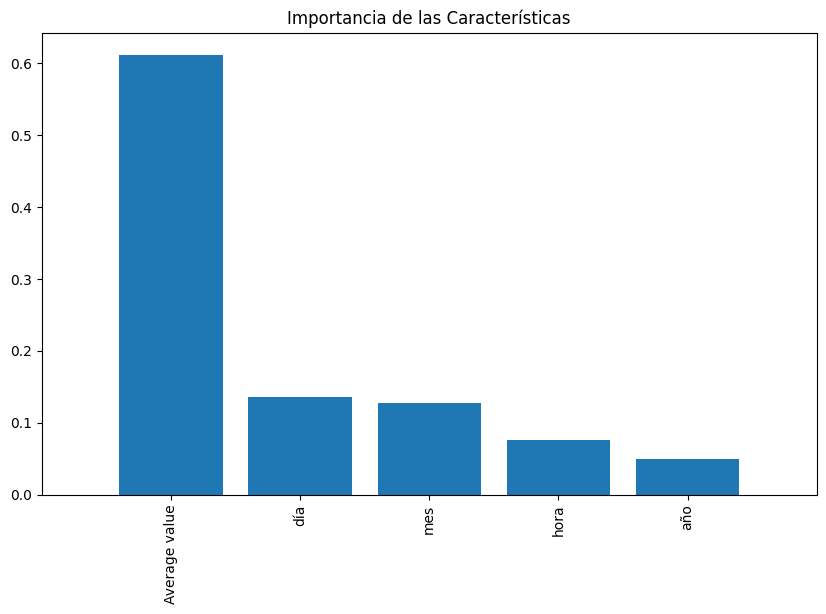

In [ ]:
# Analizar la importancia de las características: Otra práctica útil es examinar la importancia de las características en el modelo para entender:
# cuáles son las variables que más influyen en las predicciones.
import matplotlib.pyplot as plt
import numpy as np

# Obtener la importancia de las características
importancia = rf_optimized_model2.feature_importances_

# Ordenar las características por importancia
indices = np.argsort(importancia)[::-1]

# Graficar la importancia de las características
plt.figure(figsize=(10, 6))
plt.title("Importancia de las Características")
plt.bar(range(X_train_model2.shape[1]), importancia[indices], align="center")
plt.xticks(range(X_train_model2.shape[1]), X_train_model2.columns[indices], rotation=90)
plt.xlim([-1, X_train_model2.shape[1]])
plt.show()

Estimación modelo 2:
Station code: 209 | pollutant: NO2 | Period: 2023-09-01 00:00:00 - 2023-09-30 23:00:00

1. Necesitamos calcular un promedio estimado realista de Average value (NO2)
Tal como lo hicimos con SO2 en el modelo 1 (usamos 0.002793), ahora vamos a:

Filtrar df_instrument por estación 209, contaminante 'NO2', y usar datos anteriores a septiembre 2023

Calcular el promedio de Average value en agosto 2023, por ejemplo, y usar ese número como referencia para septiembre

In [ ]:
# calcular un promedio estimado realista de Average value (NO2)
import pandas as pd
import numpy as np
import joblib

# Paso 1: Filtrar df_instrument por estación 209, contaminante NO2, agosto 2023
df_filtrado_m2 = df_instrument[
    (df_instrument['Station code'] == 209) &
    (df_instrument['Item'] == 'NO2')
].copy()

# Asegurar que la fecha esté en formato datetime
df_filtrado_m2['Measurement date'] = pd.to_datetime(df_filtrado_m2['Measurement date'])

# Crear columnas de año, mes
df_filtrado_m2['año'] = df_filtrado_m2['Measurement date'].dt.year
df_filtrado_m2['mes'] = df_filtrado_m2['Measurement date'].dt.month

promedios_mensuales_m2 = df_filtrado_m2.groupby(['año', 'mes'])['Average value'].mean().reset_index()

# veamos los resultados
print(promedios_mensuales_m2)

# Valor promedio No2 en agosto 2023 para la estación 209

promedio_agosto_2023_209 = df_filtrado_m2 [
    (df_filtrado_m2['Station code'] == 209) &
    (df_filtrado_m2['Item'] == 'NO2') &
    (df_filtrado_m2['año'] == 2023) &
    (df_filtrado_m2['mes'] == 8)]['Average value'].mean()

print(f"Promedio de NO2 en agosto 2023 para estación 209: {promedio_agosto_2023_209:.6f}")

     año  mes  Average value
0   2021    1       0.039382
1   2021    2       0.039503
2   2021    3       0.040300
3   2021    4       0.029808
4   2021    5       0.025903
5   2021    6       0.022793
6   2021    7       0.022273
7   2021    8       0.021199
8   2021    9       0.025054
9   2021   10       0.026577
10  2021   11       0.032637
11  2021   12       0.036828
12  2022    1       0.035414
13  2022    2       0.033393
14  2022    3       0.028091
15  2022    4       0.026797
16  2022    5       0.021762
17  2022    6       0.021431
18  2022    7      -0.046344
19  2022    8       0.011870
20  2022    9       0.016653
21  2022   10       0.027964
22  2022   11       0.035644
23  2022   12       0.028551
24  2023    1       0.029711
25  2023    2       0.038501
26  2023    3       0.030220
27  2023    4       0.024584
28  2023    5       0.023191
29  2023    6       0.008146
30  2023    7       0.013580
31  2023    8       0.013826
Promedio de NO2 en agosto 2023 para estació

In [ ]:
import pandas as pd

# Crear rango horario para septiembre 2023
fechas_septiembre = pd.date_range(start='2023-09-01 00:00:00', end='2023-09-30 23:00:00', freq='h')

# Creaamos DataFrame base que contrendrá: fechas_septiembre,209 y NO2
df_septiembre_2023 = pd.DataFrame({
    'Measurement date': fechas_septiembre,
    'Station code': 209,
    'Item': 'NO2',
})

# Añadimos al df_septiembre_2023, las columnas: año, mes, día y hora
df_septiembre_2023['año'] = df_septiembre_2023['Measurement date'].dt.year
df_septiembre_2023['mes'] = df_septiembre_2023['Measurement date'].dt.month
df_septiembre_2023['día'] = df_septiembre_2023['Measurement date'].dt.day
df_septiembre_2023['hora'] = df_septiembre_2023['Measurement date'].dt.hour

# Crea y agreaga una nueva columna llamada ('Average value') y le pone elmismo valor a cada fila del df_noviembre-2023
# El valor es promedio_octubre_2023_209, que ya habíamos calculado antes como el promedio de SO2 en octubre 2023.
# Como no tenemos datos reales de noviembre, usamos ese valor como referencia para predecir el estado del instrumento.

df_septiembre_2023['Average value'] = promedio_agosto_2023_209

# Extrae las columnas que el modelo necesita para hacer predicciones.
# Seleccionamos las columnas que usamos para entrenar el modelo:

X_septiembre_model2 = df_septiembre_2023[['Average value','año', 'mes', 'día', 'hora']]

print(X_septiembre_model2.columns.tolist())

# Cargamos el mejor modelo

import joblib

mejor_modelo2_base = joblib.load("random_forest_base_model2.pkl")

# Realizar las predicciones;
# Le pasa los datos de noviembre (X_septiembre_model2) al modelo, y este predice el estado del instrumento para cada hora.
predicciones_septiembre_2023 = mejor_modelo2_base.predict(X_septiembre_model2)

# Agregar las predicciones al DataFrame
# crea y agrega al DataFrame original una nueva columna llamada 'Instrument status predicho' y coloca c/u de los valores
# predichos

df_septiembre_2023['Instrument status predicho'] = predicciones_septiembre_2023

# Hacer predicciones con el modelo
df_septiembre_2023['Instrument status predicho'] = mejor_modelo2_base.predict(X_septiembre_model2)

# ver el resultado de las predicciones
df_septiembre_2023.head(30)

['Average value', 'año', 'mes', 'día', 'hora']


,Measurement date,Station code,Item,año,mes,día,hora,Average value,Instrument status predicho
0,2023-09-01 00:00:00,209,NO2,2023,9,1,0,0.013826,0
1,2023-09-01 01:00:00,209,NO2,2023,9,1,1,0.013826,0
2,2023-09-01 02:00:00,209,NO2,2023,9,1,2,0.013826,0
3,2023-09-01 03:00:00,209,NO2,2023,9,1,3,0.013826,0
4,2023-09-01 04:00:00,209,NO2,2023,9,1,4,0.013826,0
5,2023-09-01 05:00:00,209,NO2,2023,9,1,5,0.013826,0
6,2023-09-01 06:00:00,209,NO2,2023,9,1,6,0.013826,0
7,2023-09-01 07:00:00,209,NO2,2023,9,1,7,0.013826,0
8,2023-09-01 08:00:00,209,NO2,2023,9,1,8,0.013826,0
9,2023-09-01 09:00:00,209,NO2,2023,9,1,9,0.013826,0


# Tarea Nº 3 : Modelos de Clasificación : Detección de fallas de medición

Modelo 3

Estación: 223

Contaminante: O3

Periodo: del 1 al 31 de julio de 2023

In [ ]:
# Aplicar el filtro de datos según la estación y contaminante a predecir

df_model3 = df_instrument[
    (df_instrument['Station code'] == 223) &
    (df_instrument['Item'] == 'O3')
].copy()


# ver rango de fechas disponibles:
fecha_inicio_m3 = df_model3['Measurement date'].min()
fecha_fin_m3 = df_model3['Measurement date'].max()

print(f"Rango de fechas disponibles para el Modelo 3: estación 223 y contaminante O3:")
print(f"   Desde: {fecha_inicio_m3}")
print(f"   Hasta: {fecha_fin_m3}")

# Total de registros del df_model3
print(f" Número de registros disponibles: {df_model3.shape[0]}")

# mostrar los primero registros:
df_model3.head()

Rango de fechas disponibles para el Modelo 3: estación 223 y contaminante O3:
   Desde: 2021-01-01 00:00:00
   Hasta: 2023-06-30 23:00:00
 Número de registros disponibles: 21593


,Measurement date,Station code,Item code,Average value,Instrument status,Item,Status,año,mes,día,hora,Temporada del Año,Level pollution,datetime
2849169,2021-01-01 00:00:00,223,5,0.002,0,O3,Normal,2021,1,1,0,invierno,Good,2021-01-01 00:00:00
2849175,2021-01-01 01:00:00,223,5,0.003,0,O3,Normal,2021,1,1,1,invierno,Good,2021-01-01 01:00:00
2849181,2021-01-01 02:00:00,223,5,0.002,0,O3,Normal,2021,1,1,2,invierno,Good,2021-01-01 02:00:00
2849187,2021-01-01 03:00:00,223,5,0.003,0,O3,Normal,2021,1,1,3,invierno,Good,2021-01-01 03:00:00
2849193,2021-01-01 04:00:00,223,5,0.003,0,O3,Normal,2021,1,1,4,invierno,Good,2021-01-01 04:00:00


In [ ]:
# eliminamos la columna datetime
df_model3.drop(columns=['datetime'], inplace=True)

In [ ]:
# primeros registros
df_model3.head()

,Measurement date,Station code,Item code,Average value,Instrument status,Item,Status,año,mes,día,hora,Temporada del Año,Level pollution
2849169,2021-01-01 00:00:00,223,5,0.002,0,O3,Normal,2021,1,1,0,invierno,Good
2849175,2021-01-01 01:00:00,223,5,0.003,0,O3,Normal,2021,1,1,1,invierno,Good
2849181,2021-01-01 02:00:00,223,5,0.002,0,O3,Normal,2021,1,1,2,invierno,Good
2849187,2021-01-01 03:00:00,223,5,0.003,0,O3,Normal,2021,1,1,3,invierno,Good
2849193,2021-01-01 04:00:00,223,5,0.003,0,O3,Normal,2021,1,1,4,invierno,Good


In [ ]:
# ultimos registros
df_model3.tail()

,Measurement date,Station code,Item code,Average value,Instrument status,Item,Status,año,mes,día,hora,Temporada del Año,Level pollution
2978695,2023-06-30 19:00:00,223,5,0.035,0,O3,Normal,2023,6,30,19,verano,Normal
2978700,2023-06-30 20:00:00,223,5,0.036,0,O3,Normal,2023,6,30,20,verano,Normal
2978708,2023-06-30 21:00:00,223,5,0.039,0,O3,Normal,2023,6,30,21,verano,Normal
2978714,2023-06-30 22:00:00,223,5,0.041,0,O3,Normal,2023,6,30,22,verano,Normal
2978720,2023-06-30 23:00:00,223,5,0.042,0,O3,Normal,2023,6,30,23,verano,Normal


In [ ]:
# tamaño del dataframe
df_model3.shape

(21593, 13)

In [ ]:
# Seleccionar variables para el modelo
# Variables predictoras
X_model3 = df_model3[['Average value', 'año', 'mes', 'día', 'hora']]

# Variable objetivo
y_model3 = df_model3['Instrument status']

# Confirmar tamaños
print("Tamaño de X_model3:", X_model3.shape)
print("Tamaño de y_model3:", y_model3.shape)

print("Tipos de X:")
print(X_model3.dtypes)
print("Valores únicos en y:", y_model3.unique())

# Mostramos una muestra
X_model3.head()

Tamaño de X_model3: (21593, 5)
Tamaño de y_model3: (21593,)
Tipos de X:
Average value    float64
año                int32
mes                int32
día                int32
hora               int32
dtype: object
Valores únicos en y: [0 1 8 4 9]


,Average value,año,mes,día,hora
2849169,0.002,2021,1,1,0
2849175,0.003,2021,1,1,1
2849181,0.002,2021,1,1,2
2849187,0.003,2021,1,1,3
2849193,0.003,2021,1,1,4


In [ ]:
# valores únicos de la variable objetivo
print(y_model3.unique())

[0 1 8 4 9]


In [ ]:
# códificación de la variable objetivo y_model3

from sklearn.preprocessing import LabelEncoder

# Crear una instancia del codificador
le_model3 = LabelEncoder()

# Aplicar el codificador sobre la variable objetivo y_model3; convierte los valores originales a una secuencia de índices consecutivos
y_model3_encoded = le_model3.fit_transform(y_model3)

# Mostrar las clases originales codificadas
print("Clases originales codificadas:", le_model3.classes_)

# Verificamos el resultado
print("Valores únicos después de codificación:", np.unique(y_model3_encoded))

Clases originales codificadas: [0 1 4 8 9]
Valores únicos después de codificación: [0 1 2 3 4]


In [ ]:
# Código de separación de los datos en conjunto de entrenamiento y prueba:
from sklearn.model_selection import train_test_split

# Dividir datos
X_train_model3, X_test_model3, y_train_model3, y_test_model3 = train_test_split(
    X_model3,
    y_model3_encoded,
    test_size=0.2,
    random_state=42
)

# Confirmar tamaños y formas de los subconjuntos de prueba y entrenamiento
print("Tamaño del conjunto de entrenamiento:", X_train_model3.shape)
print("Tamaño del conjunto de prueba:", X_test_model3.shape)
print("Tamaño de las etiquetas de entrenamiento:", y_train_model3.shape)
print("Tamaño de las etiquetas de prueba:", y_test_model3.shape)

Tamaño del conjunto de entrenamiento: (17274, 5)
Tamaño del conjunto de prueba: (4319, 5)
Tamaño de las etiquetas de entrenamiento: (17274,)
Tamaño de las etiquetas de prueba: (4319,)


In [ ]:
# Entrenar y comparar varios modelos de clasificación
# Objetivo: Comparar el rendimiento de varios modelos clásicos para elegir el mejor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score

# Diccionario para guardar métricas
resultados_acc_m3 = {}
resultados_f1_m3 = {}
modelos3_entrenados = {}

# Diccionario de modelos
model3 = {
    "Regresión Logística": LogisticRegression(max_iter=1000),
    "Árbol de Decisión": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier()
}

# Entrenar y evaluar cada modelo
for nombre, modelo in model3.items():
    modelo.fit(X_train_model3, y_train_model3)
    y_pred = modelo.predict(X_test_model3)

    acc = accuracy_score(y_test_model3, y_pred)
    f1 = f1_score(y_test_model3, y_pred, average='macro')

    print(f"\nModelo: {nombre}")
    print(f"Accuracy: {acc:.4f}")
    print(f"F1-score (macro): {f1:.4f}")
    print("Classification Report:")
    print(classification_report(y_test_model3, y_pred))

    resultados_acc_m3[nombre] = acc
    resultados_f1_m3[nombre] = f1
    modelos3_entrenados[nombre] = modelo  # Guardamos cada modelo entrenado

# entrenamos varios modelos (Regresión Logística, Árbol, RF, SVM, KNN)
# cálculamos Accuracy y F1 Score para todos los modelos

# Seleccionar y guardar el mejor modelo según F1 Score

mejor_modelo_nombre = max(resultados_f1_m3, key=resultados_f1_m3.get)
mejor_modelo3_base = modelos3_entrenados[mejor_modelo_nombre]

# seleccionar y guardar el mejor modelo según Accuracy:
mejor_modelo_nombre_acc = max(resultados_acc_m3, key=resultados_acc_m3.get)
mejor_modelo_base_acc = modelos3_entrenados[mejor_modelo_nombre_acc]

print(f"\nMejor modelo por F1 Score: {mejor_modelo_nombre} ({resultados_f1_m3[mejor_modelo_nombre]:.4f})")
print(f"Mejor modelo por Accuracy: {mejor_modelo_nombre_acc} ({resultados_acc_m3[mejor_modelo_nombre_acc]:.4f})")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre


Modelo: Regresión Logística
Accuracy: 0.9912
F1-score (macro): 0.1991
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4281
           1       0.00      0.00      0.00        25
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         4

    accuracy                           0.99      4319
   macro avg       0.20      0.20      0.20      4319
weighted avg       0.98      0.99      0.99      4319


Modelo: Árbol de Decisión
Accuracy: 0.9924
F1-score (macro): 0.8208
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      4281
           1       0.44      0.64      0.52        25
           2       1.00      1.00      1.00         3
           3       0.83      0.83      0.83         6
           4       0.75      0.75      0.75         4


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Modelo: KNN
Accuracy: 0.9912
F1-score (macro): 0.1991
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      4281
           1       0.00      0.00      0.00        25
           2       0.00      0.00      0.00         3
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         4

    accuracy                           0.99      4319
   macro avg       0.20      0.20      0.20      4319
weighted avg       0.98      0.99      0.99      4319


Mejor modelo por F1 Score: Random Forest (0.8965)
Mejor modelo por Accuracy: Random Forest (0.9970)


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Verificamos el resultado del paso anterior predicción el modelo ganador
# Predecir con el modelo Random Forest Base y calcular métricas
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Predecir con el modelo base (el mejor de los modelos iniciales)
y_pred_base_model3 = mejor_modelo3_base.predict(X_test_model3)

# Calcular métricas del modelo base
accuracy_base_model3 = accuracy_score(y_test_model3, y_pred_base_model3)
f1_base_model3 = f1_score(y_test_model3, y_pred_base_model3, average='macro')

# Mostrar resultados del modelo base
print("Modelo Base (mejor según F1 Score):", mejor_modelo_nombre)
print("Accuracy:", accuracy_base_model3)
print("F1 Score (macro):", f1_base_model3)
print("\nClassification Report:")
print(classification_report(y_test_model3, y_pred_base_model3))

Modelo Base (mejor según F1 Score): Random Forest
Accuracy: 0.9969900439916647
F1 Score (macro): 0.8965332898394122

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4281
           1       1.00      0.56      0.72        25
           2       1.00      1.00      1.00         3
           3       1.00      0.83      0.91         6
           4       1.00      0.75      0.86         4

    accuracy                           1.00      4319
   macro avg       1.00      0.83      0.90      4319
weighted avg       1.00      1.00      1.00      4319



In [ ]:
# matrix de confusión

from sklearn.metrics import multilabel_confusion_matrix
import pandas as pd

# Paso 1: Ya tienes el modelo optimizado y las predicciones
# Modelo: best_rf
# Predicciones: y_pred_optimized

# Paso 2: Calculamos la matriz de confusión binaria por clase
mcm = multilabel_confusion_matrix(y_test_model3, y_pred_base_model3)

# Paso 3: Extraemos los valores TN, FP, FN, TP para cada clase
datos_confusion = []

for clase, matriz in enumerate(mcm):
    tn = matriz[0, 0]
    fp = matriz[0, 1]
    fn = matriz[1, 0]
    tp = matriz[1, 1]

    datos_confusion.append({
        'Clase': clase,
        'Verdaderos Negativos (TN)': tn,
        'Falsos Positivos (FP)': fp,
        'Falsos Negativos (FN)': fn,
        'Verdaderos Positivos (TP)': tp
    })

# Paso 4: Creamos un DataFrame para visualizarlo mejor
df_confusion = pd.DataFrame(datos_confusion)

# Mostramos la tabla
print("\n Matriz de Confusión por Clase (uno vs todos):")
display(df_confusion)


 Matriz de Confusión por Clase (uno vs todos):


,Clase,Verdaderos Negativos (TN),Falsos Positivos (FP),Falsos Negativos (FN),Verdaderos Positivos (TP)
0,0,25,13,0,4281
1,1,4294,0,11,14
2,2,4316,0,0,3
3,3,4313,0,1,5
4,4,4315,0,1,3


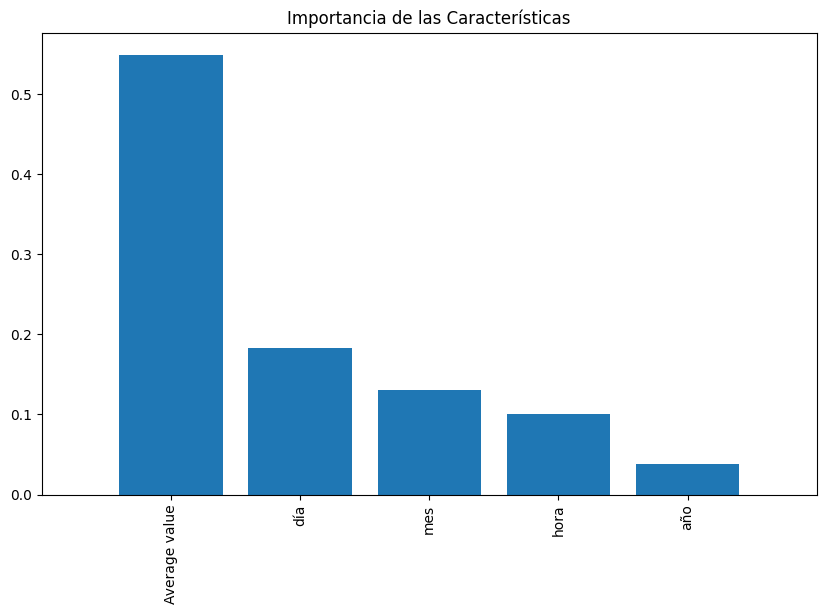

In [ ]:
# Analizar la importancia de las características: Otra práctica útil es examinar la importancia de las características en el modelo para entender:
# cuáles son las variables que más influyen en las predicciones.
import matplotlib.pyplot as plt
import numpy as np

# Obtener la importancia de las características
importancia = mejor_modelo3_base.feature_importances_

# Ordenar las características por importancia
indices = np.argsort(importancia)[::-1]

# Graficar la importancia de las características
plt.figure(figsize=(10, 6))
plt.title("Importancia de las Características")
plt.bar(range(X_train_model3.shape[1]), importancia[indices], align="center")
plt.xticks(range(X_train_model3.shape[1]), X_train_model3.columns[indices], rotation=90)
plt.xlim([-1, X_train_model3.shape[1]])
plt.show()

In [ ]:
# Aplicaremos GridSearchCV al modelo base de Random Forest para ver si podemos mejorar su rendimiento ajustando algunos hiperparámetros
from sklearn.model_selection import GridSearchCV

# Definir el modelo base de Random Forest
rf_base_model3 = RandomForestClassifier(random_state=42)

# Definir los parámetros para GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],  # Número de árboles
    'max_depth': [10, 20, 30],         # Profundidad máxima de los árboles
    'min_samples_split': [2, 5],       # Número mínimo de muestras para dividir un nodo
    'min_samples_leaf': [1, 2],        # Número mínimo de muestras en una hoja
    'bootstrap': [True, False]         # Usar bootstrap o no
}

# Aplicar GridSearchCV
grid_search = GridSearchCV(estimator=rf_base_model3, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2)

# Ajustar el modelo con los datos de entrenamiento
grid_search.fit(X_train_model3, y_train_model3)

# Mostrar los mejores parámetros encontrados
print(f"Mejores parámetros encontrados por GridSearchCV: {grid_search.best_params_}")

# Obtener el mejor modelo optimizado
rf_optimized_model3 = grid_search.best_estimator_

# Realizar predicciones con el modelo optimizado
y_pred_optimized_model3 = rf_optimized_model3.predict(X_test_model3)

# Calcular las métricas de evaluación: Accuracy y F1 Score
accuracy_optimized_model3 = accuracy_score(y_test_model3, y_pred_optimized_model3)
f1_optimized_model3 = f1_score(y_test_model3, y_pred_optimized_model3, average='macro')

# Mostrar resultados
print("\nModelo Random Forest Optimizado con GridSearchCV")
print("Accuracy (Optimizado):", accuracy_optimized_model3)
print("F1 Score (Optimizado):", f1_optimized_model3)
print("\nClassification Report (Optimizado):")
print(classification_report(y_test_model3, y_pred_optimized_model3))

Fitting 3 folds for each of 72 candidates, totalling 216 fits
Mejores parámetros encontrados por GridSearchCV: {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

Modelo Random Forest Optimizado con GridSearchCV
Accuracy (Optimizado): 0.9969900439916647
F1 Score (Optimizado): 0.8965332898394122

Classification Report (Optimizado):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4281
           1       1.00      0.56      0.72        25
           2       1.00      1.00      1.00         3
           3       1.00      0.83      0.91         6
           4       1.00      0.75      0.86         4

    accuracy                           1.00      4319
   macro avg       1.00      0.83      0.90      4319
weighted avg       1.00      1.00      1.00      4319



In [ ]:
# Comparar Random Forest Base vs. Optimizado; Resumen de métricas obtenidas
# Comparación de modelos base y optimizado
print("========== COMPARACIÓN DE MODELOS ==========")
print(f"Random Forest Base - Accuracy: {accuracy_base_model3:.4f}, F1 Score: {f1_base_model3:.4f}")
print(f"Random Forest Optimizado - Accuracy: {accuracy_optimized_model3:.4f}, F1 Score: {f1_optimized_model3:.4f}")

========== COMPARACIÓN DE MODELOS ==========
Random Forest Base - Accuracy: 0.9970, F1 Score: 0.8965
Random Forest Optimizado - Accuracy: 0.9970, F1 Score: 0.8965


In [ ]:
# ambos modelos tienen el mismo rendimiento, por lo que el modelo Random Forest Base
# debe tener los mismos hiperparámetros que el modelo optimizado por GridSearchCV
# verrifica los hiperparametros del modelo Randon Forest Base
import pandas as pd

pd.DataFrame(mejor_modelo3_base.get_params().items(), columns=["Hiperparámetro", "Valor"])

,Hiperparámetro,Valor
0,bootstrap,True
1,ccp_alpha,0.0
2,class_weight,None
3,criterion,gini
4,max_depth,None
5,max_features,sqrt
6,max_leaf_nodes,None
7,max_samples,None
8,min_impurity_decrease,0.0
9,min_samples_leaf,1


In [ ]:
# Guardamos el mejor modelo base
import joblib

# Guardar el modelo base en un archivo
joblib.dump(mejor_modelo3_base, 'random_forest_base_model3.pkl') # crea un archivo llamado random_forest_base_model3.pkl

print("Modelo base guardado correctamente.")

Modelo base guardado correctamente.


In [ ]:
 # Cargar el modelo guardado y realizar predicciones
 # Cargar el modelo optimizado desde el archivo
loaded_mejor_modelo3_base = joblib.load('random_forest_base_model3.pkl')

# Realizar predicciones con el modelo cargado
y_pred_loaded_mejor_modelo3_base = loaded_mejor_modelo3_base.predict(X_test_model3)

# Calcular métricas de evaluación
accuracy_loaded_mejor_modelo3_base = accuracy_score(y_test_model3, y_pred_loaded_mejor_modelo3_base)
f1_loaded_mejor_modelo3_base = f1_score(y_test_model3, y_pred_loaded_mejor_modelo3_base, average='macro')

# Mostrar resultados
print("===== MODELO CARGADO OPTIMIZED=====")
print("Accuracy:", accuracy_loaded_mejor_modelo3_base)
print("F1 Score (weighted):", f1_loaded_mejor_modelo3_base)
print("\nClassification Report:")
print(classification_report(y_test_model3, y_pred_loaded_mejor_modelo3_base))


===== MODELO CARGADO OPTIMIZED=====
Accuracy: 0.9969900439916647
F1 Score (weighted): 0.8965332898394122

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4281
           1       1.00      0.56      0.72        25
           2       1.00      1.00      1.00         3
           3       1.00      0.83      0.91         6
           4       1.00      0.75      0.86         4

    accuracy                           1.00      4319
   macro avg       1.00      0.83      0.90      4319
weighted avg       1.00      1.00      1.00      4319



In [ ]:
# calcular un promedio estimado realista de Average value (O3)
import pandas as pd
import numpy as np
import joblib

# Paso 1: Filtrar df_instrument por estación 223, contaminante O3, agosto 2023
df_filtrado_m3 = df_instrument[
    (df_instrument['Station code'] == 223) &
    (df_instrument['Item'] == 'O3')
].copy()

# Asegurar que la fecha esté en formato datetime
df_filtrado_m3['Measurement date'] = pd.to_datetime(df_filtrado_m3['Measurement date'])

# Crear columnas de año, mes
df_filtrado_m3['año'] = df_filtrado_m3['Measurement date'].dt.year
df_filtrado_m3['mes'] = df_filtrado_m3['Measurement date'].dt.month

promedios_mensuales_m3 = df_filtrado_m3.groupby(['año', 'mes'])['Average value'].mean().reset_index()

# veamos los resultados
print(promedios_mensuales_m3)

# Valor promedio O3 en junio 2023 para la estación 223

promedio_junio_2023_223 = df_filtrado_m3 [
    (df_filtrado_m3['Station code'] == 223) &
    (df_filtrado_m3['Item'] == 'O3') &
    (df_filtrado_m3['año'] == 2023) &
    (df_filtrado_m3['mes'] == 6)]['Average value'].mean()

print(f"Promedio de O3 en junio 2023 para estación 223: {promedio_junio_2023_223:.6f}")

     año  mes  Average value
0   2021    1       0.014871
1   2021    2       0.021220
2   2021    3       0.029517
3   2021    4       0.040874
4   2021    5       0.046356
5   2021    6       0.043462
6   2021    7       0.027489
7   2021    8       0.024859
8   2021    9       0.022201
9   2021   10       0.019492
10  2021   11       0.014944
11  2021   12       0.011401
12  2022    1       0.012620
13  2022    2       0.018491
14  2022    3       0.026359
15  2022    4       0.031394
16  2022    5       0.020191
17  2022    6       0.039401
18  2022    7       0.026762
19  2022    8       0.031516
20  2022    9       0.028621
21  2022   10       0.013452
22  2022   11       0.012024
23  2022   12       0.012200
24  2023    1       0.013225
25  2023    2       0.018591
26  2023    3       0.027036
27  2023    4       0.031402
28  2023    5       0.037135
29  2023    6       0.035744
Promedio de O3 en junio 2023 para estación 223: 0.035744


In [ ]:
import pandas as pd

# Crear rango horario para julio 2023
fechas_julio = pd.date_range(start='2023-07-01 00:00:00', end='2023-07-31 23:00:00', freq='h')

# Creaamos DataFrame base que contrendrá: fechas_julio,223 y O3
df_julio_2023 = pd.DataFrame({
    'Measurement date': fechas_julio,
    'Station code': 223,
    'Item': 'O3',
})

# Añadimos al df_julio_2023, las columnas: año, mes, día y hora
df_julio_2023['año'] = df_julio_2023['Measurement date'].dt.year
df_julio_2023['mes'] = df_julio_2023['Measurement date'].dt.month
df_julio_2023['día'] = df_julio_2023['Measurement date'].dt.day
df_julio_2023['hora'] = df_julio_2023['Measurement date'].dt.hour

# Crea y agreaga una nueva columna llamada ('Average value') y le pone elmismo valor a cada fila del df_julio_2023
# El valor es promedio_junio_2023_223, que ya habíamos calculado antes como el promedio de O3 en junio 2023.
# Como no tenemos datos reales de julio, usamos ese valor como referencia para predecir el estado del instrumento.

df_julio_2023['Average value'] = promedio_junio_2023_223

# Extrae las columnas que el modelo necesita para hacer predicciones.
# Seleccionamos las columnas que usamos para entrenar el modelo:

X_julio_model3 = df_julio_2023[['Average value','año', 'mes', 'día', 'hora']]

print(X_julio_model3.columns.tolist())

# Cargamos el mejor modelo

import joblib

mejor_modelo3_base = joblib.load("random_forest_base_model3.pkl")

# Realizar las predicciones;
# Le pasa los datos de julio (X_julio_model3) al modelo, y este predice el estado del instrumento para cada hora.
predicciones_julio_2023 = mejor_modelo3_base.predict(X_julio_model3)

# Agregar las predicciones al DataFrame
# crea y agrega al DataFrame original una nueva columna llamada 'Instrument status predicho' y coloca c/u de los valores
# predichos

df_julio_2023['Instrument status predicho'] = predicciones_julio_2023

# Hacer predicciones con el modelo
df_julio_2023['Instrument status predicho'] = mejor_modelo3_base.predict(X_julio_model3)

# ver el resultado de las predicciones
df_julio_2023.head(30)

['Average value', 'año', 'mes', 'día', 'hora']


,Measurement date,Station code,Item,año,mes,día,hora,Average value,Instrument status predicho
0,2023-07-01 00:00:00,223,O3,2023,7,1,0,0.035744,0
1,2023-07-01 01:00:00,223,O3,2023,7,1,1,0.035744,0
2,2023-07-01 02:00:00,223,O3,2023,7,1,2,0.035744,0
3,2023-07-01 03:00:00,223,O3,2023,7,1,3,0.035744,0
4,2023-07-01 04:00:00,223,O3,2023,7,1,4,0.035744,0
5,2023-07-01 05:00:00,223,O3,2023,7,1,5,0.035744,0
6,2023-07-01 06:00:00,223,O3,2023,7,1,6,0.035744,0
7,2023-07-01 07:00:00,223,O3,2023,7,1,7,0.035744,0
8,2023-07-01 08:00:00,223,O3,2023,7,1,8,0.035744,0
9,2023-07-01 09:00:00,223,O3,2023,7,1,9,0.035744,0


# Tarea Nº 3 : Modelos de Clasificación : Detección de fallas de medición

Modelo 4

Estación: 224

Contaminante: CO

Periodo: del 1 al 31 de octubre de 2023

In [ ]:
# Aplicar el filtro de datos según la estación y contaminante a predecir

df_model4 = df_instrument[
    (df_instrument['Station code'] == 224) &
    (df_instrument['Item'] == 'CO')
].copy()


# ver rango de fechas disponibles:
fecha_inicio_m4 = df_model4['Measurement date'].min()
fecha_fin_m4 = df_model4['Measurement date'].max()

print(f"Rango de fechas disponibles para el Modelo 3: estación 224 y contaminante CO:")
print(f"   Desde: {fecha_inicio_m4}")
print(f"   Hasta: {fecha_fin_m4}")

# Total de registros del df_model4
print(f" Número de registros disponibles: {df_model4.shape[0]}")

# mostrar los primero registros:
df_model4.head()

Rango de fechas disponibles para el Modelo 3: estación 224 y contaminante CO:
   Desde: 2021-01-01 00:00:00
   Hasta: 2023-09-30 23:00:00
 Número de registros disponibles: 23709


,Measurement date,Station code,Item code,Average value,Instrument status,Item,Status,año,mes,día,hora,Temporada del Año,Level pollution
2978726,2021-01-01 00:00:00,224,4,1.5,0,CO,Normal,2021,1,1,0,invierno,Good
2978732,2021-01-01 01:00:00,224,4,1.5,0,CO,Normal,2021,1,1,1,invierno,Good
2978738,2021-01-01 02:00:00,224,4,1.6,0,CO,Normal,2021,1,1,2,invierno,Good
2978744,2021-01-01 03:00:00,224,4,1.5,0,CO,Normal,2021,1,1,3,invierno,Good
2978750,2021-01-01 04:00:00,224,4,1.6,0,CO,Normal,2021,1,1,4,invierno,Good


In [ ]:
# últimos registros
df_model4.tail()

,Measurement date,Station code,Item code,Average value,Instrument status,Item,Status,año,mes,día,hora,Temporada del Año,Level pollution
3120951,2023-09-30 19:00:00,224,4,0.7,8,CO,Under repair,2023,9,30,19,otoño,Good
3120955,2023-09-30 20:00:00,224,4,0.8,8,CO,Under repair,2023,9,30,20,otoño,Good
3120963,2023-09-30 21:00:00,224,4,0.8,8,CO,Under repair,2023,9,30,21,otoño,Good
3120967,2023-09-30 22:00:00,224,4,0.8,8,CO,Under repair,2023,9,30,22,otoño,Good
3120973,2023-09-30 23:00:00,224,4,0.9,8,CO,Under repair,2023,9,30,23,otoño,Good


In [ ]:
# tamaño del dataframe
df_model4.shape

(23709, 13)

In [ ]:
# Seleccionar variables para el modelo
# Variables predictoras
X_model4 = df_model4[['Average value', 'año', 'mes', 'día', 'hora']]

# Variable objetivo
y_model4 = df_model4['Instrument status']

# Confirmar tamaños
print("Tamaño de X_model4:", X_model4.shape)
print("Tamaño de y_model4:", y_model4.shape)

print("Tipos de X:")
print(X_model4.dtypes)
print("Valores únicos en y:", y_model4.unique())

# Mostramos una muestra
X_model4.head()

Tamaño de X_model4: (23709, 5)
Tamaño de y_model4: (23709,)
Tipos de X:
Average value    float64
año                int32
mes                int32
día                int32
hora               int32
dtype: object
Valores únicos en y: [0 1 8 2 4]


,Average value,año,mes,día,hora
2978726,1.5,2021,1,1,0
2978732,1.5,2021,1,1,1
2978738,1.6,2021,1,1,2
2978744,1.5,2021,1,1,3
2978750,1.6,2021,1,1,4


In [ ]:
# valores únicos de la variable objetivo
print(y_model4.unique())

[0 1 8 2 4]


In [ ]:
# códificación de la variable objetivo y_model4

from sklearn.preprocessing import LabelEncoder

# Crear una instancia del codificador
le_model4 = LabelEncoder()

# Aplicar el codificador sobre la variable objetivo y_model4; convierte los valores originales a una secuencia de índices consecutivos
y_model4_encoded = le_model4.fit_transform(y_model4)

# Mostrar las clases originales codificadas
print("Clases originales codificadas:", le_model4.classes_)

# Verificamos el resultado
print("Valores únicos después de codificación:", np.unique(y_model4_encoded))

Clases originales codificadas: [0 1 2 4 8]
Valores únicos después de codificación: [0 1 2 3 4]


In [ ]:
# Código de separación de los datos en conjunto de entrenamiento y prueba:
from sklearn.model_selection import train_test_split

# Dividir datos
X_train_model4, X_test_model4, y_train_model4, y_test_model4 = train_test_split(
    X_model4,
    y_model4_encoded,
    test_size=0.2,
    random_state=42
)

# Confirmar tamaños y formas de los subconjuntos de prueba y entrenamiento
print("Tamaño del conjunto de entrenamiento:", X_train_model4.shape)
print("Tamaño del conjunto de prueba:", X_test_model4.shape)
print("Tamaño de las etiquetas de entrenamiento:", y_train_model4.shape)
print("Tamaño de las etiquetas de prueba:", y_test_model4.shape)

Tamaño del conjunto de entrenamiento: (18967, 5)
Tamaño del conjunto de prueba: (4742, 5)
Tamaño de las etiquetas de entrenamiento: (18967,)
Tamaño de las etiquetas de prueba: (4742,)


In [ ]:
# Entrenar y comparar varios modelos de clasificación
# Objetivo: Comparar el rendimiento de varios modelos clásicos para elegir el mejor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score

# Diccionario para guardar métricas
resultados_acc_m4 = {}
resultados_f1_m4 = {}
modelos4_entrenados = {}

# Diccionario de modelos
model4 = {
    "Regresión Logística": LogisticRegression(max_iter=1000),
    "Árbol de Decisión": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier()
}

# Entrenar y evaluar cada modelo
for nombre, modelo in model4.items():
    modelo.fit(X_train_model4, y_train_model4)
    y_pred = modelo.predict(X_test_model4)

    acc = accuracy_score(y_test_model4, y_pred)
    f1 = f1_score(y_test_model4, y_pred, average='macro')

    print(f"\nModelo: {nombre}")
    print(f"Accuracy: {acc:.4f}")
    print(f"F1-score (macro): {f1:.4f}")
    print("Classification Report:")
    print(classification_report(y_test_model4, y_pred))

    resultados_acc_m4[nombre] = acc
    resultados_f1_m4[nombre] = f1
    modelos4_entrenados[nombre] = modelo  # Guardamos cada modelo entrenado

# entrenamos varios modelos (Regresión Logística, Árbol, RF, SVM, KNN)
# cálculamos Accuracy y F1 Score para todos los modelos

# Seleccionar y guardar el mejor modelo según F1 Score

mejor_modelo_nombre = max(resultados_f1_m4, key=resultados_f1_m4.get)
mejor_modelo4_base = modelos4_entrenados[mejor_modelo_nombre]

# seleccionar y guardar el mejor modelo según Accuracy:
mejor_modelo_nombre_acc = max(resultados_acc_m4, key=resultados_acc_m4.get)
mejor_modelo_base_acc = modelos4_entrenados[mejor_modelo_nombre_acc]

print(f"\nMejor modelo por F1 Score: {mejor_modelo_nombre} ({resultados_f1_m4[mejor_modelo_nombre]:.4f})")
print(f"Mejor modelo por Accuracy: {mejor_modelo_nombre_acc} ({resultados_acc_m4[mejor_modelo_nombre_acc]:.4f})")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre


Modelo: Regresión Logística
Accuracy: 0.9772
F1-score (macro): 0.3938
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      4535
           1       0.00      0.00      0.00        27
           2       0.00      0.00      0.00        28
           3       0.97      0.99      0.98       100
           4       0.00      0.00      0.00        52

    accuracy                           0.98      4742
   macro avg       0.39      0.40      0.39      4742
weighted avg       0.96      0.98      0.97      4742


Modelo: Árbol de Decisión
Accuracy: 0.9911
F1-score (macro): 0.8694
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      4535
           1       0.35      0.48      0.41        27
           2       0.97      1.00      0.98        28
           3       1.00      1.00      1.00       100
           4       0.93      1.00      0.96        52


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Modelo: KNN
Accuracy: 0.9857
F1-score (macro): 0.6920
Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4535
           1       0.00      0.00      0.00        27
           2       1.00      0.64      0.78        28
           3       1.00      0.91      0.95       100
           4       1.00      0.58      0.73        52

    accuracy                           0.99      4742
   macro avg       0.80      0.63      0.69      4742
weighted avg       0.98      0.99      0.98      4742


Mejor modelo por F1 Score: Random Forest (0.8887)
Mejor modelo por Accuracy: Random Forest (0.9960)


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Verificamos el resultado del paso anterior predicción el modelo ganador
# Predecir con el modelo Random Forest Base y calcular métricas
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Predecir con el modelo base (el mejor de los modelos iniciales)
y_pred_base_model4 = mejor_modelo4_base.predict(X_test_model4)

# Calcular métricas del modelo base
accuracy_base_model4 = accuracy_score(y_test_model4, y_pred_base_model4)
f1_base_model4 = f1_score(y_test_model4, y_pred_base_model4, average='macro')

# Mostrar resultados del modelo base
print("Modelo Base (mejor según F1 Score):", mejor_modelo_nombre)
print("Accuracy:", accuracy_base_model4)
print("F1 Score (macro):", f1_base_model4)
print("\nClassification Report:")
print(classification_report(y_test_model4, y_pred_base_model4))

Modelo Base (mejor según F1 Score): Random Forest
Accuracy: 0.9959932517924927
F1 Score (macro): 0.8886797006966685

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4535
           1       0.90      0.33      0.49        27
           2       0.97      1.00      0.98        28
           3       1.00      0.99      0.99       100
           4       0.96      1.00      0.98        52

    accuracy                           1.00      4742
   macro avg       0.97      0.86      0.89      4742
weighted avg       1.00      1.00      1.00      4742



In [ ]:
# matrix de confusión

from sklearn.metrics import multilabel_confusion_matrix
import pandas as pd

# Calculamos la matriz de confusión binaria por clase
mcm = multilabel_confusion_matrix(y_test_model4, y_pred_base_model4)

# Extraemos los valores TN, FP, FN, TP para cada clase
datos_confusion = []

for clase, matriz in enumerate(mcm):
    tn = matriz[0, 0]
    fp = matriz[0, 1]
    fn = matriz[1, 0]
    tp = matriz[1, 1]

    datos_confusion.append({
        'Clase': clase,
        'Verdaderos Negativos (TN)': tn,
        'Falsos Positivos (FP)': fp,
        'Falsos Negativos (FN)': fn,
        'Verdaderos Positivos (TP)': tp
    })

# Creamos un DataFrame para visualizarlo mejor
df_confusion = pd.DataFrame(datos_confusion)

# Mostramos la tabla
print("\n Matriz de Confusión por Clase (uno vs todos):")
display(df_confusion)


 Matriz de Confusión por Clase (uno vs todos):


,Clase,Verdaderos Negativos (TN),Falsos Positivos (FP),Falsos Negativos (FN),Verdaderos Positivos (TP)
0,0,192,15,0,4535
1,1,4714,1,18,9
2,2,4713,1,0,28
3,3,4642,0,1,99
4,4,4688,2,0,52


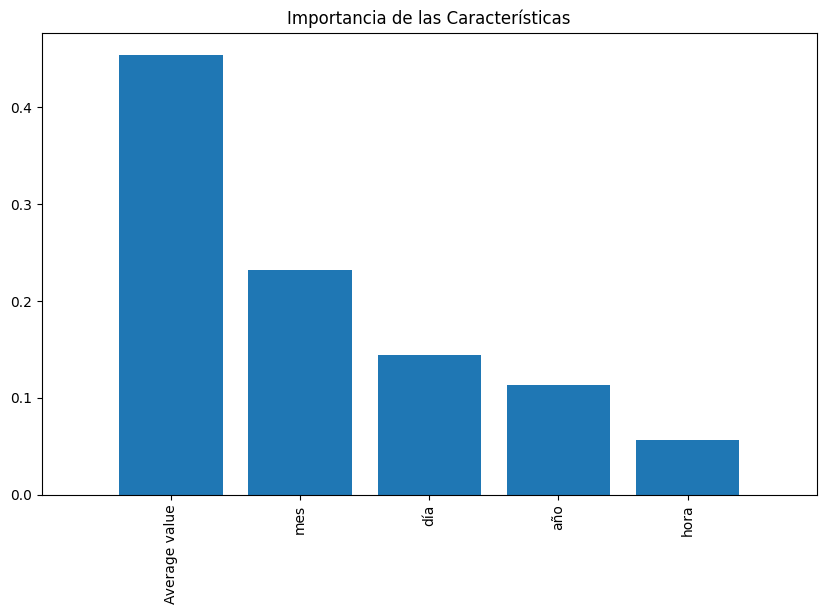

In [ ]:
# Analizar la importancia de las características: Otra práctica útil es examinar la importancia de las características en el modelo para entender:
# cuáles son las variables que más influyen en las predicciones.
import matplotlib.pyplot as plt
import numpy as np

# Obtener la importancia de las características
importancia = mejor_modelo4_base.feature_importances_

# Ordenar las características por importancia
indices = np.argsort(importancia)[::-1]

# Graficar la importancia de las características
plt.figure(figsize=(10, 6))
plt.title("Importancia de las Características")
plt.bar(range(X_train_model4.shape[1]), importancia[indices], align="center")
plt.xticks(range(X_train_model4.shape[1]), X_train_model4.columns[indices], rotation=90)
plt.xlim([-1, X_train_model4.shape[1]])
plt.show()

In [ ]:
# Aplicaremos GridSearchCV al modelo base de Random Forest para ver si podemos mejorar su rendimiento ajustando algunos hiperparámetros
from sklearn.model_selection import GridSearchCV

# Definir el modelo base de Random Forest
rf_base_model4 = RandomForestClassifier(random_state=42)

# Definir los parámetros para GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],  # Número de árboles
    'max_depth': [10, 20, 30],         # Profundidad máxima de los árboles
    'min_samples_split': [2, 5],       # Número mínimo de muestras para dividir un nodo
    'min_samples_leaf': [1, 2],        # Número mínimo de muestras en una hoja
    'bootstrap': [True, False]         # Usar bootstrap o no
}

# Aplicar GridSearchCV
grid_search = GridSearchCV(estimator=rf_base_model4, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2)

# Ajustar el modelo con los datos de entrenamiento
grid_search.fit(X_train_model4, y_train_model4)

# Mostrar los mejores parámetros encontrados
print(f"Mejores parámetros encontrados por GridSearchCV: {grid_search.best_params_}")

# Obtener el mejor modelo optimizado
rf_optimized_model4 = grid_search.best_estimator_

# Realizar predicciones con el modelo optimizado
y_pred_optimized_model4 = rf_optimized_model4.predict(X_test_model4)

# Calcular las métricas de evaluación: Accuracy y F1 Score
accuracy_optimized_model4 = accuracy_score(y_test_model4, y_pred_optimized_model4)
f1_optimized_model4 = f1_score(y_test_model4, y_pred_optimized_model4, average='macro')

# Mostrar resultados
print("\nModelo Random Forest Optimizado con GridSearchCV")
print("Accuracy (Optimizado):", accuracy_optimized_model4)
print("F1 Score (Optimizado):", f1_optimized_model4)
print("\nClassification Report (Optimizado):")
print(classification_report(y_test_model4, y_pred_optimized_model4))

Fitting 3 folds for each of 72 candidates, totalling 216 fits
Mejores parámetros encontrados por GridSearchCV: {'bootstrap': False, 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}

Modelo Random Forest Optimizado con GridSearchCV
Accuracy (Optimizado): 0.9964150147617039
F1 Score (Optimizado): 0.9109234864460592

Classification Report (Optimizado):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4535
           1       1.00      0.41      0.58        27
           2       0.97      1.00      0.98        28
           3       1.00      0.99      0.99       100
           4       1.00      1.00      1.00        52

    accuracy                           1.00      4742
   macro avg       0.99      0.88      0.91      4742
weighted avg       1.00      1.00      1.00      4742



In [ ]:
# matrix de confusión modelo4 optimizado

from sklearn.metrics import multilabel_confusion_matrix
import pandas as pd

# Paso 1: Ya tienes el modelo optimizado y las predicciones
# Modelo: best_rf
# Predicciones: y_pred_optimized

# Paso 2: Calculamos la matriz de confusión binaria por clase
mcm = multilabel_confusion_matrix(y_test_model4, y_pred_optimized_model4)

# Paso 3: Extraemos los valores TN, FP, FN, TP para cada clase
datos_confusion = []

for clase, matriz in enumerate(mcm):
    tn = matriz[0, 0]
    fp = matriz[0, 1]
    fn = matriz[1, 0]
    tp = matriz[1, 1]

    datos_confusion.append({
        'Clase': clase,
        'Verdaderos Negativos (TN)': tn,
        'Falsos Positivos (FP)': fp,
        'Falsos Negativos (FN)': fn,
        'Verdaderos Positivos (TP)': tp
    })

# Paso 4: Creamos un DataFrame para visualizarlo mejor
df_confusion = pd.DataFrame(datos_confusion)

# Mostramos la tabla
print("\n Matriz de Confusión por Clase (uno vs todos):")
display(df_confusion)


 Matriz de Confusión por Clase (uno vs todos):


,Clase,Verdaderos Negativos (TN),Falsos Positivos (FP),Falsos Negativos (FN),Verdaderos Positivos (TP)
0,0,191,16,0,4535
1,1,4715,0,16,11
2,2,4713,1,0,28
3,3,4642,0,1,99
4,4,4690,0,0,52


In [ ]:
# Comparar Random Forest Base vs. Optimizado; Resumen de métricas obtenidas
# Comparación de modelos base y optimizado
print("========== COMPARACIÓN DE MODELOS ==========")
print(f"Random Forest Base - Accuracy: {accuracy_base_model4:.4f}, F1 Score: {f1_base_model4:.4f}")
print(f"Random Forest Optimizado - Accuracy: {accuracy_optimized_model4:.4f}, F1 Score: {f1_optimized_model4:.4f}")

========== COMPARACIÓN DE MODELOS ==========
Random Forest Base - Accuracy: 0.9960, F1 Score: 0.8887
Random Forest Optimizado - Accuracy: 0.9964, F1 Score: 0.9109


In [ ]:
# Guardar el modelo optimizado
import joblib

# Guardar el modelo optimizado en un archivo
joblib.dump(rf_optimized_model4, "modelo_rf_CO_224.pkl")
print("Modelo guardado exitosamente.")

Modelo guardado exitosamente.


In [ ]:
# Buscamos Valor Real del promedio de CO por año en la estacioón 224 a fin de sustituirlo en el mejor mofelo optenido

# 1. Filtrar por estación 224 y CO
df_filtrado_m4 = df_instrument[
    (df_instrument['Station code'] == 224) &
    (df_instrument['Item'] == 'CO')
].copy()

# 2. Asegurarse de que la columna de fecha sea datetime
df_filtrado_m4['Measurement date'] = pd.to_datetime(df_filtrado_m4['Measurement date'])

# 3. Crear columnas de año y mes
df_filtrado_m4['año'] = df_filtrado_m4['Measurement date'].dt.year
df_filtrado_m4['mes'] = df_filtrado_m4['Measurement date'].dt.month

# 4. Calcular promedio mensual del contaminante CO
promedios_mensuales = df_filtrado_m4.groupby(['año', 'mes'])['Average value'].mean().reset_index()

# vemos resultados
print(promedios_mensuales)


# Valor promedio en septiembre 2023 para la estación 224:

promedio_septiembre_2023_224 = df_instrument[
    (df_instrument['Station code'] == 224) &
    (df_instrument['Item'] == 'CO') &
    (df_instrument['año'] == 2023) &
    (df_instrument['mes'] == 9)
]['Average value'].mean()

print(f"Promedio de CO en septiembre 2023 para estación 224: {promedio_septiembre_2023_224:.6f}")

     año  mes  Average value
0   2021    1       0.722581
1   2021    2       0.671131
2   2021    3       0.651478
3   2021    4       0.495833
4   2021    5       0.403360
5   2021    6       0.370417
6   2021    7       0.363038
7   2021    8       0.345833
8   2021    9       0.440694
9   2021   10       0.444086
10  2021   11       0.532222
11  2021   12       0.451075
12  2022    1       0.525403
13  2022    2       0.453125
14  2022    3       0.516801
15  2022    4       0.468750
16  2022    5       0.352823
17  2022    6       0.304583
18  2022    7       0.300538
19  2022    8       0.283871
20  2022    9       0.290833
21  2022   10       0.415591
22  2022   11       0.628472
23  2022   12       0.566398
24  2023    1       0.657335
25  2023    2       0.592560
26  2023    3       0.727916
27  2023    4       0.362865
28  2023    5       0.376184
29  2023    6       0.250139
30  2023    7       0.229461
31  2023    8       0.320676
32  2023    9      -0.569479
Promedio de CO

In [ ]:
# valores promedio CO estación 224 mes de septiembre 2023
detalle_promedio_septiembre_2023_224 = df_instrument[
    (df_instrument['Station code'] == 224) &
    (df_instrument['Item'] == 'CO') &
    (df_instrument['año'] == 2023) &
    (df_instrument['mes'] == 9)
]

detalle_promedio_septiembre_2023_224.tail(60)

,Measurement date,Station code,Item code,Average value,Instrument status,Item,Status,año,mes,día,hora,Temporada del Año,Level pollution
3120621,2023-09-28 12:00:00,224,4,0.4,8,CO,Under repair,2023,9,28,12,otoño,Good
3120624,2023-09-28 13:00:00,224,4,0.4,8,CO,Under repair,2023,9,28,13,otoño,Good
3120633,2023-09-28 14:00:00,224,4,0.4,8,CO,Under repair,2023,9,28,14,otoño,Good
3120638,2023-09-28 15:00:00,224,4,0.4,8,CO,Under repair,2023,9,28,15,otoño,Good
3120645,2023-09-28 16:00:00,224,4,0.3,8,CO,Under repair,2023,9,28,16,otoño,Good
3120652,2023-09-28 17:00:00,224,4,0.4,8,CO,Under repair,2023,9,28,17,otoño,Good
3120654,2023-09-28 18:00:00,224,4,0.4,8,CO,Under repair,2023,9,28,18,otoño,Good
3120660,2023-09-28 19:00:00,224,4,0.4,8,CO,Under repair,2023,9,28,19,otoño,Good
3120669,2023-09-28 20:00:00,224,4,0.4,8,CO,Under repair,2023,9,28,20,otoño,Good
3120675,2023-09-28 21:00:00,224,4,0.4,8,CO,Under repair,2023,9,28,21,otoño,Good


In [ ]:
import pandas as pd

# Crear rango de fechas por hora para octubre 2023
fechas_octubre = pd.date_range(start="2023-10-01", end="2023-10-31 23:00:00", freq="H")

# Crear DataFrame base que contrendrá: fechas_octubre,224 y CO
df_octubre_2023 = pd.DataFrame({
    'Measurement date': fechas_octubre,
    'Station code': 224,
    'Item': 'CO',
})

# Añadimos al df_octubre_2023, las columnas: año, mes, día y hora
df_octubre_2023['año'] = df_octubre_2023['Measurement date'].dt.year
df_octubre_2023['mes'] = df_octubre_2023['Measurement date'].dt.month
df_octubre_2023['día'] = df_octubre_2023['Measurement date'].dt.day
df_octubre_2023['hora'] = df_octubre_2023['Measurement date'].dt.hour

# Crea y agreaga una nueva columna llamada ('Average value') y le pone elmismo valor a cada fila del df_octubre_2023
# El valor es promedio_septiembre_2023_224, que ya habíamos calculado antes como el promedio de CO en septiembre 2023.
# Como no tenemos datos reales de noviembre, usamos ese valor como referencia para predecir el estado del instrumento.

df_octubre_2023['Average value'] = promedio_septiembre_2023_224

# ver resultados
df_octubre_2023.head()

# Extrae las columnas que el modelo necesita para hacer predicciones.
# Seleccionamos las columnas que usamos para entrenar el modelo:

X_octubre_model4 = df_octubre_2023[['Average value','año', 'mes', 'día', 'hora']]

# Cargamos el modelo optimizado

import joblib

# Cargar el modelo optimizado
rf_optimized_model4 = joblib.load("modelo_rf_CO_224.pkl")

# Realizar las predicciones;
# Le pasa los datos de noviembre (X_octubre_model4) al modelo, y este predice el estado del instrumento para cada hora.
predicciones_octubre_2023 = rf_optimized_model4.predict(X_octubre_model4)

# Agregar las predicciones al DataFrame
# crea y agrega al DataFrame original una nueva columna llamada 'Instrument status predicho' y coloca c/u de los valores
# predichos

df_octubre_2023['Instrument status predicho'] = predicciones_octubre_2023


# Hacer predicciones con el modelo
df_octubre_2023['Instrument status predicho'] = rf_optimized_model4.predict(X_octubre_model4)

# ver el resultado de las predicciones
df_octubre_2023.head(30)

<ipython-input-93-6b509e5f9171>:4: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fechas_octubre = pd.date_range(start="2023-10-01", end="2023-10-31 23:00:00", freq="H")


,Measurement date,Station code,Item,año,mes,día,hora,Average value,Instrument status predicho
0,2023-10-01 00:00:00,224,CO,2023,10,1,0,-0.569479,3
1,2023-10-01 01:00:00,224,CO,2023,10,1,1,-0.569479,3
2,2023-10-01 02:00:00,224,CO,2023,10,1,2,-0.569479,3
3,2023-10-01 03:00:00,224,CO,2023,10,1,3,-0.569479,3
4,2023-10-01 04:00:00,224,CO,2023,10,1,4,-0.569479,3
5,2023-10-01 05:00:00,224,CO,2023,10,1,5,-0.569479,3
6,2023-10-01 06:00:00,224,CO,2023,10,1,6,-0.569479,3
7,2023-10-01 07:00:00,224,CO,2023,10,1,7,-0.569479,3
8,2023-10-01 08:00:00,224,CO,2023,10,1,8,-0.569479,3
9,2023-10-01 09:00:00,224,CO,2023,10,1,9,-0.569479,3


In [ ]:
df_octubre_2023.tail(30)

,Measurement date,Station code,Item,año,mes,día,hora,Average value,Instrument status predicho
714,2023-10-30 18:00:00,224,CO,2023,10,30,18,-0.569479,3
715,2023-10-30 19:00:00,224,CO,2023,10,30,19,-0.569479,3
716,2023-10-30 20:00:00,224,CO,2023,10,30,20,-0.569479,3
717,2023-10-30 21:00:00,224,CO,2023,10,30,21,-0.569479,3
718,2023-10-30 22:00:00,224,CO,2023,10,30,22,-0.569479,3
719,2023-10-30 23:00:00,224,CO,2023,10,30,23,-0.569479,3
720,2023-10-31 00:00:00,224,CO,2023,10,31,0,-0.569479,3
721,2023-10-31 01:00:00,224,CO,2023,10,31,1,-0.569479,3
722,2023-10-31 02:00:00,224,CO,2023,10,31,2,-0.569479,3
723,2023-10-31 03:00:00,224,CO,2023,10,31,3,-0.569479,3


# Tarea Nº 3: Modelo 5 Clasificación:
Station code: 226 | pollutant: PM10 | Period: 2023-08-01 00:00:00 - 2023-08-31 23:00:00

In [ ]:
# Aplicar el filtro de datos según la estación y contaminante a predecir

df_model5 = df_instrument[
    (df_instrument['Station code'] == 226) &
    (df_instrument['Item'] == 'PM10')
].copy()


# ver rango de fechas disponibles:
fecha_inicio_m5 = df_model5['Measurement date'].min()
fecha_fin_m5 = df_model5['Measurement date'].max()

print(f"Rango de fechas disponibles para el Modelo 5: estación 226 y contaminante PM10:")
print(f"   Desde: {fecha_inicio_m5}")
print(f"   Hasta: {fecha_fin_m5}")

# Total de registros del df_model5
print(f" Número de registros disponibles: {df_model5.shape[0]}")

# mostrar los primero registros:
df_model5.head()

Rango de fechas disponibles para el Modelo 5: estación 226 y contaminante PM10:
   Desde: 2021-01-01 00:00:00
   Hasta: 2023-07-31 23:00:00
 Número de registros disponibles: 22316


,Measurement date,Station code,Item code,Average value,Instrument status,Item,Status,año,mes,día,hora,Temporada del Año,Level pollution
3267700,2021-01-01 00:00:00,226,7,63.0,0,PM10,Normal,2021,1,1,0,invierno,Normal
3267706,2021-01-01 01:00:00,226,7,61.0,0,PM10,Normal,2021,1,1,1,invierno,Normal
3267712,2021-01-01 02:00:00,226,7,71.0,0,PM10,Normal,2021,1,1,2,invierno,Normal
3267718,2021-01-01 03:00:00,226,7,79.0,0,PM10,Normal,2021,1,1,3,invierno,Normal
3267724,2021-01-01 04:00:00,226,7,73.0,0,PM10,Normal,2021,1,1,4,invierno,Normal


In [ ]:
# últimos registros
df_model5.tail()

,Measurement date,Station code,Item code,Average value,Instrument status,Item,Status,año,mes,día,hora,Temporada del Año,Level pollution
3401562,2023-07-31 19:00:00,226,7,27.0,0,PM10,Normal,2023,7,31,19,verano,Good
3401573,2023-07-31 20:00:00,226,7,31.0,0,PM10,Normal,2023,7,31,20,verano,Normal
3401579,2023-07-31 21:00:00,226,7,29.0,0,PM10,Normal,2023,7,31,21,verano,Good
3401585,2023-07-31 22:00:00,226,7,26.0,0,PM10,Normal,2023,7,31,22,verano,Good
3401589,2023-07-31 23:00:00,226,7,21.0,0,PM10,Normal,2023,7,31,23,verano,Good


In [ ]:
# tamaño del dataframe
df_model5.shape

(22316, 13)

In [ ]:
# Seleccionar variables para el modelo
# Variables predictoras
X_model5 = df_model5[['Average value', 'año', 'mes', 'día', 'hora']]

# Variable objetivo
y_model5 = df_model5['Instrument status']

# Confirmar tamaños
print("Tamaño de X_model5:", X_model5.shape)
print("Tamaño de y_model5:", y_model5.shape)

print("Tipos de X:")
print(X_model5.dtypes)
print("Valores únicos en y:", y_model5.unique())

# Mostramos una muestra
X_model5.head()

Tamaño de X_model5: (22316, 5)
Tamaño de y_model5: (22316,)
Tipos de X:
Average value    float64
año                int32
mes                int32
día                int32
hora               int32
dtype: object
Valores únicos en y: [0 1 8 9 4 2]


,Average value,año,mes,día,hora
3267700,63.0,2021,1,1,0
3267706,61.0,2021,1,1,1
3267712,71.0,2021,1,1,2
3267718,79.0,2021,1,1,3
3267724,73.0,2021,1,1,4


In [ ]:
# valores únicos de la variable objetivo
print(y_model5.unique())

[0 1 8 9 4 2]


In [ ]:
# códificación de la variable objetivo y_model5

from sklearn.preprocessing import LabelEncoder

# Crear una instancia del codificador
le_model5 = LabelEncoder()

# Aplicar el codificador sobre la variable objetivo y_model5; convierte los valores originales a una secuencia de índices consecutivos
y_model5_encoded = le_model5.fit_transform(y_model5)

# Mostrar las clases originales codificadas
print("Clases originales codificadas:", le_model5.classes_)

# Verificamos el resultado
print("Valores únicos después de codificación:", np.unique(y_model5_encoded))

Clases originales codificadas: [0 1 2 4 8 9]
Valores únicos después de codificación: [0 1 2 3 4 5]


In [ ]:
# Código de separación de los datos en conjunto de entrenamiento y prueba:
from sklearn.model_selection import train_test_split

# Dividir datos
X_train_model5, X_test_model5, y_train_model5, y_test_model5 = train_test_split(
    X_model5,
    y_model5_encoded,
    test_size=0.2,
    random_state=42
)

# Confirmar tamaños y formas de los subconjuntos de prueba y entrenamiento
print("Tamaño del conjunto de entrenamiento:", X_train_model5.shape)
print("Tamaño del conjunto de prueba:", X_test_model5.shape)
print("Tamaño de las etiquetas de entrenamiento:", y_train_model5.shape)
print("Tamaño de las etiquetas de prueba:", y_test_model5.shape)

Tamaño del conjunto de entrenamiento: (17852, 5)
Tamaño del conjunto de prueba: (4464, 5)
Tamaño de las etiquetas de entrenamiento: (17852,)
Tamaño de las etiquetas de prueba: (4464,)


In [ ]:
# Entrenar y comparar varios modelos de clasificación
# Objetivo: Comparar el rendimiento de varios modelos clásicos para elegir el mejor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score

# Diccionario para guardar métricas
resultados_acc_m5 = {}
resultados_f1_m5 = {}
modelos5_entrenados = {}

# Diccionario de modelos
model5 = {
    "Regresión Logística": LogisticRegression(max_iter=1000),
    "Árbol de Decisión": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier()
}

# Entrenar y evaluar cada modelo
for nombre, modelo in model5.items():
    modelo.fit(X_train_model5, y_train_model5)
    y_pred = modelo.predict(X_test_model5)

    acc = accuracy_score(y_test_model5, y_pred)
    f1 = f1_score(y_test_model5, y_pred, average='macro')

    print(f"\nModelo: {nombre}")
    print(f"Accuracy: {acc:.4f}")
    print(f"F1-score (macro): {f1:.4f}")
    print("Classification Report:")
    print(classification_report(y_test_model5, y_pred))

    resultados_acc_m5[nombre] = acc
    resultados_f1_m5[nombre] = f1
    modelos5_entrenados[nombre] = modelo  # Guardamos cada modelo entrenado

# entrenamos varios modelos (Regresión Logística, Árbol, RF, SVM, KNN)
# cálculamos Accuracy y F1 Score para todos los modelos

# Seleccionar y guardar el mejor modelo según F1 Score

mejor_modelo_nombre = max(resultados_f1_m5, key=resultados_f1_m5.get)
mejor_modelo5_base = modelos5_entrenados[mejor_modelo_nombre]

# seleccionar y guardar el mejor modelo según Accuracy:
mejor_modelo_nombre_acc = max(resultados_acc_m5, key=resultados_acc_m5.get)
mejor_modelo_base_acc = modelos5_entrenados[mejor_modelo_nombre_acc]

print(f"\nMejor modelo por F1 Score: {mejor_modelo_nombre} ({resultados_f1_m5[mejor_modelo_nombre]:.4f})")
print(f"Mejor modelo por Accuracy: {mejor_modelo_nombre_acc} ({resultados_acc_m5[mejor_modelo_nombre_acc]:.4f})")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre


Modelo: Regresión Logística
Accuracy: 0.9727
F1-score (macro): 0.1644
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99      4342
           1       0.00      0.00      0.00        32
           2       0.00      0.00      0.00        10
           3       0.00      0.00      0.00         4
           4       0.00      0.00      0.00        36
           5       0.00      0.00      0.00        40

    accuracy                           0.97      4464
   macro avg       0.16      0.17      0.16      4464
weighted avg       0.95      0.97      0.96      4464


Modelo: Árbol de Decisión
Accuracy: 0.9718
F1-score (macro): 0.5998
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4342
           1       0.27      0.31      0.29        32
           2       0.25      0.30      0.27        10
           3       0.80      1.00      0.89         4


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Modelo: KNN
Accuracy: 0.9774
F1-score (macro): 0.4469
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      4342
           1       0.60      0.09      0.16        32
           2       0.00      0.00      0.00        10
           3       0.80      1.00      0.89         4
           4       1.00      0.47      0.64        36
           5       0.00      0.00      0.00        40

    accuracy                           0.98      4464
   macro avg       0.56      0.43      0.45      4464
weighted avg       0.96      0.98      0.97      4464


Mejor modelo por F1 Score: Random Forest (0.6671)
Mejor modelo por Accuracy: Random Forest (0.9850)


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Verificamos el resultado del paso anterior predicción el modelo ganador
# Predecir con el modelo Random Forest Base y calcular métricas
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Predecir con el modelo base (el mejor de los modelos iniciales)
y_pred_base_model5 = mejor_modelo5_base.predict(X_test_model5)

# Calcular métricas del modelo base
accuracy_base_model5 = accuracy_score(y_test_model5, y_pred_base_model5)
f1_base_model5 = f1_score(y_test_model5, y_pred_base_model5, average='macro')

# Mostrar resultados del modelo base
print("Modelo Base (mejor según F1 Score):", mejor_modelo_nombre)
print("Accuracy:", accuracy_base_model5)
print("F1 Score (macro):", f1_base_model5)
print("\nClassification Report:")
print(classification_report(y_test_model5, y_pred_base_model5))

Modelo Base (mejor según F1 Score): Random Forest
Accuracy: 0.9849910394265233
F1 Score (macro): 0.6671389707884141

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4342
           1       0.82      0.28      0.42        32
           2       1.00      0.30      0.46        10
           3       0.80      1.00      0.89         4
           4       1.00      0.97      0.99        36
           5       0.86      0.15      0.26        40

    accuracy                           0.98      4464
   macro avg       0.91      0.62      0.67      4464
weighted avg       0.98      0.98      0.98      4464



In [ ]:
# matrix de confusión

from sklearn.metrics import multilabel_confusion_matrix
import pandas as pd

# Calculamos la matriz de confusión binaria por clase
mcm = multilabel_confusion_matrix(y_test_model5, y_pred_base_model5)

# Extraemos los valores TN, FP, FN, TP para cada clase
datos_confusion = []

for clase, matriz in enumerate(mcm):
    tn = matriz[0, 0]
    fp = matriz[0, 1]
    fn = matriz[1, 0]
    tp = matriz[1, 1]

    datos_confusion.append({
        'Clase': clase,
        'Verdaderos Negativos (TN)': tn,
        'Falsos Positivos (FP)': fp,
        'Falsos Negativos (FN)': fn,
        'Verdaderos Positivos (TP)': tp
    })

# Creamos un DataFrame para visualizarlo mejor
df_confusion = pd.DataFrame(datos_confusion)

# Mostramos la tabla
print("\n Matriz de Confusión por Clase (uno vs todos):")
display(df_confusion)


 Matriz de Confusión por Clase (uno vs todos):


,Clase,Verdaderos Negativos (TN),Falsos Positivos (FP),Falsos Negativos (FN),Verdaderos Positivos (TP)
0,0,59,63,2,4340
1,1,4430,2,23,9
2,2,4454,0,7,3
3,3,4459,1,0,4
4,4,4428,0,1,35
5,5,4423,1,34,6


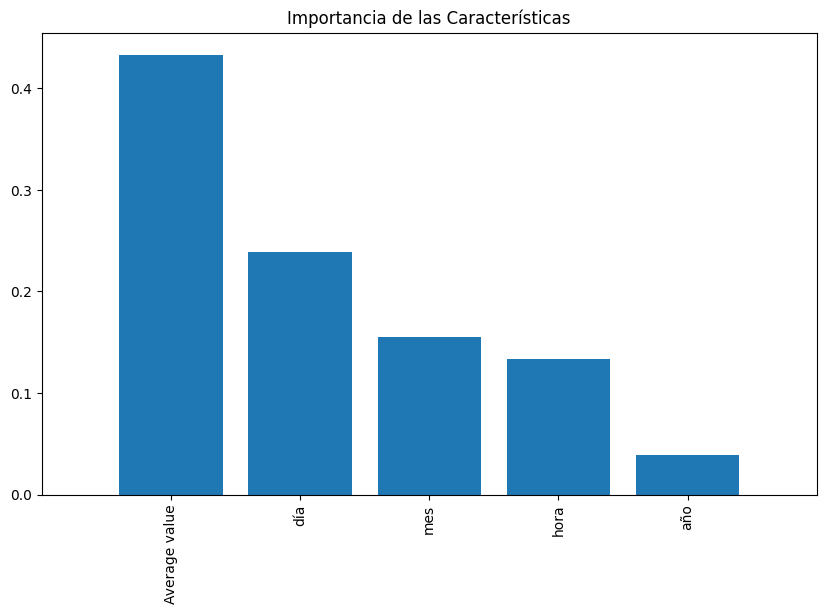

In [ ]:
# Analizar la importancia de las características: Otra práctica útil es examinar la importancia de las características en el modelo para entender:
# cuáles son las variables que más influyen en las predicciones.
import matplotlib.pyplot as plt
import numpy as np

# Obtener la importancia de las características
importancia = mejor_modelo5_base.feature_importances_

# Ordenar las características por importancia
indices = np.argsort(importancia)[::-1]

# Graficar la importancia de las características
plt.figure(figsize=(10, 6))
plt.title("Importancia de las Características")
plt.bar(range(X_train_model5.shape[1]), importancia[indices], align="center")
plt.xticks(range(X_train_model5.shape[1]), X_train_model5.columns[indices], rotation=90)
plt.xlim([-1, X_train_model5.shape[1]])
plt.show()

In [ ]:
# Aplicaremos GridSearchCV al modelo base de Random Forest para ver si podemos mejorar su rendimiento ajustando algunos hiperparámetros
from sklearn.model_selection import GridSearchCV

# Definir el modelo base de Random Forest
rf_base_model5 = RandomForestClassifier(random_state=42)

# Definir los parámetros para GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],  # Número de árboles
    'max_depth': [10, 20, 30],         # Profundidad máxima de los árboles
    'min_samples_split': [2, 5],       # Número mínimo de muestras para dividir un nodo
    'min_samples_leaf': [1, 2],        # Número mínimo de muestras en una hoja
    'bootstrap': [True, False]         # Usar bootstrap o no
}

# Aplicar GridSearchCV
grid_search = GridSearchCV(estimator=rf_base_model5, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2)

# Ajustar el modelo con los datos de entrenamiento
grid_search.fit(X_train_model5, y_train_model5)

# Mostrar los mejores parámetros encontrados
print(f"Mejores parámetros encontrados por GridSearchCV: {grid_search.best_params_}")

# Obtener el mejor modelo optimizado
rf_optimized_model5 = grid_search.best_estimator_

# Realizar predicciones con el modelo optimizado
y_pred_optimized_model5 = rf_optimized_model5.predict(X_test_model5)

# Calcular las métricas de evaluación: Accuracy y F1 Score
accuracy_optimized_model5 = accuracy_score(y_test_model5, y_pred_optimized_model5)
f1_optimized_model5 = f1_score(y_test_model5, y_pred_optimized_model5, average='macro')

# Mostrar resultados
print("\nModelo Random Forest Optimizado con GridSearchCV")
print("Accuracy (Optimizado):", accuracy_optimized_model5)
print("F1 Score (Optimizado):", f1_optimized_model5)
print("\nClassification Report (Optimizado):")
print(classification_report(y_test_model5, y_pred_optimized_model5))

Fitting 3 folds for each of 72 candidates, totalling 216 fits
Mejores parámetros encontrados por GridSearchCV: {'bootstrap': False, 'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}

Modelo Random Forest Optimizado con GridSearchCV
Accuracy (Optimizado): 0.9849910394265233
F1 Score (Optimizado): 0.6671389707884141

Classification Report (Optimizado):
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4342
           1       0.82      0.28      0.42        32
           2       1.00      0.30      0.46        10
           3       0.80      1.00      0.89         4
           4       1.00      0.97      0.99        36
           5       0.86      0.15      0.26        40

    accuracy                           0.98      4464
   macro avg       0.91      0.62      0.67      4464
weighted avg       0.98      0.98      0.98      4464



In [ ]:
# Comparar Random Forest Base vs. Optimizado; Resumen de métricas obtenidas
# Comparación de modelos base y optimizado
print("========== COMPARACIÓN DE MODELOS ==========")
print(f"Random Forest Base - Accuracy: {accuracy_base_model5:.4f}, F1 Score: {f1_base_model5:.4f}")
print(f"Random Forest Optimizado - Accuracy: {accuracy_optimized_model5:.4f}, F1 Score: {f1_optimized_model5:.4f}")

========== COMPARACIÓN DE MODELOS ==========
Random Forest Base - Accuracy: 0.9850, F1 Score: 0.6671
Random Forest Optimizado - Accuracy: 0.9850, F1 Score: 0.6671


In [ ]:
# Guardamos el mejor modelo base
import joblib

# Guardar el modelo base en un archivo
joblib.dump(mejor_modelo5_base, 'random_forest_base_model5.pkl') # crea un archivo llamado random_forest_base_model5.pkl

print("Modelo base guardado correctamente.")

Modelo base guardado correctamente.


In [ ]:
# Buscamos Valor Real del promedio de PM10 por año en la estacioón 226 a fin de sustituirlo en el mejor modelo optenido

# 1. Filtrar por estación 226 y PM10
df_filtrado_m5 = df_instrument[
    (df_instrument['Station code'] == 226) &
    (df_instrument['Item'] == 'PM10')
].copy()

# 2. Asegurarse de que la columna de fecha sea datetime
df_filtrado_m5['Measurement date'] = pd.to_datetime(df_filtrado_m5['Measurement date'])

# 3. Crear columnas de año y mes
df_filtrado_m5['año'] = df_filtrado_m5['Measurement date'].dt.year
df_filtrado_m5['mes'] = df_filtrado_m5['Measurement date'].dt.month

# 4. Calcular promedio mensual del contaminante PM10
promedios_mensuales = df_filtrado_m5.groupby(['año', 'mes'])['Average value'].mean().reset_index()

# vemos resultados
print(promedios_mensuales)


# Valor promedio en julio 2023 para la estación 226:

promedio_julio_2023_226 = df_instrument[
    (df_instrument['Station code'] == 226) &
    (df_instrument['Item'] == 'PM10') &
    (df_instrument['año'] == 2023) &
    (df_instrument['mes'] == 7)
]['Average value'].mean()

print(f"Promedio de PM10 en julio 2023 para estación 226: {promedio_julio_2023_226:.6f}")

     año  mes  Average value
0   2021    1      57.580645
1   2021    2      49.833333
2   2021    3      58.885753
3   2021    4      56.641667
4   2021    5      62.028226
5   2021    6      43.155556
6   2021    7      33.985215
7   2021    8      22.547043
8   2021    9      31.526389
9   2021   10      26.666667
10  2021   11      39.545833
11  2021   12      42.033602
12  2022    1      42.377688
13  2022    2      49.528274
14  2022    3      46.674731
15  2022    4      46.030556
16  2022    5      37.231183
17  2022    6      32.462500
18  2022    7      22.377688
19  2022    8      19.971774
20  2022    9      16.766667
21  2022   10      24.659946
22  2022   11      47.697222
23  2022   12      40.489247
24  2023    1      61.118439
25  2023    2      54.215774
26  2023    3      72.208812
27  2023    4      34.504868
28  2023    5      43.595409
29  2023    6      24.791667
30  2023    7      28.744122
Promedio de PM10 en julio 2023 para estación 226: 28.744122


In [ ]:
# predicciones station. 226, poliant: PM10; periodo: 01 al 31  08/2023

import pandas as pd

# Crear rango de fechas por hora para octubre 2023
fechas_agosto = pd.date_range(start="2023-08-01", end="2023-08-31 23:00:00", freq="H")

# Crear DataFrame base que contrendrá: fechas_agosto, 226 y PM10
df_agosto_2023 = pd.DataFrame({
    'Measurement date': fechas_agosto,
    'Station code': 226,
    'Item': 'PM10',
})

# Añadimos al df_agosto_2023, las columnas: año, mes, día y hora
df_agosto_2023['año'] = df_agosto_2023['Measurement date'].dt.year
df_agosto_2023['mes'] = df_agosto_2023['Measurement date'].dt.month
df_agosto_2023['día'] = df_agosto_2023['Measurement date'].dt.day
df_agosto_2023['hora'] = df_agosto_2023['Measurement date'].dt.hour

# Crea y agreaga una nueva columna llamada ('Average value') y le pone elmismo valor a cada fila del df_agosto_2023
# El valor es promedio_julio_2023_226, que ya habíamos calculado antes como el promedio de PM10 en julio 2023.
# Como no tenemos datos reales de agosto, usamos ese valor como referencia para predecir el estado del instrumento.

df_agosto_2023['Average value'] = promedio_julio_2023_226

# ver resultados
df_agosto_2023.head()

# Extrae las columnas que el modelo necesita para hacer predicciones.
# Seleccionamos las columnas que usamos para entrenar el modelo:

X_agosto_model5 = df_agosto_2023[['Average value','año', 'mes', 'día', 'hora']]

# Cargamos el modelo optimizado

import joblib

# Cargar el modelo optimizado
loaded_mejor_modelo5_base = joblib.load('random_forest_base_model5.pkl')

# Realizar las predicciones;
y_pred_loaded_mejor_modelo5_base = loaded_mejor_modelo5_base.predict(X_agosto_model5)

# Agregar las predicciones al DataFrame
# crea y agrega al DataFrame original una nueva columna llamada 'Instrument status predicho' y coloca c/u de los valores
# predichos

df_agosto_2023['Instrument status predicho'] = y_pred_loaded_mejor_modelo5_base


# Hacer predicciones con el modelo
df_agosto_2023['Instrument status predicho'] = loaded_mejor_modelo5_base.predict(X_agosto_model5)

# ver el resultado de las predicciones
df_agosto_2023.head(30)

<ipython-input-80-b81cf4a4c42e>:6: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fechas_agosto = pd.date_range(start="2023-08-01", end="2023-08-31 23:00:00", freq="H")


,Measurement date,Station code,Item,año,mes,día,hora,Average value,Instrument status predicho
0,2023-08-01 00:00:00,226,PM10,2023,8,1,0,28.744122,0
1,2023-08-01 01:00:00,226,PM10,2023,8,1,1,28.744122,0
2,2023-08-01 02:00:00,226,PM10,2023,8,1,2,28.744122,0
3,2023-08-01 03:00:00,226,PM10,2023,8,1,3,28.744122,0
4,2023-08-01 04:00:00,226,PM10,2023,8,1,4,28.744122,0
5,2023-08-01 05:00:00,226,PM10,2023,8,1,5,28.744122,0
6,2023-08-01 06:00:00,226,PM10,2023,8,1,6,28.744122,0
7,2023-08-01 07:00:00,226,PM10,2023,8,1,7,28.744122,0
8,2023-08-01 08:00:00,226,PM10,2023,8,1,8,28.744122,0
9,2023-08-01 09:00:00,226,PM10,2023,8,1,9,28.744122,0


# Tarea Nº 3: Modelo 6 Clasificación:
Station code: 227 | pollutant: PM25 | Period: 2023-12-01 00:00:00 - 2023-12-31 23:00:00

In [ ]:
# Aplicar el filtro de datos según la estación y contaminante a predecir

df_model6 = df_instrument[
    (df_instrument['Station code'] == 227) &
    (df_instrument['Item'] == 'PM2.5')
].copy()


# ver rango de fechas disponibles:
fecha_inicio_m6 = df_model6['Measurement date'].min()
fecha_fin_m6 = df_model6['Measurement date'].max()

print(f"Rango de fechas disponibles para el Modelo 6: estación 227 y contaminante PM2.5:")
print(f"   Desde: {fecha_inicio_m6}")
print(f"   Hasta: {fecha_fin_m6}")

# Total de registros del df_model6
print(f" Número de registros disponibles: {df_model6.shape[0]}")

# mostrar los primero registros:
df_model6.head()

Rango de fechas disponibles para el Modelo 6: estación 227 y contaminante PM2.5:
   Desde: 2021-01-01 00:00:00
   Hasta: 2023-11-30 23:00:00
 Número de registros disponibles: 25173


,Measurement date,Station code,Item code,Average value,Instrument status,Item,Status,año,mes,día,hora,Temporada del Año,Level pollution
3401597,2021-01-01 00:00:00,227,8,51.0,0,PM2.5,Normal,2021,1,1,0,invierno,Bad
3401603,2021-01-01 01:00:00,227,8,43.0,0,PM2.5,Normal,2021,1,1,1,invierno,Bad
3401609,2021-01-01 02:00:00,227,8,36.0,0,PM2.5,Normal,2021,1,1,2,invierno,Bad
3401615,2021-01-01 03:00:00,227,8,40.0,0,PM2.5,Normal,2021,1,1,3,invierno,Bad
3401621,2021-01-01 04:00:00,227,8,38.0,0,PM2.5,Normal,2021,1,1,4,invierno,Bad


In [ ]:
# ultimos registros
df_model6.tail()

,Measurement date,Station code,Item code,Average value,Instrument status,Item,Status,año,mes,día,hora,Temporada del Año,Level pollution
3552601,2023-11-30 19:00:00,227,8,30.0,0,PM2.5,Normal,2023,11,30,19,otoño,Normal
3552610,2023-11-30 20:00:00,227,8,24.0,0,PM2.5,Normal,2023,11,30,20,otoño,Normal
3552613,2023-11-30 21:00:00,227,8,22.0,0,PM2.5,Normal,2023,11,30,21,otoño,Normal
3552622,2023-11-30 22:00:00,227,8,21.0,0,PM2.5,Normal,2023,11,30,22,otoño,Normal
3552629,2023-11-30 23:00:00,227,8,17.0,0,PM2.5,Normal,2023,11,30,23,otoño,Normal


In [ ]:
# tamaño del dataframe
df_model6.shape

(25173, 13)

In [ ]:
# Seleccionar variables para el modelo
# Variables predictoras
X_model6 = df_model6[['Average value', 'año', 'mes', 'día', 'hora']]

# Variable objetivo
y_model6 = df_model6['Instrument status']

# Confirmar tamaños
print("Tamaño de X_model6:", X_model6.shape)
print("Tamaño de y_model6:", y_model6.shape)

print("Tipos de X:")
print(X_model6.dtypes)
print("Valores únicos en y:", y_model6.unique())

# Mostramos una muestra
X_model6.head()

Tamaño de X_model6: (25173, 5)
Tamaño de y_model6: (25173,)
Tipos de X:
Average value    float64
año                int32
mes                int32
día                int32
hora               int32
dtype: object
Valores únicos en y: [0 9 1 4 8 2]


,Average value,año,mes,día,hora
3401597,51.0,2021,1,1,0
3401603,43.0,2021,1,1,1
3401609,36.0,2021,1,1,2
3401615,40.0,2021,1,1,3
3401621,38.0,2021,1,1,4


In [ ]:
# valores únicos de la variable objetivo
print(y_model6.unique())

[0 9 1 4 8 2]


In [ ]:
# códificación de la variable objetivo y_model6

from sklearn.preprocessing import LabelEncoder

# Crear una instancia del codificador
le_model6 = LabelEncoder()

# Aplicar el codificador sobre la variable objetivo y_model6; convierte los valores originales a una secuencia de índices consecutivos
y_model6_encoded = le_model6.fit_transform(y_model6)

# Mostrar las clases originales codificadas
print("Clases originales codificadas:", le_model6.classes_)

# Verificamos el resultado
print("Valores únicos después de codificación:", np.unique(y_model6_encoded))

Clases originales codificadas: [0 1 2 4 8 9]
Valores únicos después de codificación: [0 1 2 3 4 5]


In [ ]:
# Código de separación de los datos en conjunto de entrenamiento y prueba:
from sklearn.model_selection import train_test_split

# Dividir datos
X_train_model6, X_test_model6, y_train_model6, y_test_model6 = train_test_split(
    X_model6,
    y_model6_encoded,
    test_size=0.2,
    random_state=42
)

# Confirmar tamaños y formas de los subconjuntos de prueba y entrenamiento
print("Tamaño del conjunto de entrenamiento:", X_train_model6.shape)
print("Tamaño del conjunto de prueba:", X_test_model6.shape)
print("Tamaño de las etiquetas de entrenamiento:", y_train_model6.shape)
print("Tamaño de las etiquetas de prueba:", y_test_model6.shape)

Tamaño del conjunto de entrenamiento: (20138, 5)
Tamaño del conjunto de prueba: (5035, 5)
Tamaño de las etiquetas de entrenamiento: (20138,)
Tamaño de las etiquetas de prueba: (5035,)


In [ ]:
# Entrenar y comparar varios modelos de clasificación
# Objetivo: Comparar el rendimiento de varios modelos clásicos para elegir el mejor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score

# Diccionario para guardar métricas
resultados_acc_m6 = {}
resultados_f1_m6 = {}
modelos6_entrenados = {}

# Diccionario de modelos
model6 = {
    "Regresión Logística": LogisticRegression(max_iter=1000),
    "Árbol de Decisión": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier()
}

# Entrenar y evaluar cada modelo
for nombre, modelo in model6.items():
    modelo.fit(X_train_model6, y_train_model6)
    y_pred = modelo.predict(X_test_model6)

    acc = accuracy_score(y_test_model6, y_pred)
    f1 = f1_score(y_test_model6, y_pred, average='macro')

    print(f"\nModelo: {nombre}")
    print(f"Accuracy: {acc:.4f}")
    print(f"F1-score (macro): {f1:.4f}")
    print("Classification Report:")
    print(classification_report(y_test_model6, y_pred))

    resultados_acc_m6[nombre] = acc
    resultados_f1_m6[nombre] = f1
    modelos6_entrenados[nombre] = modelo  # Guardamos cada modelo entrenado

# entrenamos varios modelos (Regresión Logística, Árbol, RF, SVM, KNN)
# cálculamos Accuracy y F1 Score para todos los modelos

# Seleccionar y guardar el mejor modelo según F1 Score

mejor_modelo_nombre = max(resultados_f1_m6, key=resultados_f1_m6.get)
mejor_modelo6_base = modelos6_entrenados[mejor_modelo_nombre]

# seleccionar y guardar el mejor modelo según Accuracy:
mejor_modelo_nombre_acc = max(resultados_acc_m6, key=resultados_acc_m6.get)
mejor_modelo_base_acc = modelos6_entrenados[mejor_modelo_nombre_acc]

print(f"\nMejor modelo por F1 Score: {mejor_modelo_nombre} ({resultados_f1_m6[mejor_modelo_nombre]:.4f})")
print(f"Mejor modelo por Accuracy: {mejor_modelo_nombre_acc} ({resultados_acc_m6[mejor_modelo_nombre_acc]:.4f})")

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre


Modelo: Regresión Logística
Accuracy: 0.9774
F1-score (macro): 0.4264
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      4839
           1       0.00      0.00      0.00        49
           2       0.00      0.00      0.00         3
           3       1.00      0.95      0.97        80
           5       0.86      0.09      0.17        64

    accuracy                           0.98      5035
   macro avg       0.57      0.41      0.43      5035
weighted avg       0.97      0.98      0.97      5035


Modelo: Árbol de Decisión
Accuracy: 0.9708
F1-score (macro): 0.7516
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      4839
           1       0.47      0.57      0.52        49
           2       1.00      1.00      1.00         3
           3       0.96      1.00      0.98        80
           5       0.26      0.28      0.27        64


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Modelo: KNN
Accuracy: 0.9809
F1-score (macro): 0.5336
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      4839
           1       0.81      0.35      0.49        49
           2       0.00      0.00      0.00         3
           3       0.96      0.99      0.98        80
           5       0.80      0.12      0.22        64

    accuracy                           0.98      5035
   macro avg       0.71      0.49      0.53      5035
weighted avg       0.98      0.98      0.98      5035


Mejor modelo por F1 Score: Random Forest (0.7972)
Mejor modelo por Accuracy: Random Forest (0.9847)


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Verificamos el resultado del paso anterior predicción el modelo ganador
# Predecir con el modelo Random Forest Base y calcular métricas
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Predecir con el modelo base (el mejor de los modelos iniciales)
y_pred_base_model6 = mejor_modelo6_base.predict(X_test_model6)

# Calcular métricas del modelo base
accuracy_base_model6 = accuracy_score(y_test_model6, y_pred_base_model6)
f1_base_model6 = f1_score(y_test_model6, y_pred_base_model6, average='macro')

# Mostrar resultados del modelo base
print("Modelo Base (mejor según F1 Score):", mejor_modelo_nombre)
print("Accuracy:", accuracy_base_model6)
print("F1 Score (macro):", f1_base_model6)
print("\nClassification Report:")
print(classification_report(y_test_model6, y_pred_base_model6))

Modelo Base (mejor según F1 Score): Random Forest
Accuracy: 0.9847070506454816
F1 Score (macro): 0.7971702536538526

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4839
           1       0.90      0.53      0.67        49
           2       1.00      1.00      1.00         3
           3       1.00      0.96      0.98        80
           5       0.82      0.22      0.35        64

    accuracy                           0.98      5035
   macro avg       0.94      0.74      0.80      5035
weighted avg       0.98      0.98      0.98      5035



In [ ]:
# matrix de confusión

from sklearn.metrics import multilabel_confusion_matrix
import pandas as pd

# Calculamos la matriz de confusión binaria por clase
mcm = multilabel_confusion_matrix(y_test_model6, y_pred_base_model6)

# Extraemos los valores TN, FP, FN, TP para cada clase
datos_confusion = []

for clase, matriz in enumerate(mcm):
    tn = matriz[0, 0]
    fp = matriz[0, 1]
    fn = matriz[1, 0]
    tp = matriz[1, 1]

    datos_confusion.append({
        'Clase': clase,
        'Verdaderos Negativos (TN)': tn,
        'Falsos Positivos (FP)': fp,
        'Falsos Negativos (FN)': fn,
        'Verdaderos Positivos (TP)': tp
    })

# Creamos un DataFrame para visualizarlo mejor
df_confusion = pd.DataFrame(datos_confusion)

# Mostramos la tabla
print("\n Matriz de Confusión por Clase (uno vs todos):")
display(df_confusion)


 Matriz de Confusión por Clase (uno vs todos):


,Clase,Verdaderos Negativos (TN),Falsos Positivos (FP),Falsos Negativos (FN),Verdaderos Positivos (TP)
0,0,125,71,1,4838
1,1,4983,3,23,26
2,2,5032,0,0,3
3,3,4955,0,3,77
4,4,4968,3,50,14


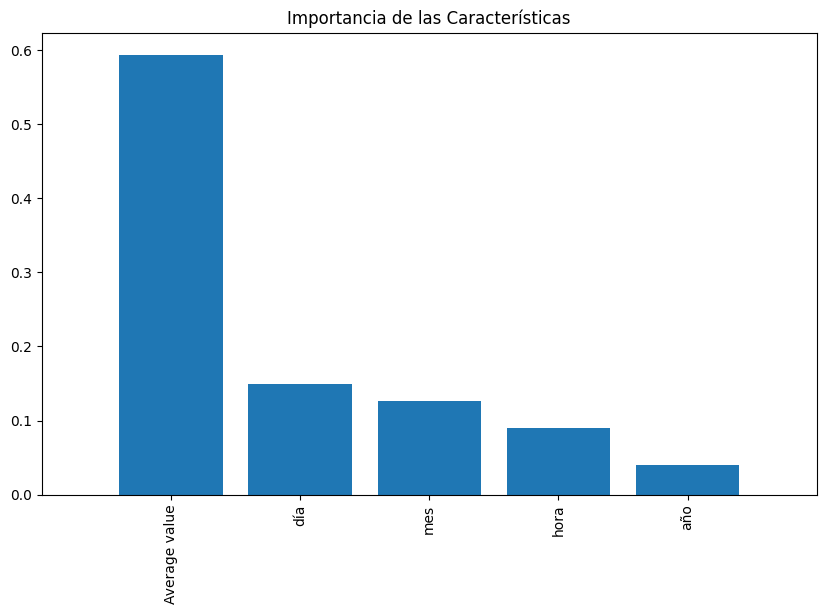

In [ ]:
# Analizar la importancia de las características: Otra práctica útil es examinar la importancia de las características en el modelo para entender:
# cuáles son las variables que más influyen en las predicciones.
import matplotlib.pyplot as plt
import numpy as np

# Obtener la importancia de las características
importancia = mejor_modelo6_base.feature_importances_

# Ordenar las características por importancia
indices = np.argsort(importancia)[::-1]

# Graficar la importancia de las características
plt.figure(figsize=(10, 6))
plt.title("Importancia de las Características")
plt.bar(range(X_train_model6.shape[1]), importancia[indices], align="center")
plt.xticks(range(X_train_model6.shape[1]), X_train_model6.columns[indices], rotation=90)
plt.xlim([-1, X_train_model6.shape[1]])
plt.show()

In [ ]:
# Aplicaremos GridSearchCV al modelo base de Random Forest para ver si podemos mejorar su rendimiento ajustando algunos hiperparámetros
from sklearn.model_selection import GridSearchCV

# Definir el modelo base de Random Forest
rf_base_model6 = RandomForestClassifier(random_state=42)

# Definir los parámetros para GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],  # Número de árboles
    'max_depth': [10, 20, 30],         # Profundidad máxima de los árboles
    'min_samples_split': [2, 5],       # Número mínimo de muestras para dividir un nodo
    'min_samples_leaf': [1, 2],        # Número mínimo de muestras en una hoja
    'bootstrap': [True, False]         # Usar bootstrap o no
}

# Aplicar GridSearchCV
grid_search = GridSearchCV(estimator=rf_base_model6, param_grid=param_grid,
                           cv=3, n_jobs=-1, verbose=2)

# Ajustar el modelo con los datos de entrenamiento
grid_search.fit(X_train_model6, y_train_model6)

# Mostrar los mejores parámetros encontrados
print(f"Mejores parámetros encontrados por GridSearchCV: {grid_search.best_params_}")

# Obtener el mejor modelo optimizado
rf_optimized_model6 = grid_search.best_estimator_

# Realizar predicciones con el modelo optimizado
y_pred_optimized_model6 = rf_optimized_model6.predict(X_test_model6)

# Calcular las métricas de evaluación: Accuracy y F1 Score
accuracy_optimized_model6 = accuracy_score(y_test_model6, y_pred_optimized_model6)
f1_optimized_model6 = f1_score(y_test_model6, y_pred_optimized_model6, average='macro')

# Mostrar resultados
print("\nModelo Random Forest Optimizado con GridSearchCV")
print("Accuracy (Optimizado):", accuracy_optimized_model6)
print("F1 Score (Optimizado):", f1_optimized_model6)
print("\nClassification Report (Optimizado):")
print(classification_report(y_test_model6, y_pred_optimized_model6))

Fitting 3 folds for each of 72 candidates, totalling 216 fits
Mejores parámetros encontrados por GridSearchCV: {'bootstrap': False, 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}

Modelo Random Forest Optimizado con GridSearchCV
Accuracy (Optimizado): 0.9849056603773585
F1 Score (Optimizado): 0.8071239880887051

Classification Report (Optimizado):
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4839
           1       0.90      0.53      0.67        49
           2       1.00      1.00      1.00         3
           3       1.00      0.96      0.98        80
           5       0.77      0.27      0.40        64

    accuracy                           0.98      5035
   macro avg       0.93      0.75      0.81      5035
weighted avg       0.98      0.98      0.98      5035



In [ ]:
# Comparar Random Forest Base vs. Optimizado; Resumen de métricas obtenidas
# Comparación de modelos base y optimizado
print("========== COMPARACIÓN DE MODELOS ==========")
print(f"Random Forest Base - Accuracy: {accuracy_base_model6:.4f}, F1 Score: {f1_base_model6:.4f}")
print(f"Random Forest Optimizado - Accuracy: {accuracy_optimized_model6:.4f}, F1 Score: {f1_optimized_model6:.4f}")

========== COMPARACIÓN DE MODELOS ==========
Random Forest Base - Accuracy: 0.9847, F1 Score: 0.7972
Random Forest Optimizado - Accuracy: 0.9849, F1 Score: 0.8071


In [ ]:
# Guardar el modelo optimizado
import joblib

# Guardar el modelo optimizado en un archivo
joblib.dump(rf_optimized_model6, "modelo_rf_PM25_227.pkl")
print("Modelo guardado exitosamente.")

Modelo guardado exitosamente.


In [ ]:
# Buscamos Valor Real del promedio de PM2.5 por año en la estación 227 a fin de sustituirlo en el mejor modelo optenido

# 1. Filtrar por estación 227 y PM2.5
df_filtrado_m6 = df_instrument[
    (df_instrument['Station code'] == 227) &
    (df_instrument['Item'] == 'PM2.5')
].copy()

# 2. Asegurarse de que la columna de fecha sea datetime
df_filtrado_m6['Measurement date'] = pd.to_datetime(df_filtrado_m6['Measurement date'])

# 3. Crear columnas de año y mes
df_filtrado_m6['año'] = df_filtrado_m6['Measurement date'].dt.year
df_filtrado_m6['mes'] = df_filtrado_m6['Measurement date'].dt.month

# 4. Calcular promedio mensual del contaminante PM2.5
promedios_mensuales = df_filtrado_m6.groupby(['año', 'mes'])['Average value'].mean().reset_index()

# vemos resultados
print(promedios_mensuales)


# Valor promedio en noviembre 2023 para la estación 227:

promedio_noviembre_2023_227 = df_instrument[
    (df_instrument['Station code'] == 227) &
    (df_instrument['Item'] == 'PM2.5') &
    (df_instrument['año'] == 2023) &
    (df_instrument['mes'] == 11)
]['Average value'].mean()

print(f"Promedio de PM2.5 en noviembre 2023 para estación 227: {promedio_noviembre_2023_227:.6f}")

     año  mes  Average value
0   2021    1      29.946237
1   2021    2      30.062500
2   2021    3      40.967742
3   2021    4      23.377778
4   2021    5      25.647849
5   2021    6      19.581944
6   2021    7      18.838710
7   2021    8      10.614247
8   2021    9      16.698611
9   2021   10      13.657258
10  2021   11      22.550000
11  2021   12      30.823925
12  2022    1      30.345430
13  2022    2      29.791667
14  2022    3      30.165323
15  2022    4      23.765278
16  2022    5      23.061828
17  2022    6      23.970833
18  2022    7      15.208333
19  2022    8      13.306452
20  2022    9       9.341667
21  2022   10      12.487903
22  2022   11      23.593056
23  2022   12      29.069892
24  2023    1      41.701211
25  2023    2      37.217262
26  2023    3      49.550669
27  2023    4      23.732962
28  2023    5      32.954089
29  2023    6      25.419444
30  2023    7      20.088520
31  2023    8      13.222973
32  2023    9      11.814417
33  2023   10 

In [ ]:
# predicción station: 227, Polliant. PM2.5 periodo: 01 al 31  12/2023

import pandas as pd

# Crear rango de fechas por hora para diciembre 2023
fechas_diciembre = pd.date_range(start="2023-12-01", end="2023-12-31 23:00:00", freq="H")

# Crear DataFrame base que contrendrá: fechas_diciembre,227 y PM2.5
df_diciembre_2023 = pd.DataFrame({
    'Measurement date': fechas_diciembre,
    'Station code': 227,
    'Item': 'PM2.5',
})

# Añadimos al df_diciembre_2023, las columnas: año, mes, día y hora
df_diciembre_2023['año'] = df_diciembre_2023['Measurement date'].dt.year
df_diciembre_2023['mes'] = df_diciembre_2023['Measurement date'].dt.month
df_diciembre_2023['día'] = df_diciembre_2023['Measurement date'].dt.day
df_diciembre_2023['hora'] = df_diciembre_2023['Measurement date'].dt.hour

# Crea y agreaga una nueva columna llamada ('Average value') y le pone elmismo valor a cada fila del df_noviembre_2023
# El valor es promedio_noviembre_2023_227, que ya habíamos calculado antes como el promedio de PM2.5 en noviembre 2023.
# Como no tenemos datos reales de noviembre, usamos ese valor como referencia para predecir el estado del instrumento.

df_diciembre_2023['Average value'] = promedio_noviembre_2023_227

# ver resultados
df_diciembre_2023.head()

# Extrae las columnas que el modelo necesita para hacer predicciones.
# Seleccionamos las columnas que usamos para entrenar el modelo:

X_diciembre_model6 = df_diciembre_2023[['Average value','año', 'mes', 'día', 'hora']]

# Cargamos el modelo optimizado

import joblib

# Cargar el modelo optimizado
rf_optimized_model6 = joblib.load("modelo_rf_PM25_227.pkl")

# Realizar las predicciones;
# Le pasa los datos de noviembre (X_diciembre_model6) al modelo, y este predice el estado del instrumento para cada hora.
predicciones_diciembre_2023 = rf_optimized_model6.predict(X_diciembre_model6)

# Agregar las predicciones al DataFrame
# crea y agrega al DataFrame original una nueva columna llamada 'Instrument status predicho' y coloca c/u de los valores
# predichos

df_diciembre_2023['Instrument status predicho'] = predicciones_diciembre_2023


# Hacer predicciones con el modelo
df_diciembre_2023['Instrument status predicho'] = rf_optimized_model6.predict(X_diciembre_model6)

# ver el resultado de las predicciones
df_diciembre_2023.head(30)

<ipython-input-97-aa39b41cac00>:6: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fechas_diciembre = pd.date_range(start="2023-12-01", end="2023-12-31 23:00:00", freq="H")


,Measurement date,Station code,Item,año,mes,día,hora,Average value,Instrument status predicho
0,2023-12-01 00:00:00,227,PM2.5,2023,12,1,0,29.358333,0
1,2023-12-01 01:00:00,227,PM2.5,2023,12,1,1,29.358333,0
2,2023-12-01 02:00:00,227,PM2.5,2023,12,1,2,29.358333,0
3,2023-12-01 03:00:00,227,PM2.5,2023,12,1,3,29.358333,0
4,2023-12-01 04:00:00,227,PM2.5,2023,12,1,4,29.358333,0
5,2023-12-01 05:00:00,227,PM2.5,2023,12,1,5,29.358333,0
6,2023-12-01 06:00:00,227,PM2.5,2023,12,1,6,29.358333,0
7,2023-12-01 07:00:00,227,PM2.5,2023,12,1,7,29.358333,0
8,2023-12-01 08:00:00,227,PM2.5,2023,12,1,8,29.358333,0
9,2023-12-01 09:00:00,227,PM2.5,2023,12,1,9,29.358333,0
